# Models of ML 4523 Datasets:

## Imports:

In [237]:
#Basic Imports:
import pandas as pd
import numpy as np
import math

# Plotting Imports:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Model Imports:
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from random import shuffle
import random
random.seed(123)
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler

# Metrics Import
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics.cluster import normalized_mutual_info_score

from collections import Counter

## Functions:

In [27]:
def get_baseline_results_for_single_classifier(data, target_col, clf, filename):
    X, y = data.drop(target_col, axis=1), data[target_col]
    X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.2)
    clf = clf.fit(X_tr, y_tr)
    y_pred = clf.predict(X_te)
    report = classification_report(y_te, y_pred, output_dict=True)
    pd.DataFrame(report).transpose().to_csv(f'../Data/baseline_results/{filename}.csv')
    return report

In [281]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, columns, description, w = None, _C=1.0):
    model = LogisticRegression(C=_C, class_weight = w, fit_intercept = True, penalty = 'l2', random_state = 123).fit(X_tr, y_tr)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    print('Accuracy Score with', description, 'model/features', score)
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
    print(f'Recall Score: {recall_score(y_test,y_pred)}')
    print(f'Precision Score: {precision_score(y_test,y_pred)}')
    
    print("Our learned model parameter vector 'w': ", abs(model.coef_[0]))
    fig = plt.figure(figsize=(18,6))
    ax = fig.add_axes([0,0,1,1])
    labels = columns
    coefficients = abs(model.coef_[0])
    ax.bar(labels, coefficients)
    plt.title("Bar Graph of Elements of the Learned Model Parameter Vector 'w'")
    plt.xlabel('Features')
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.ylabel('Coefficients')
    plt.show()
    
    A = dict(zip(labels, coefficients))
    newA = dict(Counter(A).most_common(5))

    file1 = open("summary.txt", "a")  # append mode
    file1.write(description+ '\t'+str(columns)+'\t LR \t'+str(score)+ '\t'+ str(newA.keys())+ '\t w='+str(w)+'\t C='+str(_C)+'\n')
    file1.close()
    
    
    report = classification_report(y_test, y_pred,output_dict=True)
    pd.DataFrame(report).transpose().to_csv(f'../Data2/Results/LogisticRegression{description}.csv')
    return model

In [282]:
def simple_svm_classify(X_tr, y_tr, X_test, y_test, description, w = None):
    svmClassifier = svm.SVC(kernel='rbf', class_weight = w, random_state = 123).fit(X_tr, y_tr)
    y_pred = svmClassifier.predict(X_test)
    score = svmClassifier.score(X_test, y_test)
    print('Accuracy Score with', description, 'model/features', score)
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
    print(f'Recall Score: {recall_score(y_test,y_pred)}')
    print(f'Precision Score: {precision_score(y_test,y_pred)}')
    

    file1 = open("summary.txt", "a")  # append mode
    file1.write(description+'\t SVM \t'+str(score)+ '\t w='+str(w)+ '\n')
    file1.close()
    
    
    report = classification_report(y_test, y_pred,output_dict=True)
    pd.DataFrame(report).transpose().to_csv(f'../Data2/Results/SupportVectorMachine{description}.csv')
    return svmClassifier

## Read in Datasets:

In [537]:
train_df = pd.read_csv('../Data/train_df.csv')
train_df_randomUnder = pd.read_csv('../Data/train_df_randomUnder.csv')
train_df_no_outliers = pd.read_csv('../Data/train_df_no_outliers.csv')
subset0 = pd.read_csv('../Data/subset0.csv')
subset1 = pd.read_csv('../Data/subset1.csv')
train_df2 = pd.read_csv('../Data/train_df2.csv')
subset0_2 = pd.read_csv('../Data/subset0_2.csv')
subset1_2 = pd.read_csv('../Data/subset1_2.csv')
train_df2_randomUnder = pd.read_csv('../Data/train_df2_randomUnder.csv')
train_df2_no_outliers = pd.read_csv('../Data/train_df2_no_outliers.csv')
missing_train = pd.read_csv('../Data/missing_train.csv')
Missing = pd.read_csv('../Data/Missing.csv')
missing_train_df_no_outliers = pd.read_csv('../Data/missing_train_df_no_outliers.csv')
missing_train_df_randomUnder = pd.read_csv('../Data/missing_train_df_randomUnder.csv')
dev_df = pd.read_csv('../Data/dev_df.csv')

train_df_no_outliers_randomUnder = pd.read_csv('../Data/train_df_no_outliers_randomUnder.csv')
train_df2_no_outliers_randomUnder = pd.read_csv('../Data/train_df2_no_outliers_randomUnder.csv')
missing_train_df_no_outliers_randomUnder = pd.read_csv('../Data/missing_train_df_no_outliers_randomUnder.csv')
train_df_3 = pd.read_csv('../Data/train_df_3.csv')
train_df3_randomUnder = pd.read_csv('../Data/train_df3_randomUnder.csv')
train_df3_no_outliers = pd.read_csv('../Data/train_df3_no_outliers.csv')
train_df3_no_outliers_randomUnder = pd.read_csv('../Data/train_df3_no_outliers_randomUnder.csv')

## Drop Unneeded Columns From All Train and Dev Datasets:

In [538]:
train_df.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2'], axis = 1, inplace = True)
train_df_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2'], axis = 1, inplace = True)
train_df_no_outliers.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2'], axis = 1, inplace = True)
subset0.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2'], axis = 1, inplace = True)
subset1.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2'], axis = 1, inplace = True)
train_df2.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2'], axis = 1, inplace = True)
subset0_2.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2'], axis = 1, inplace = True)
subset1_2.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2'], axis = 1, inplace = True)
train_df2_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2'], axis = 1, inplace = True)
train_df2_no_outliers.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2'], axis = 1, inplace = True)
missing_train.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2'], axis = 1, inplace = True)
missing_train_df_no_outliers.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2'], axis = 1, inplace = True)
missing_train_df_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2'], axis = 1, inplace = True)
dev_df.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2'], axis = 1, inplace = True)

train_df_no_outliers_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2'], axis = 1, inplace = True)
train_df2_no_outliers_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2'], axis = 1, inplace = True)
missing_train_df_no_outliers_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2'], axis = 1, inplace = True)
train_df_3.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2'], axis = 1, inplace = True)
train_df3_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2'], axis = 1, inplace = True)
train_df3_no_outliers.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2'], axis = 1, inplace = True)
train_df3_no_outliers_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2'], axis = 1, inplace = True)

In [241]:
train_df.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','cosine_similarity_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
train_df_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','cosine_similarity_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
train_df_no_outliers.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','cosine_similarity_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
subset0.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','cosine_similarity_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
subset1.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','cosine_similarity_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
train_df2.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','cosine_similarity_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
subset0_2.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','cosine_similarity_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
subset1_2.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','cosine_similarity_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
train_df2_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','cosine_similarity_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
train_df2_no_outliers.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','cosine_similarity_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
missing_train.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','cosine_similarity_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
missing_train_df_no_outliers.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','cosine_similarity_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
missing_train_df_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','cosine_similarity_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
dev_df.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','cosine_similarity_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)

train_df_no_outliers_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','cosine_similarity_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
train_df2_no_outliers_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','cosine_similarity_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
missing_train_df_no_outliers_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','cosine_similarity_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
train_df_3.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','cosine_similarity_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
train_df3_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','cosine_similarity_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
train_df3_no_outliers.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','cosine_similarity_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
train_df3_no_outliers_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','cosine_similarity_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)

In [532]:
dfs = [train_df,train_df_randomUnder,train_df_no_outliers,subset0,subset1,train_df2,subset0_2,subset1_2,train_df2_randomUnder,train_df2_no_outliers,missing_train,missing_train_df_no_outliers,missing_train_df_randomUnder,dev_df,train_df_no_outliers_randomUnder,train_df2_no_outliers_randomUnder,missing_train_df_no_outliers_randomUnder,train_df_3,train_df3_randomUnder,train_df3_no_outliers,train_df3_no_outliers_randomUnder]
dfs2 = []
iterator = 0
for df in dfs:
    scaler = MinMaxScaler()
    scaler.fit(df)
    scaled = scaler.fit_transform(df)
    name = 'df' + str(iterator)
    name = pd.DataFrame(scaled, columns=df.columns)
    iterator = iterator + 1
    dfs2.append(name)
train_df = dfs2[0]
train_df_randomUnder = dfs2[1]
train_df_no_outliers = dfs2[2]
subset0 = dfs2[3]
subset1 = dfs2[4]
train_df2 = dfs2[5]
subset0_2 = dfs2[6]
subset1_2 = dfs2[7]
train_df2_randomUnder = dfs2[8]
train_df2_no_outliers = dfs2[9]
missing_train = dfs2[10]
missing_train_df_no_outliers = dfs2[11]
missing_train_df_randomUnder = dfs2[12]
dev_df = dfs2[13]
train_df_no_outliers_randomUnder = dfs2[14]
train_df2_no_outliers_randomUnder = dfs2[15]
missing_train_df_no_outliers_randomUnder = dfs2[16]
train_df_3 = dfs2[17]
train_df3_randomUnder = dfs2[18]
train_df3_no_outliers = dfs2[19]
train_df3_no_outliers_randomUnder = dfs2[20]

In [523]:
train_df.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
train_df_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
train_df_no_outliers.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
subset0.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
subset1.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
train_df2.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
subset0_2.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
subset1_2.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
train_df2_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
train_df2_no_outliers.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
missing_train.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
missing_train_df_no_outliers.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
missing_train_df_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
dev_df.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)

train_df_no_outliers_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
train_df2_no_outliers_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
missing_train_df_no_outliers_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
train_df_3.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
train_df3_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
train_df3_no_outliers.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)
train_df3_no_outliers_randomUnder.drop(['id', 'sentence1', 'sentence2', 'Text_Cleaned1', 'Text_Cleaned2', 'lemmatized_text1', 'lemmatized_text2','jaccard_distance_bigrams','cosine_similarity_bigrams','bigram_similarity','jaccard_distance_trigrams','trigram_similarity','jaccard_distance_quadgrams','cosine_similarity_quadgrams','quadgram_similarity'], axis = 1, inplace = True)

In [554]:
train_df = pd.read_csv('../Data2/train_df.csv')
train_df_randomUnder = pd.read_csv('../Data2/train_df_randomUnder.csv')
train_df_no_outliers = pd.read_csv('../Data2/train_df_no_outliers.csv')
subset0 = pd.read_csv('../Data2/subset0.csv')
subset1 = pd.read_csv('../Data2/subset1.csv')
train_df2 = pd.read_csv('../Data2/train_df2.csv')
subset0_2 = pd.read_csv('../Data2/subset0_2.csv')
subset1_2 = pd.read_csv('../Data2/subset1_2.csv')
train_df2_randomUnder = pd.read_csv('../Data2/train_df2_randomUnder.csv')
train_df2_no_outliers = pd.read_csv('../Data2/train_df2_no_outliers.csv')
missing_train = pd.read_csv('../Data2/missing_train.csv')
Missing = pd.read_csv('../Data2/Missing.csv')
missing_train_df_no_outliers = pd.read_csv('../Data2/missing_train_df_no_outliers.csv')
missing_train_df_randomUnder = pd.read_csv('../Data2/missing_train_df_randomUnder.csv')
dev_df = pd.read_csv('../Data2/dev_df.csv')

train_df_no_outliers_randomUnder = pd.read_csv('../Data2/train_df_no_outliers_randomUnder.csv')
train_df2_no_outliers_randomUnder = pd.read_csv('../Data2/train_df2_no_outliers_randomUnder.csv')
missing_train_df_no_outliers_randomUnder = pd.read_csv('../Data2/missing_train_df_no_outliers_randomUnder.csv')
train_df_3 = pd.read_csv('../Data2/train_df_3.csv')
train_df3_randomUnder = pd.read_csv('../Data2/train_df3_randomUnder.csv')
train_df3_no_outliers = pd.read_csv('../Data2/train_df3_no_outliers.csv')
train_df3_no_outliers_randomUnder = pd.read_csv('../Data2/train_df3_no_outliers_randomUnder.csv')

In [555]:
dfs = [train_df,train_df_randomUnder,train_df_no_outliers,subset0,subset1,train_df2,subset0_2,subset1_2,train_df2_randomUnder,train_df2_no_outliers,missing_train,missing_train_df_no_outliers,missing_train_df_randomUnder,dev_df,train_df_no_outliers_randomUnder,train_df2_no_outliers_randomUnder,missing_train_df_no_outliers_randomUnder,train_df_3,train_df3_randomUnder,train_df3_no_outliers,train_df3_no_outliers_randomUnder]
dfs2 = []
iterator = 0
for df in dfs:
    scaler = MinMaxScaler()
    scaler.fit(df)
    scaled = scaler.fit_transform(df)
    name = 'df' + str(iterator)
    name = pd.DataFrame(scaled, columns=df.columns)
    iterator = iterator + 1
    dfs2.append(name)
train_df = dfs2[0]
train_df_randomUnder = dfs2[1]
train_df_no_outliers = dfs2[2]
subset0 = dfs2[3]
subset1 = dfs2[4]
train_df2 = dfs2[5]
subset0_2 = dfs2[6]
subset1_2 = dfs2[7]
train_df2_randomUnder = dfs2[8]
train_df2_no_outliers = dfs2[9]
missing_train = dfs2[10]
missing_train_df_no_outliers = dfs2[11]
missing_train_df_randomUnder = dfs2[12]
dev_df = dfs2[13]
train_df_no_outliers_randomUnder = dfs2[14]
train_df2_no_outliers_randomUnder = dfs2[15]
missing_train_df_no_outliers_randomUnder = dfs2[16]
train_df_3 = dfs2[17]
train_df3_randomUnder = dfs2[18]
train_df3_no_outliers = dfs2[19]
train_df3_no_outliers_randomUnder = dfs2[20]

## Models with No Adjustments:

train: 4077, val: 724
(4077, 19)
(724, 19)
Logistic Regression:
Accuracy Score with train_df model/features 0.6546961325966851
Confusion Matrix: 
[[143 219]
 [ 31 331]]
Area Under Curve: 0.6546961325966851
Recall Score: 0.914364640883978
Precision Score: 0.6018181818181818
Our learned model parameter vector 'w':  [0.46431867 0.39593339 1.80808479 0.77546826 0.67112533 2.82572663
 1.51673901 0.21725423 0.46212728 0.41375637 0.52664372 0.25605934
 0.24638217 0.17756002 0.99283154 1.03127992 0.06920199 0.08167577
 0.01012349]


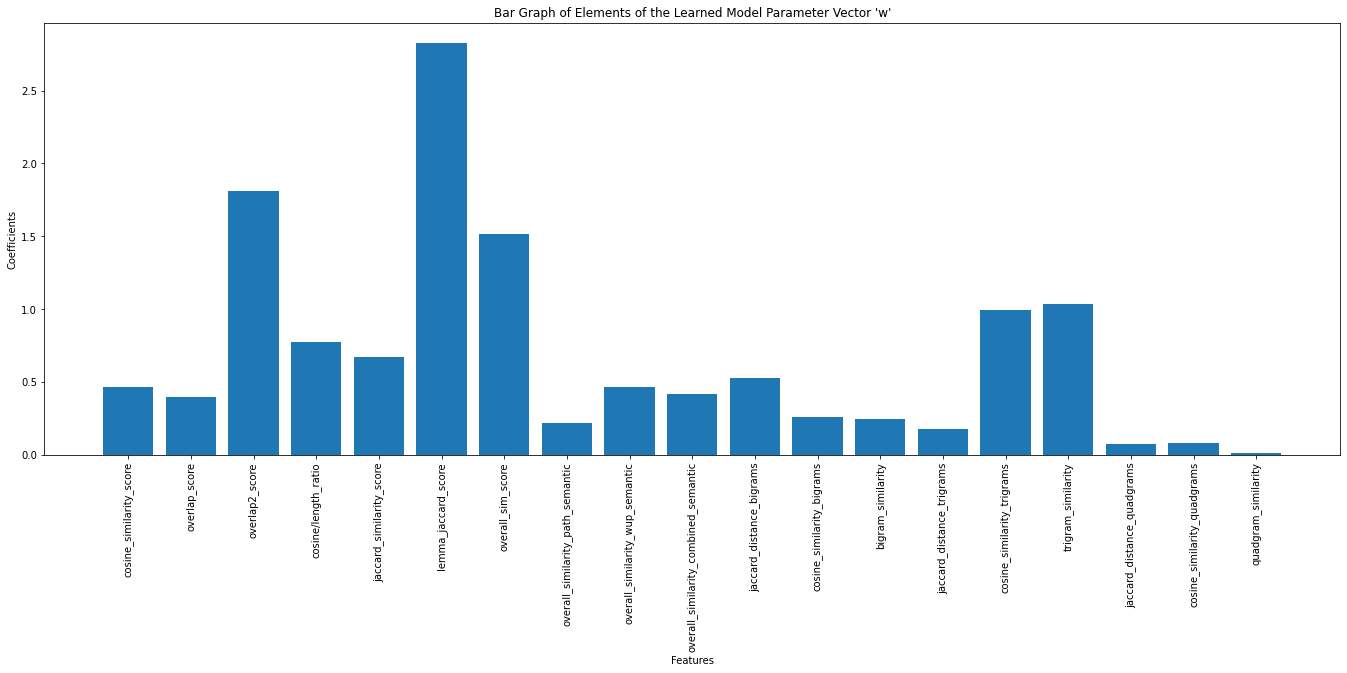

SVM:
Accuracy Score with train_df model/features 0.5773480662983426
Confusion Matrix: 
[[ 69 293]
 [ 13 349]]
Area Under Curve: 0.5773480662983426
Recall Score: 0.9640883977900553
Precision Score: 0.543613707165109


In [309]:
# Logistic Regression/SVM All Scores: train_df
x_train = train_df.drop(['classification'], axis=1).values
y_train = train_df['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values
print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
print(x_train.shape)
print(x_train_val.shape)

print('Logistic Regression:')
model_simple = simple_logistic_classify(x_train, y_train, x_train_val, y_train_val, train_df.drop(['classification'], axis=1).columns,'train_df')
print('SVM:')
model_simple2 = simple_svm_classify(x_train, y_train, x_train_val, y_train_val, 'train_df')

train: 2078, val: 724
(2078, 19)
(724, 19)
Logistic Regression:
Accuracy Score with train_df_randomUnder model/features 0.6919889502762431
Confusion Matrix: 
[[279  83]
 [140 222]]
Area Under Curve: 0.691988950276243
Recall Score: 0.6132596685082873
Precision Score: 0.7278688524590164
Our learned model parameter vector 'w':  [0.21524508 0.63651357 1.39749701 0.6967051  0.48505424 2.44287316
 1.68307557 0.05970017 0.54849951 0.50551536 0.46424446 0.02093687
 0.17320956 0.38324404 0.95299448 0.84453503 0.09641024 0.02558382
 0.0095281 ]


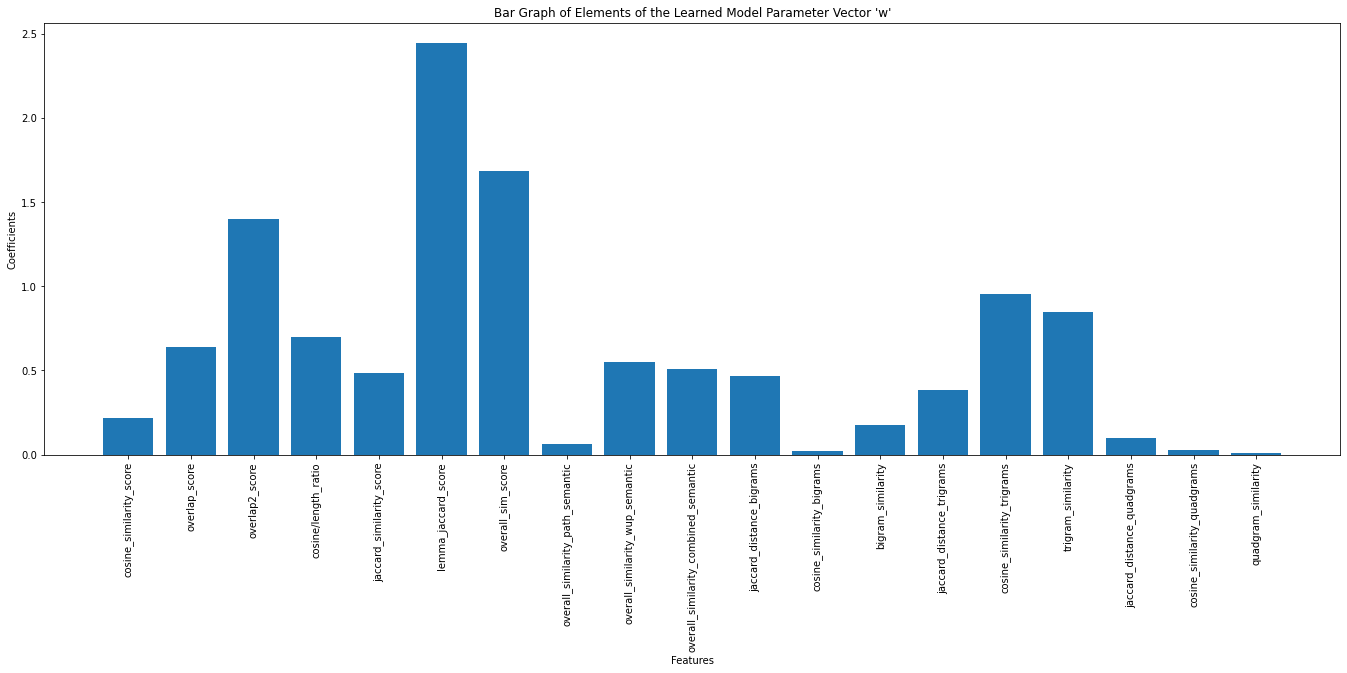

SVM:
Accuracy Score with train_df_randomUnder model/features 0.6892265193370166
Confusion Matrix: 
[[296  66]
 [159 203]]
Area Under Curve: 0.6892265193370166
Recall Score: 0.5607734806629834
Precision Score: 0.7546468401486989


In [310]:
# Logistic Regression/SVM All Scores: train_df_randomUnder
x_train = train_df_randomUnder.drop(['classification'], axis=1).values
y_train = train_df_randomUnder['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values
print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
print(x_train.shape)
print(x_train_val.shape)

print('Logistic Regression:')
model_simple = simple_logistic_classify(x_train, y_train, x_train_val, y_train_val, train_df_randomUnder.drop(['classification'], axis=1).columns, 'train_df_randomUnder')
print('SVM:')
model_simple2 = simple_svm_classify(x_train, y_train, x_train_val, y_train_val, 'train_df_randomUnder')

train: 832, val: 724
(832, 19)
(724, 19)
Logistic Regression:
Accuracy Score with train_df_no_outliers model/features 0.6726519337016574
Confusion Matrix: 
[[265  97]
 [140 222]]
Area Under Curve: 0.6726519337016574
Recall Score: 0.6132596685082873
Precision Score: 0.6959247648902821
Our learned model parameter vector 'w':  [1.19995357 0.29115206 1.79226062 1.35527922 1.45015867 2.14858176
 2.29046927 2.43567673 0.00294636 0.07093594 1.01658546 0.97172505
 1.10858431 1.46025102 1.5479425  1.5688995  0.91309303 0.78217136
 0.81157712]


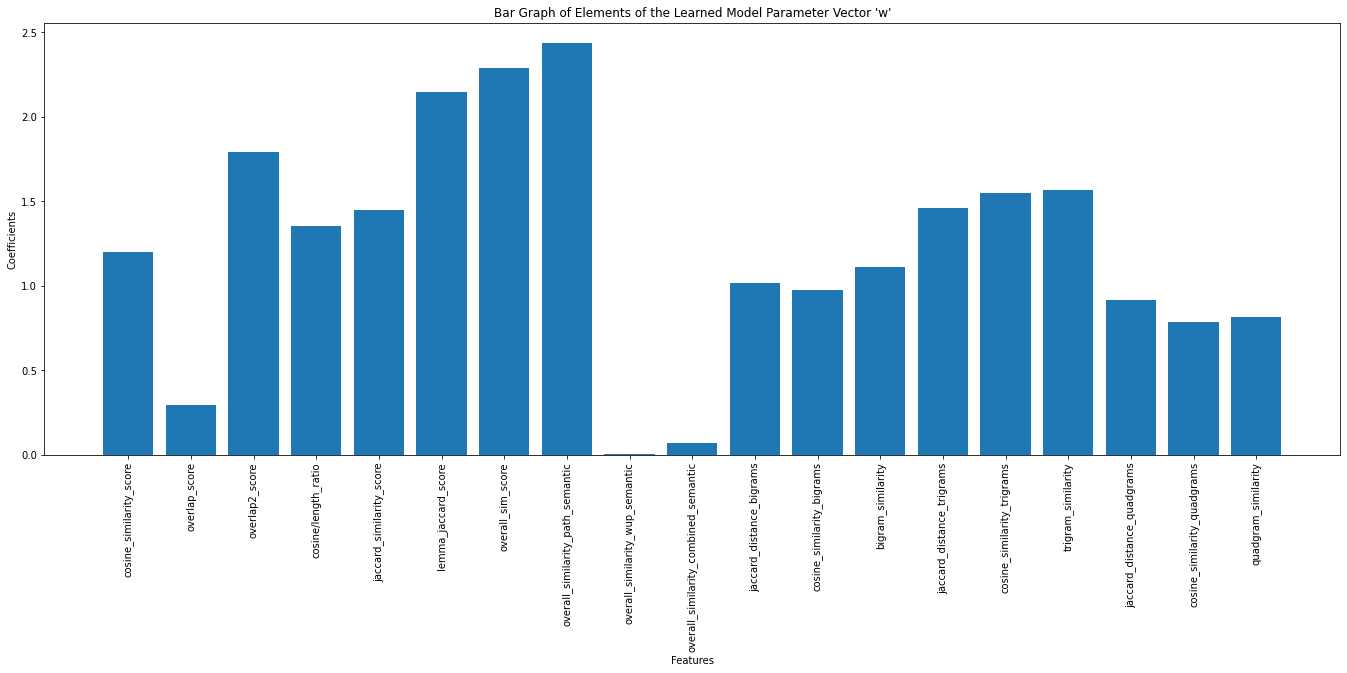

SVM:
Accuracy Score with train_df_no_outliers model/features 0.6740331491712708
Confusion Matrix: 
[[279  83]
 [153 209]]
Area Under Curve: 0.6740331491712708
Recall Score: 0.5773480662983426
Precision Score: 0.7157534246575342


In [311]:
# Logistic Regression/SVM All Scores: train_df_no_outliers
x_train = train_df_no_outliers.drop(['classification'], axis=1).values
y_train = train_df_no_outliers['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values
print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
print(x_train.shape)
print(x_train_val.shape)

print('Logistic Regression:')
model_simple = simple_logistic_classify(x_train, y_train, x_train_val, y_train_val, train_df_no_outliers.drop(['classification'], axis=1).columns, 'train_df_no_outliers')
print('SVM:')
model_simple2 = simple_svm_classify(x_train, y_train, x_train_val, y_train_val, 'train_df_no_outliers')

train: 4077, val: 724
(4077, 19)
(724, 19)
Logistic Regression:
Accuracy Score with train_df2 model/features 0.6533149171270718
Confusion Matrix: 
[[143 219]
 [ 32 330]]
Area Under Curve: 0.6533149171270718
Recall Score: 0.9116022099447514
Precision Score: 0.6010928961748634
Our learned model parameter vector 'w':  [1.44275431e-01 7.21715390e-01 1.00401732e+00 7.27117826e-01
 1.10966218e-01 4.45536875e+00 1.41033898e+00 7.20955972e-01
 4.32845799e-01 4.01970337e-01 6.82134616e-01 1.38238801e-01
 3.05090908e-01 2.91228519e-02 1.17495354e+00 1.30069909e+00
 3.51357309e-01 2.93961748e-03 1.49183798e-02]


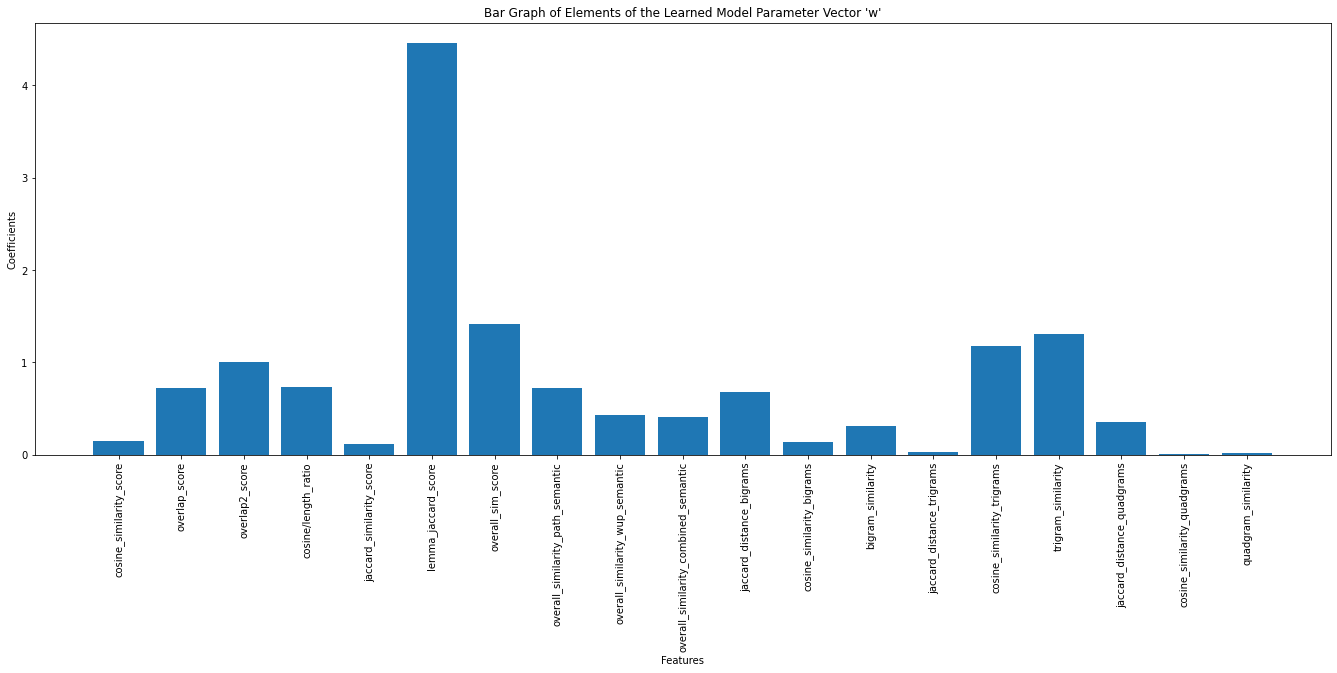

SVM:
Accuracy Score with train_df2 model/features 0.5980662983425414
Confusion Matrix: 
[[ 86 276]
 [ 15 347]]
Area Under Curve: 0.5980662983425414
Recall Score: 0.9585635359116023
Precision Score: 0.5569823434991974


In [312]:
# Logistic Regression/SVM All Scores: train_df2
x_train = train_df2.drop(['classification'], axis=1).values
y_train = train_df2['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values
print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
print(x_train.shape)
print(x_train_val.shape)

print('Logistic Regression:')
model_simple = simple_logistic_classify(x_train, y_train, x_train_val, y_train_val, train_df2.drop(['classification'], axis=1).columns, 'train_df2')
print('SVM:')
model_simple2 = simple_svm_classify(x_train, y_train, x_train_val, y_train_val, 'train_df2')

train: 2078, val: 724
(2078, 19)
(724, 19)
Logistic Regression:
Accuracy Score with train_df2_randomUnder model/features 0.6947513812154696
Confusion Matrix: 
[[274  88]
 [133 229]]
Area Under Curve: 0.6947513812154695
Recall Score: 0.6325966850828729
Precision Score: 0.722397476340694
Our learned model parameter vector 'w':  [0.2290588  0.72526456 0.87237339 0.60037826 0.17194542 3.81090052
 1.69109204 0.57231737 0.15173163 0.39131501 0.56875599 0.13865831
 0.0158718  0.21444969 1.00314494 1.01315326 0.09388582 0.07306728
 0.12613853]


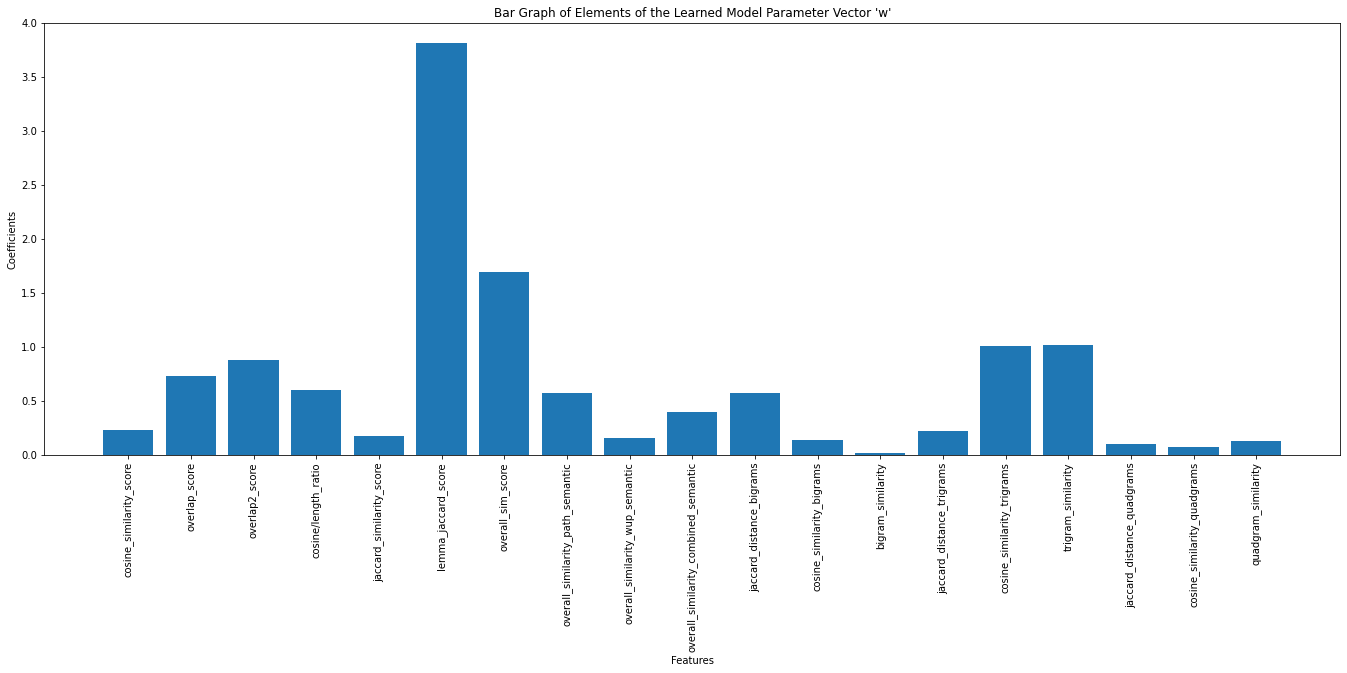

SVM:
Accuracy Score with train_df2_randomUnder model/features 0.6947513812154696
Confusion Matrix: 
[[282  80]
 [141 221]]
Area Under Curve: 0.6947513812154696
Recall Score: 0.6104972375690608
Precision Score: 0.7342192691029901


In [313]:
# Logistic Regression/SVM All Scores: train_df2_randomUnder
x_train = train_df2_randomUnder.drop(['classification'], axis=1).values
y_train = train_df2_randomUnder['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values
print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
print(x_train.shape)
print(x_train_val.shape)

print('Logistic Regression:')
model_simple = simple_logistic_classify(x_train, y_train, x_train_val, y_train_val, train_df2_randomUnder.drop(['classification'], axis=1).columns, 'train_df2_randomUnder')
print('SVM:')
model_simple2 = simple_svm_classify(x_train, y_train, x_train_val, y_train_val, 'train_df2_randomUnder')

train: 799, val: 724
(799, 19)
(724, 19)
Logistic Regression:
Accuracy Score with train_df2_no_outliers model/features 0.6767955801104972
Confusion Matrix: 
[[259 103]
 [131 231]]
Area Under Curve: 0.6767955801104972
Recall Score: 0.638121546961326
Precision Score: 0.6916167664670658
Our learned model parameter vector 'w':  [1.25486174 0.14017664 1.75577083 1.40167288 1.57252107 3.09176715
 3.0010806  1.14409255 1.01355582 1.04795456 0.83216686 0.81645268
 0.91696419 1.17030862 1.2367603  1.2950678  0.88380644 0.8252413
 0.86416035]


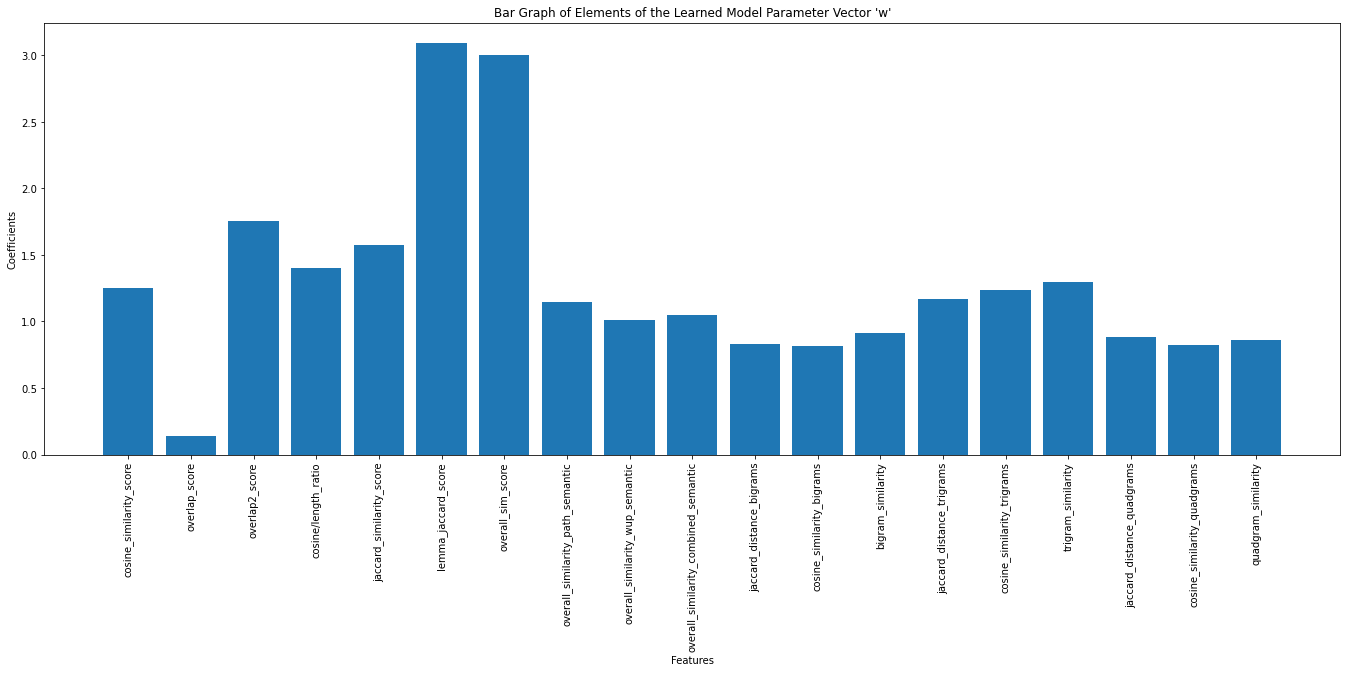

SVM:
Accuracy Score with train_df2_no_outliers model/features 0.6657458563535912
Confusion Matrix: 
[[263  99]
 [143 219]]
Area Under Curve: 0.6657458563535911
Recall Score: 0.6049723756906077
Precision Score: 0.6886792452830188


In [314]:
# Logistic Regression/SVM All Scores: train_df2_no_outliers
x_train = train_df2_no_outliers.drop(['classification'], axis=1).values
y_train = train_df2_no_outliers['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values
print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
print(x_train.shape)
print(x_train_val.shape)

print('Logistic Regression:')
model_simple = simple_logistic_classify(x_train, y_train, x_train_val, y_train_val, train_df2_no_outliers.drop(['classification'], axis=1).columns,'train_df2_no_outliers')
print('SVM:')
model_simple2 = simple_svm_classify(x_train, y_train, x_train_val, y_train_val, 'train_df2_no_outliers')

train: 3493, val: 724
(3493, 19)
(724, 19)
Logistic Regression:
Accuracy Score with missing_train model/features 0.6464088397790055
Confusion Matrix: 
[[136 226]
 [ 30 332]]
Area Under Curve: 0.6464088397790055
Recall Score: 0.9171270718232044
Precision Score: 0.5949820788530465
Our learned model parameter vector 'w':  [0.35548194 0.61920578 1.99452937 0.88338411 0.65993911 2.62264616
 1.41836845 0.01674659 0.11530297 0.34365974 0.38094877 0.20601063
 0.12482908 0.20852461 0.90839502 0.80861143 0.15631277 0.05880874
 0.07360712]


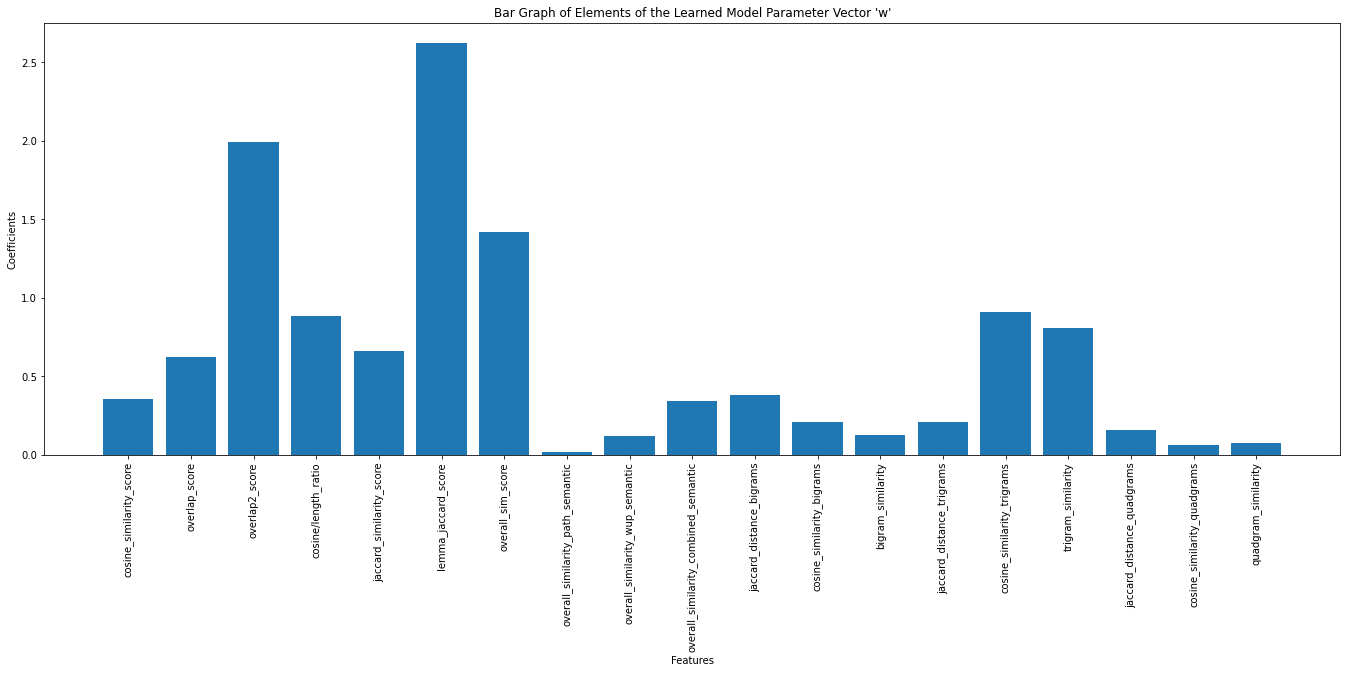

SVM:
Accuracy Score with missing_train model/features 0.5718232044198895
Confusion Matrix: 
[[ 64 298]
 [ 12 350]]
Area Under Curve: 0.5718232044198894
Recall Score: 0.9668508287292817
Precision Score: 0.5401234567901234


In [315]:
# Logistic Regression/SVM All Scores: missing_train
x_train = missing_train.drop(['classification'], axis=1).values
y_train = missing_train['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values
print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
print(x_train.shape)
print(x_train_val.shape)

print('Logistic Regression:')
model_simple = simple_logistic_classify(x_train, y_train, x_train_val, y_train_val, missing_train.drop(['classification'], axis=1).columns,'missing_train')
print('SVM:')
model_simple2 = simple_svm_classify(x_train, y_train, x_train_val, y_train_val, 'missing_train')

train: 678, val: 724
(678, 19)
(724, 19)
Logistic Regression:
Accuracy Score with missing_train_df_no_outliers model/features 0.6740331491712708
Confusion Matrix: 
[[266  96]
 [140 222]]
Area Under Curve: 0.6740331491712707
Recall Score: 0.6132596685082873
Precision Score: 0.6981132075471698
Our learned model parameter vector 'w':  [0.93313249 0.29888852 1.43832109 1.15191981 1.32507197 2.12115629
 2.09264351 1.10138775 1.45264669 1.28247384 1.05796765 0.94129869
 1.13351881 1.45201366 1.51277435 1.53394523 1.07390579 1.01338068
 1.05330731]


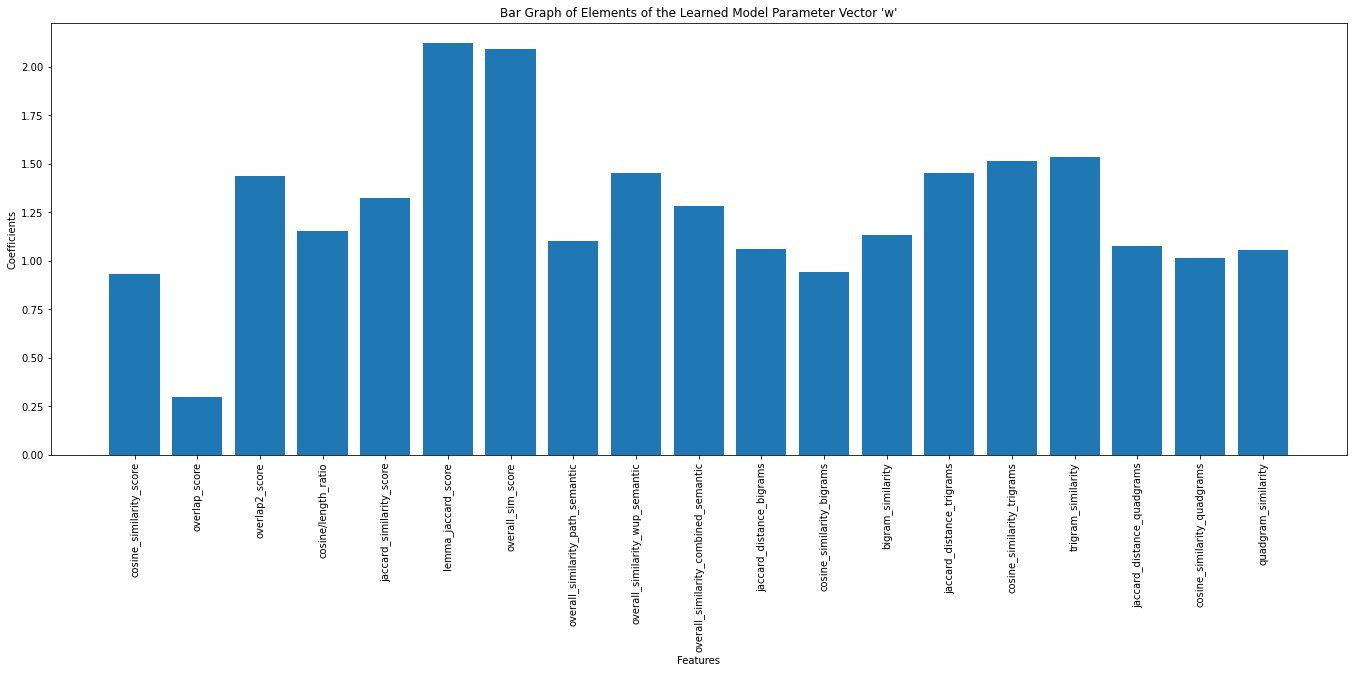

SVM:
Accuracy Score with missing_train_df_no_outliers model/features 0.6712707182320442
Confusion Matrix: 
[[280  82]
 [156 206]]
Area Under Curve: 0.6712707182320442
Recall Score: 0.569060773480663
Precision Score: 0.7152777777777778


In [316]:
# Logistic Regression/SVM All Scores: missing_train_df_no_outliers
x_train = missing_train_df_no_outliers.drop(['classification'], axis=1).values
y_train = missing_train_df_no_outliers['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values
print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
print(x_train.shape)
print(x_train_val.shape)

print('Logistic Regression:')
model_simple = simple_logistic_classify(x_train, y_train, x_train_val, y_train_val, missing_train_df_no_outliers.drop(['classification'], axis=1).columns, 'missing_train_df_no_outliers')
print('SVM:')
model_simple2 = simple_svm_classify(x_train, y_train, x_train_val, y_train_val, 'missing_train_df_no_outliers')

train: 1810, val: 724
(1810, 19)
(724, 19)
Logistic Regression:
Accuracy Score with missing_train_df_randomUnder model/features 0.6961325966850829
Confusion Matrix: 
[[277  85]
 [135 227]]
Area Under Curve: 0.6961325966850829
Recall Score: 0.6270718232044199
Precision Score: 0.7275641025641025
Our learned model parameter vector 'w':  [0.04265193 0.85710271 1.74375147 0.78839011 0.97866892 2.2865809
 1.62902556 0.37695389 0.20399318 0.39622297 0.3188123  0.52318574
 0.36591568 0.04223348 0.60188783 0.48611145 0.20784228 0.33120143
 0.24614717]


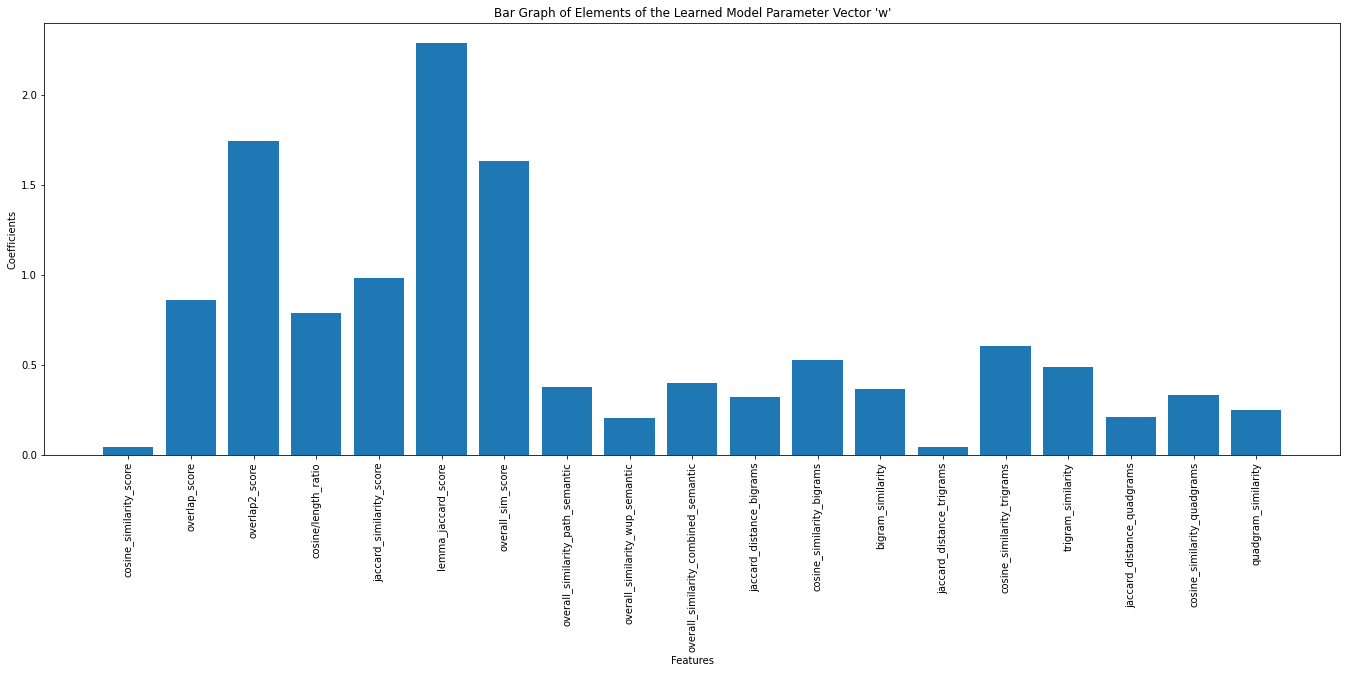

SVM:
Accuracy Score with missing_train_df_randomUnder model/features 0.6975138121546961
Confusion Matrix: 
[[284  78]
 [141 221]]
Area Under Curve: 0.6975138121546962
Recall Score: 0.6104972375690608
Precision Score: 0.7391304347826086


In [317]:
# Logistic Regression/SVM All Scores: missing_train_df_randomUnder
x_train = missing_train_df_randomUnder.drop(['classification'], axis=1).values
y_train = missing_train_df_randomUnder['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values
print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
print(x_train.shape)
print(x_train_val.shape)

print('Logistic Regression:')
model_simple = simple_logistic_classify(x_train, y_train, x_train_val, y_train_val, missing_train_df_randomUnder.drop(['classification'], axis=1).columns, 'missing_train_df_randomUnder')
print('SVM:')
model_simple2 = simple_svm_classify(x_train, y_train, x_train_val, y_train_val, 'missing_train_df_randomUnder')

train: 4077, val: 724
(4077, 19)
(724, 19)
Logistic Regression:
Accuracy Score with train_df_3 model/features 0.6533149171270718
Confusion Matrix: 
[[143 219]
 [ 32 330]]
Area Under Curve: 0.6533149171270718
Recall Score: 0.9116022099447514
Precision Score: 0.6010928961748634
Our learned model parameter vector 'w':  [1.44275431e-01 7.21715390e-01 1.00401732e+00 7.27117826e-01
 1.10966218e-01 4.45536875e+00 1.41033898e+00 7.20955972e-01
 4.32845799e-01 4.01970337e-01 6.82134616e-01 1.38238801e-01
 3.05090908e-01 2.91228519e-02 1.17495354e+00 1.30069909e+00
 3.51357309e-01 2.93961748e-03 1.49183798e-02]


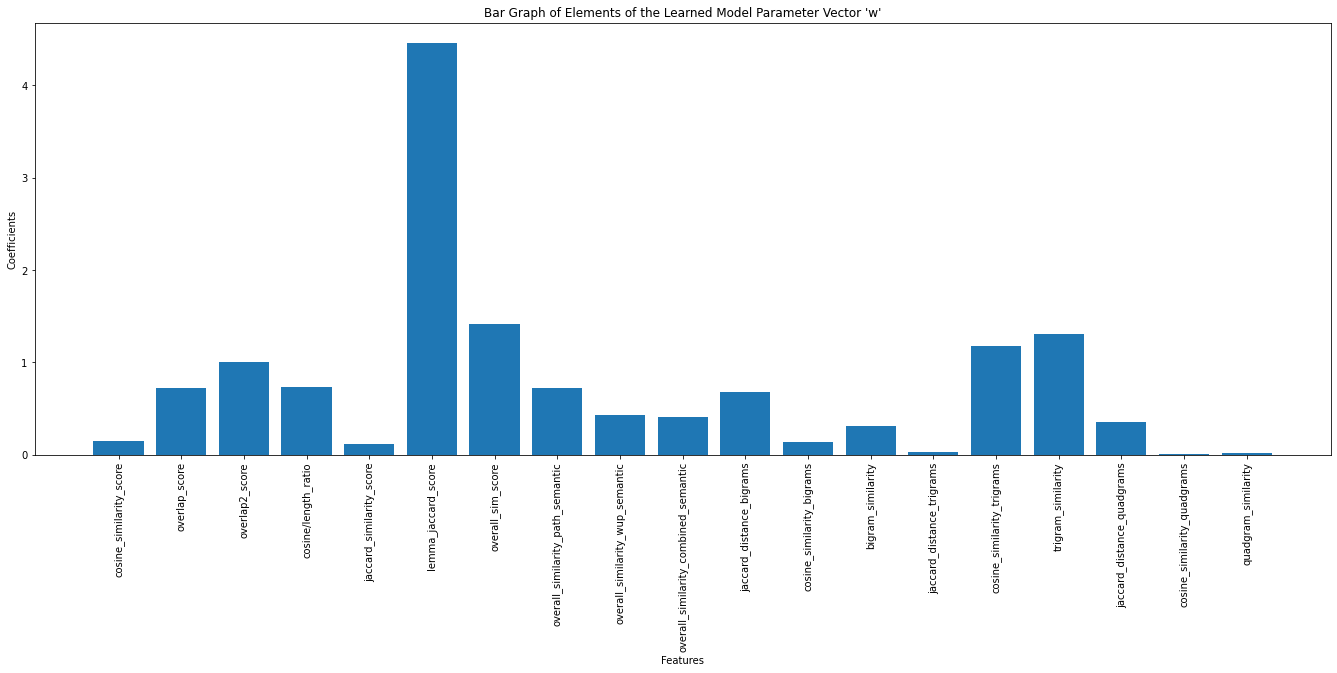

SVM:
Accuracy Score with train_df_3 model/features 0.5980662983425414
Confusion Matrix: 
[[ 86 276]
 [ 15 347]]
Area Under Curve: 0.5980662983425414
Recall Score: 0.9585635359116023
Precision Score: 0.5569823434991974


In [318]:
# Logistic Regression/SVM All Scores: train_df_3
x_train = train_df_3.drop(['classification'], axis=1).values
y_train = train_df_3['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values
print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
print(x_train.shape)
print(x_train_val.shape)

print('Logistic Regression:')
model_simple = simple_logistic_classify(x_train, y_train, x_train_val, y_train_val, missing_train_df_randomUnder.drop(['classification'], axis=1).columns, 'train_df_3')
print('SVM:')
model_simple2 = simple_svm_classify(x_train, y_train, x_train_val, y_train_val, 'train_df_3')

train: 2078, val: 724
(2078, 19)
(724, 19)
Logistic Regression:
Accuracy Score with train_df3_randomUnder model/features 0.6947513812154696
Confusion Matrix: 
[[274  88]
 [133 229]]
Area Under Curve: 0.6947513812154695
Recall Score: 0.6325966850828729
Precision Score: 0.722397476340694
Our learned model parameter vector 'w':  [0.2290588  0.72526456 0.87237339 0.60037826 0.17194542 3.81090052
 1.69109204 0.57231737 0.15173163 0.39131501 0.56875599 0.13865831
 0.0158718  0.21444969 1.00314494 1.01315326 0.09388582 0.07306728
 0.12613853]


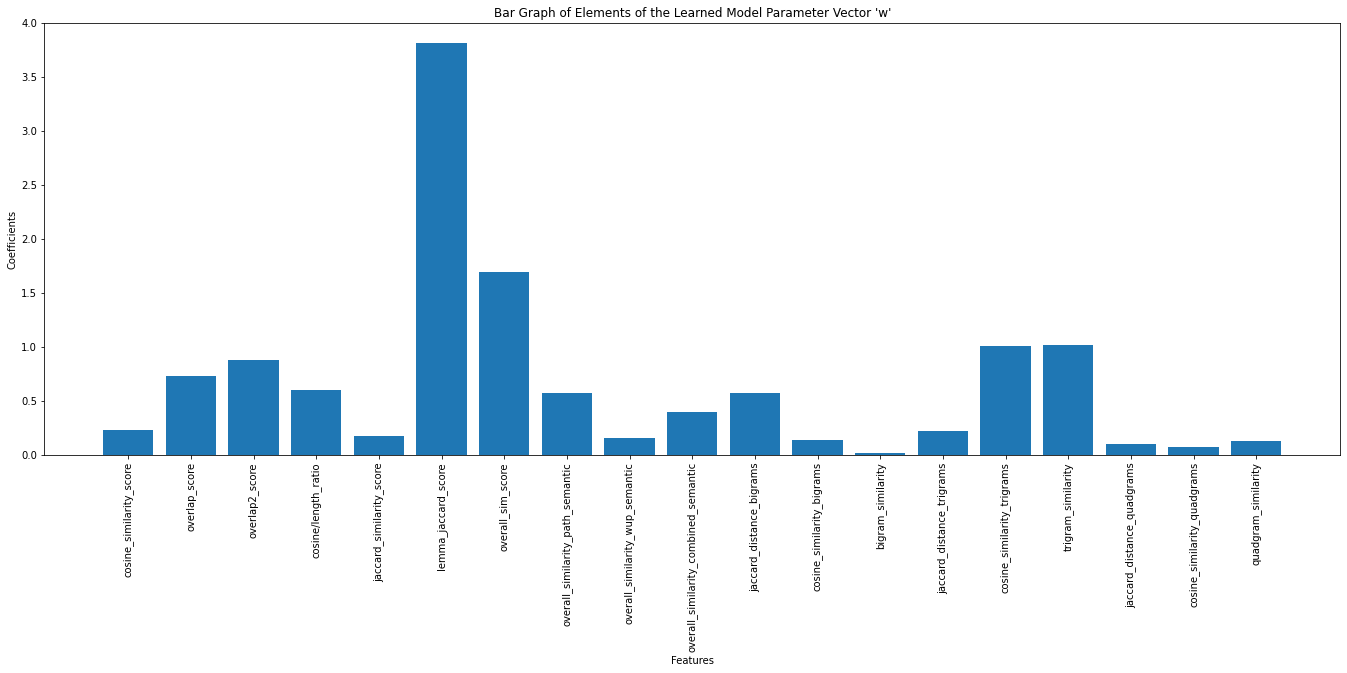

SVM:
Accuracy Score with train_df3_randomUnder model/features 0.6947513812154696
Confusion Matrix: 
[[282  80]
 [141 221]]
Area Under Curve: 0.6947513812154696
Recall Score: 0.6104972375690608
Precision Score: 0.7342192691029901


In [319]:
# Logistic Regression/SVM All Scores: train_df3_randomUnder
x_train = train_df3_randomUnder.drop(['classification'], axis=1).values
y_train = train_df3_randomUnder['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values
print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
print(x_train.shape)
print(x_train_val.shape)

print('Logistic Regression:')
model_simple = simple_logistic_classify(x_train, y_train, x_train_val, y_train_val, missing_train_df_randomUnder.drop(['classification'], axis=1).columns, 'train_df3_randomUnder')
print('SVM:')
model_simple2 = simple_svm_classify(x_train, y_train, x_train_val, y_train_val, 'train_df3_randomUnder')

train: 799, val: 724
(799, 19)
(724, 19)
Logistic Regression:
Accuracy Score with train_df3_no_outliers model/features 0.6767955801104972
Confusion Matrix: 
[[259 103]
 [131 231]]
Area Under Curve: 0.6767955801104972
Recall Score: 0.638121546961326
Precision Score: 0.6916167664670658
Our learned model parameter vector 'w':  [1.25486174 0.14017664 1.75577083 1.40167288 1.57252107 3.09176715
 3.0010806  1.14409255 1.01355582 1.04795456 0.83216686 0.81645268
 0.91696419 1.17030862 1.2367603  1.2950678  0.88380644 0.8252413
 0.86416035]


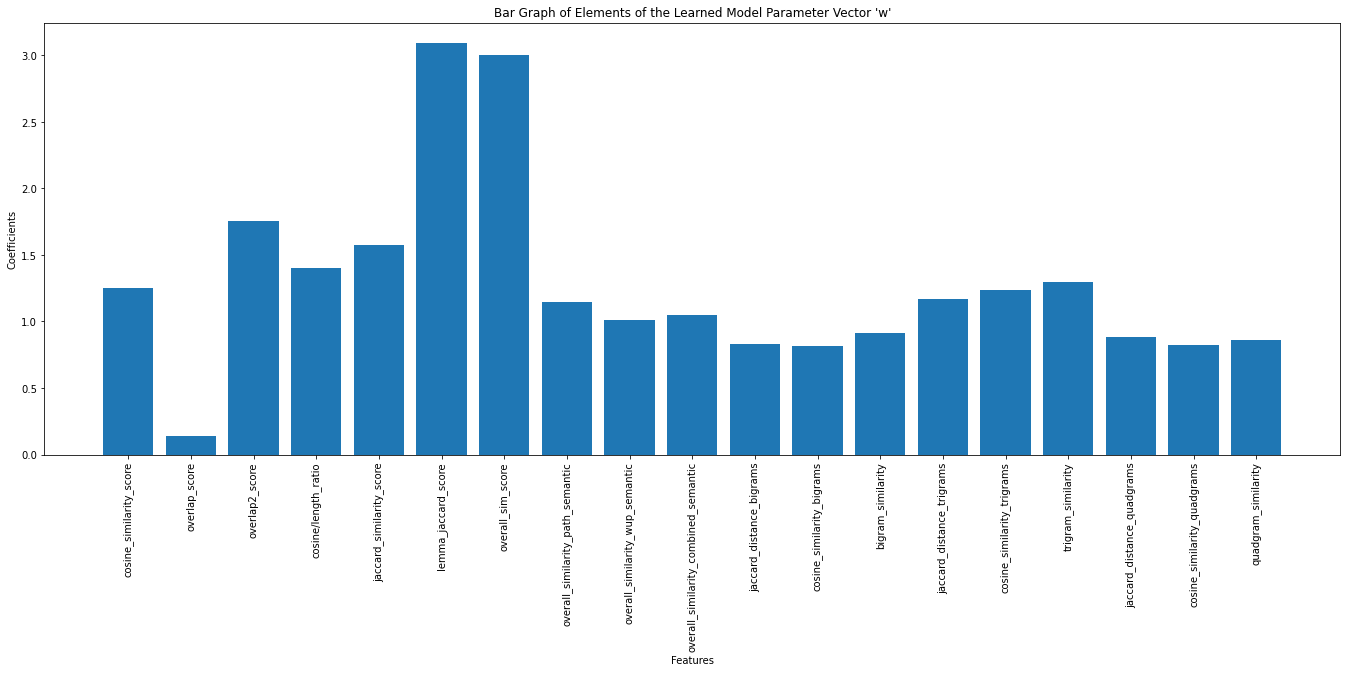

SVM:
Accuracy Score with train_df3_no_outliers model/features 0.6657458563535912
Confusion Matrix: 
[[263  99]
 [143 219]]
Area Under Curve: 0.6657458563535911
Recall Score: 0.6049723756906077
Precision Score: 0.6886792452830188


In [320]:
# Logistic Regression/SVM All Scores: train_df3_no_outliers
x_train = train_df3_no_outliers.drop(['classification'], axis=1).values
y_train = train_df3_no_outliers['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values
print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
print(x_train.shape)
print(x_train_val.shape)

print('Logistic Regression:')
model_simple = simple_logistic_classify(x_train, y_train, x_train_val, y_train_val, missing_train_df_randomUnder.drop(['classification'], axis=1).columns, 'train_df3_no_outliers')
print('SVM:')
model_simple2 = simple_svm_classify(x_train, y_train, x_train_val, y_train_val, 'train_df3_no_outliers')

train: 458, val: 724
(458, 19)
(724, 19)
Logistic Regression:
Accuracy Score with train_df_no_outliers_randomUnder model/features 0.6616022099447514
Confusion Matrix: 
[[295  67]
 [178 184]]
Area Under Curve: 0.6616022099447514
Recall Score: 0.5082872928176796
Precision Score: 0.7330677290836654
Our learned model parameter vector 'w':  [1.03811485 0.33967249 1.47939621 1.25771268 1.31184137 1.78895213
 1.79498345 1.8864985  0.26149566 0.2960409  1.11671582 1.08213431
 1.18543314 1.07976305 1.1107898  1.1320729  0.99335468 0.90102682
 0.92662214]


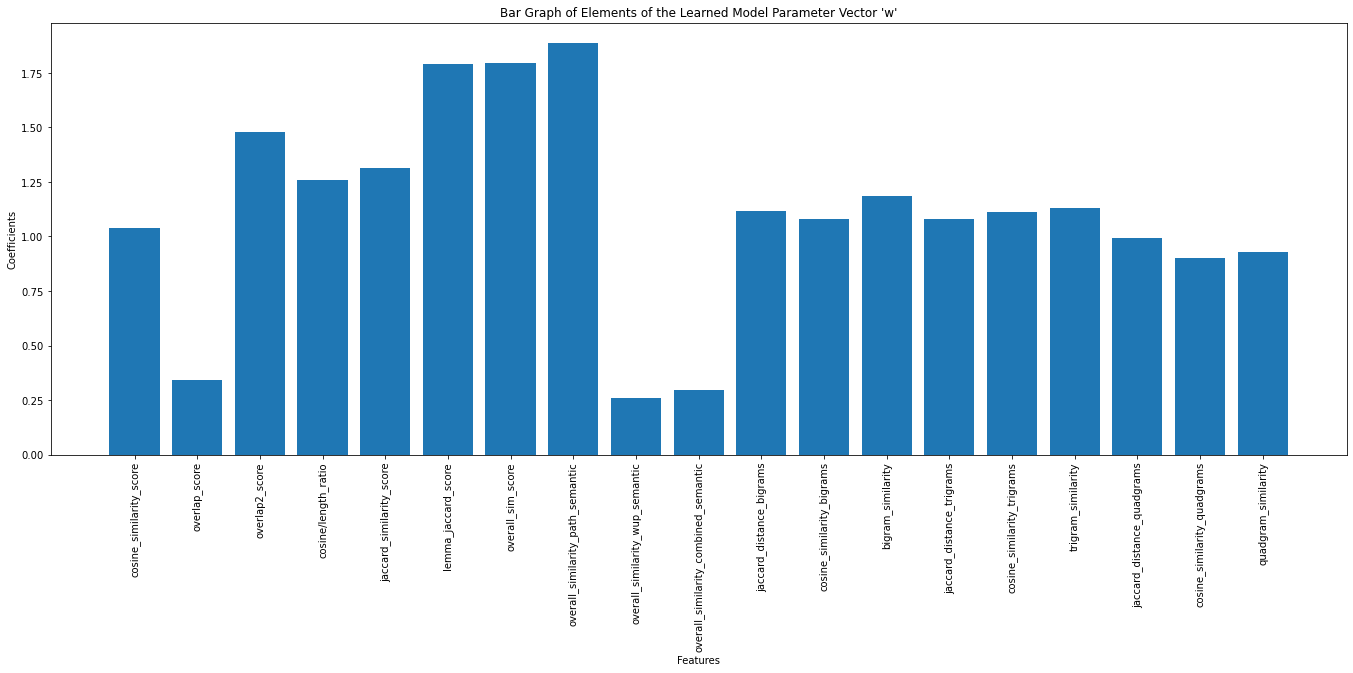

SVM:
Accuracy Score with train_df_no_outliers_randomUnder model/features 0.6574585635359116
Confusion Matrix: 
[[294  68]
 [180 182]]
Area Under Curve: 0.6574585635359117
Recall Score: 0.5027624309392266
Precision Score: 0.728


In [321]:
# Logistic Regression/SVM All Scores: train_df_no_outliers_randomUnder
x_train = train_df_no_outliers_randomUnder.drop(['classification'], axis=1).values
y_train = train_df_no_outliers_randomUnder['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values
print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
print(x_train.shape)
print(x_train_val.shape)

print('Logistic Regression:')
model_simple = simple_logistic_classify(x_train, y_train, x_train_val, y_train_val, missing_train_df_randomUnder.drop(['classification'], axis=1).columns, 'train_df_no_outliers_randomUnder')
print('SVM:')
model_simple2 = simple_svm_classify(x_train, y_train, x_train_val, y_train_val, 'train_df_no_outliers_randomUnder')

train: 458, val: 724
(458, 19)
(724, 19)
Logistic Regression:
Accuracy Score with train_df2_no_outliers_randomUnder model/features 0.6726519337016574
Confusion Matrix: 
[[288  74]
 [163 199]]
Area Under Curve: 0.6726519337016574
Recall Score: 0.5497237569060773
Precision Score: 0.7289377289377289
Our learned model parameter vector 'w':  [1.16820813 0.3347557  1.57233851 1.45725074 1.36758705 2.55693039
 2.44788435 1.05162912 0.82068897 0.93618517 0.90962292 0.90129227
 0.97263483 1.03092632 1.08716346 1.10207413 0.91615064 0.9022836
 0.91717649]


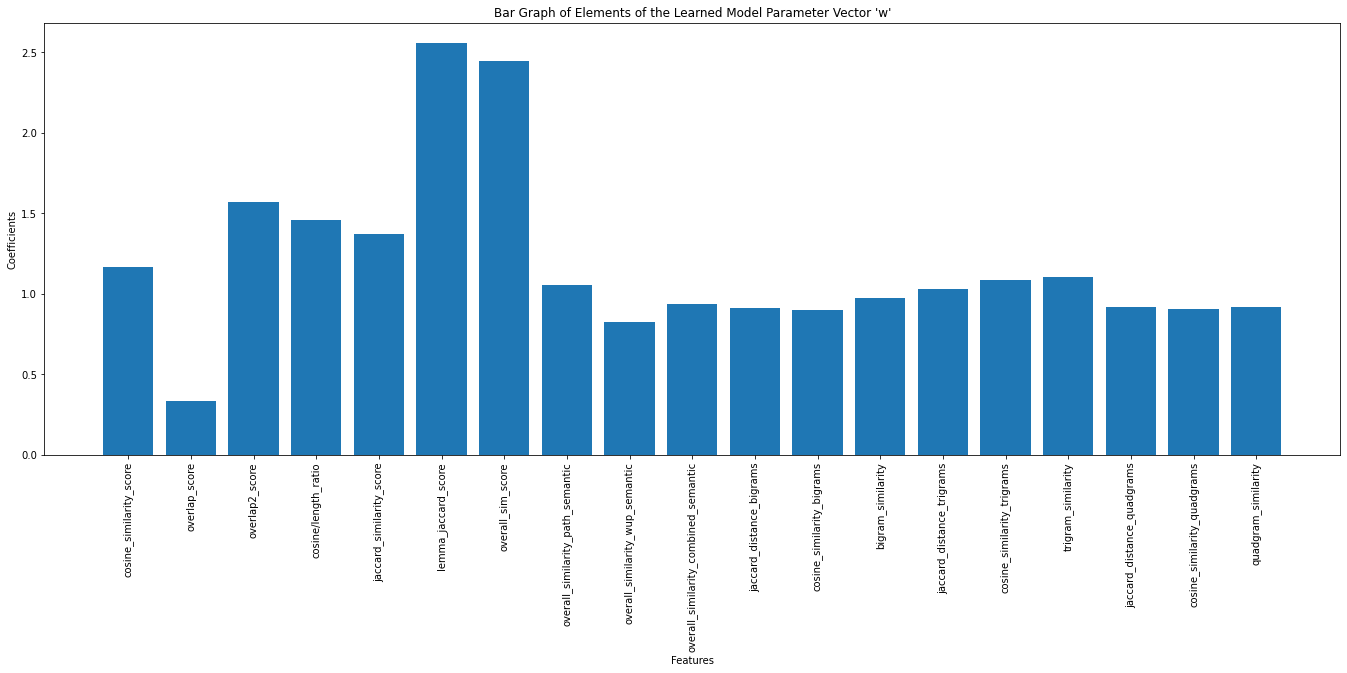

SVM:
Accuracy Score with train_df2_no_outliers_randomUnder model/features 0.664364640883978
Confusion Matrix: 
[[296  66]
 [177 185]]
Area Under Curve: 0.664364640883978
Recall Score: 0.511049723756906
Precision Score: 0.7370517928286853


In [322]:
# Logistic Regression/SVM All Scores: train_df2_no_outliers_randomUnder
x_train = train_df2_no_outliers_randomUnder.drop(['classification'], axis=1).values
y_train = train_df2_no_outliers_randomUnder['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values
print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
print(x_train.shape)
print(x_train_val.shape)

print('Logistic Regression:')
model_simple = simple_logistic_classify(x_train, y_train, x_train_val, y_train_val, missing_train_df_randomUnder.drop(['classification'], axis=1).columns, 'train_df2_no_outliers_randomUnder')
print('SVM:')
model_simple2 = simple_svm_classify(x_train, y_train, x_train_val, y_train_val, 'train_df2_no_outliers_randomUnder')

train: 376, val: 724
(376, 19)
(724, 19)
Logistic Regression:
Accuracy Score with missing_train_df_no_outliers_randomUnder model/features 0.6629834254143646
Confusion Matrix: 
[[291  71]
 [173 189]]
Area Under Curve: 0.6629834254143646
Recall Score: 0.5220994475138122
Precision Score: 0.7269230769230769
Our learned model parameter vector 'w':  [1.00101883 0.10078143 1.30636511 1.09470471 1.25687596 1.54233621
 1.62295875 0.72652453 1.3709923  1.05699657 0.87592951 0.79756271
 0.92345118 1.19658834 1.25682824 1.25789865 1.12031149 1.10768028
 1.14810373]


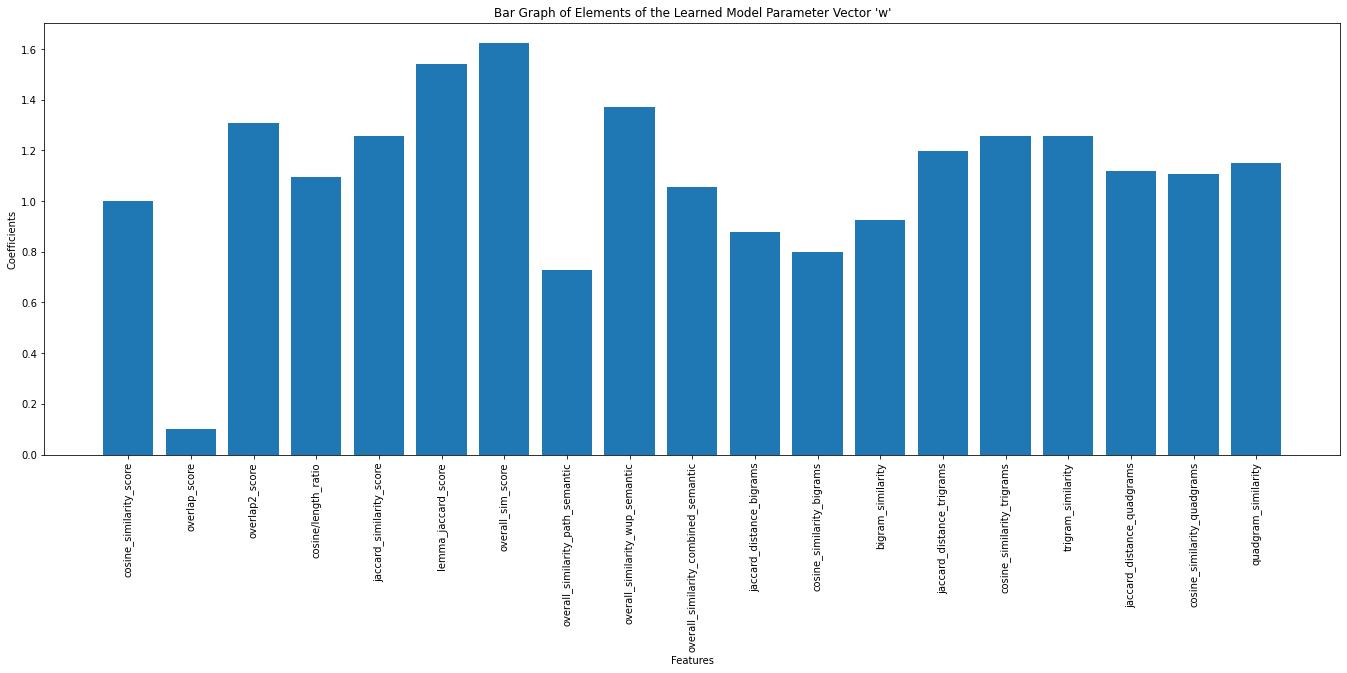

SVM:
Accuracy Score with missing_train_df_no_outliers_randomUnder model/features 0.6588397790055248
Confusion Matrix: 
[[291  71]
 [176 186]]
Area Under Curve: 0.6588397790055248
Recall Score: 0.5138121546961326
Precision Score: 0.7237354085603113


In [323]:
# Logistic Regression/SVM All Scores: missing_train_df_no_outliers_randomUnder
x_train = missing_train_df_no_outliers_randomUnder.drop(['classification'], axis=1).values
y_train = missing_train_df_no_outliers_randomUnder['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values
print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
print(x_train.shape)
print(x_train_val.shape)

print('Logistic Regression:')
model_simple = simple_logistic_classify(x_train, y_train, x_train_val, y_train_val, missing_train_df_randomUnder.drop(['classification'], axis=1).columns, 'missing_train_df_no_outliers_randomUnder')
print('SVM:')
model_simple2 = simple_svm_classify(x_train, y_train, x_train_val, y_train_val, 'missing_train_df_no_outliers_randomUnder')

train: 458, val: 724
(458, 19)
(724, 19)
Logistic Regression:
Accuracy Score with train_df3_no_outliers_randomUnder model/features 0.6726519337016574
Confusion Matrix: 
[[288  74]
 [163 199]]
Area Under Curve: 0.6726519337016574
Recall Score: 0.5497237569060773
Precision Score: 0.7289377289377289
Our learned model parameter vector 'w':  [1.16820813 0.3347557  1.57233851 1.45725074 1.36758705 2.55693039
 2.44788435 1.05162912 0.82068897 0.93618517 0.90962292 0.90129227
 0.97263483 1.03092632 1.08716346 1.10207413 0.91615064 0.9022836
 0.91717649]


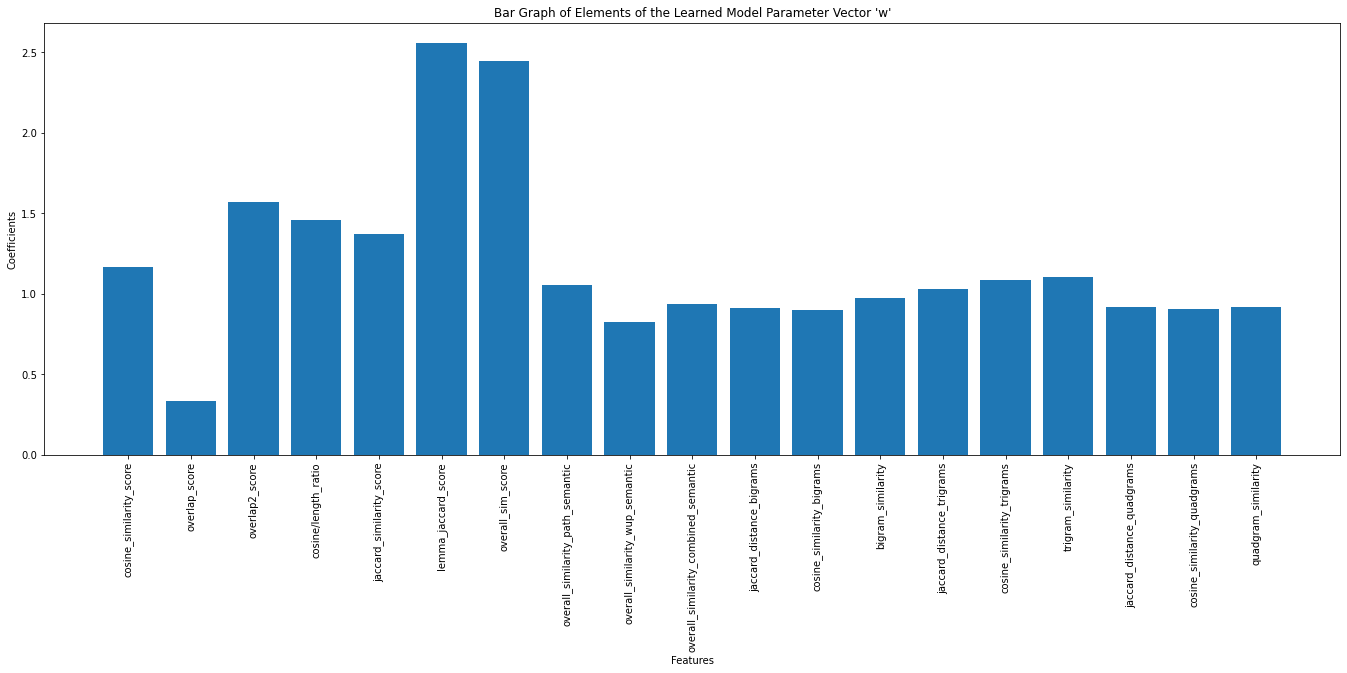

SVM:
Accuracy Score with train_df3_no_outliers_randomUnder model/features 0.664364640883978
Confusion Matrix: 
[[296  66]
 [177 185]]
Area Under Curve: 0.664364640883978
Recall Score: 0.511049723756906
Precision Score: 0.7370517928286853


In [324]:
# Logistic Regression/SVM All Scores: train_df3_no_outliers_randomUnder
x_train = train_df3_no_outliers_randomUnder.drop(['classification'], axis=1).values
y_train = train_df3_no_outliers_randomUnder['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values
print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
print(x_train.shape)
print(x_train_val.shape)

print('Logistic Regression:')
model_simple = simple_logistic_classify(x_train, y_train, x_train_val, y_train_val, missing_train_df_randomUnder.drop(['classification'], axis=1).columns, 'train_df3_no_outliers_randomUnder')
print('SVM:')
model_simple2 = simple_svm_classify(x_train, y_train, x_train_val, y_train_val, 'train_df3_no_outliers_randomUnder')

## Models with Parameters Added (GridSearchCV):
We only do this for the models that have been seeing the best performance

In [78]:
w = [{0:75,1:25}, {0:76,1:24},
     {0:4,1:3}, {0:3,1:1.0}, {0:.75,1:.25}, {0:0.745156,1:0.254844}, {0:74.5,1:25.5},
     {0:1,1:.25}, {0:10,1:1.0}, {0:0.01,1:1.0}, {0:0.01,1:10}, {0:1.0,1:1.0}, {0:1.0,1:0.1}, {0:0.5,1:0.5},
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:50, 1:50}]
Cvals = [10**(-1),.5, 1, 1.5, 2, 5, 10]
hyperparam_grid = {"class_weight": w, "C": Cvals}

In [73]:
lg3 = LogisticRegression(fit_intercept = True, penalty = 'l2',random_state=123)
grid = GridSearchCV(lg3,hyperparam_grid, cv=100, n_jobs=-1, refit=True)
x_sub = train_df3_no_outliers_randomUnder.drop(['classification', 'overlap_score', 'overlap2_score'], axis=1)
y_sub = train_df3_no_outliers_randomUnder['classification']
grid.fit(x_sub,y_sub)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.8885714285714286 with param: {'C': 2, 'class_weight': {0: 50, 1: 50}}


train: 4077, val: 724
(4077, 17)
(724, 17)
Logistic Regression:
Accuracy Score with train_df model/features 0.6740331491712708
Confusion Matrix: 
[[164 198]
 [ 38 324]]
Area Under Curve: 0.6740331491712708
Recall Score: 0.8950276243093923
Precision Score: 0.6206896551724138
Our learned model parameter vector 'w':  [1.28995766 1.97554794 0.21974852 5.84504027 1.60693056 0.74308327
 0.32937733 1.03426479 1.20437524 0.59335737 0.37816945 0.32741764
 1.85454051 1.08102242 0.4772469  0.63129397 0.08656714]


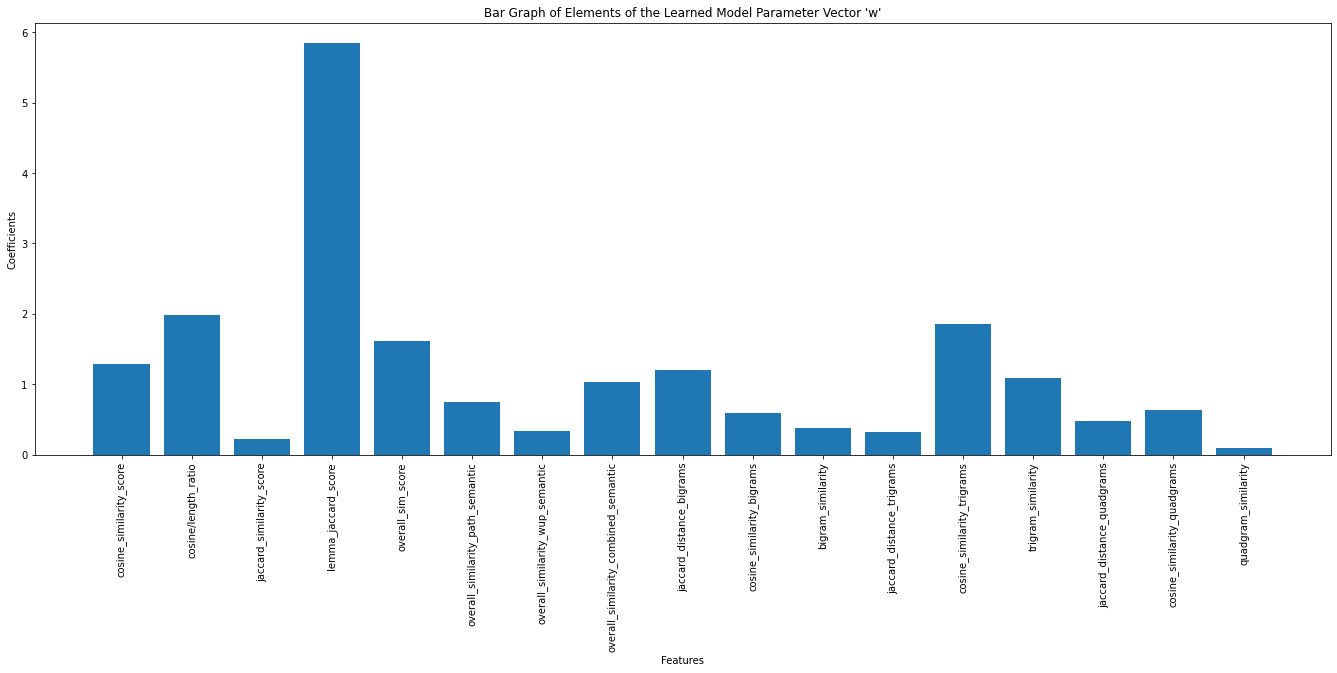

In [107]:
x_train = train_df.drop(['classification', 'overlap_score', 'overlap2_score'], axis=1).values
y_train = train_df['classification'].values
x_train_val = dev_df.drop(['classification', 'overlap_score', 'overlap2_score'], axis=1).values
y_train_val = dev_df['classification'].values
print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
print(x_train.shape)
print(x_train_val.shape)

print('Logistic Regression:')
model_simple = simple_logistic_classify(x_train, y_train, x_train_val, y_train_val, train_df.drop(['classification', 'overlap_score', 'overlap2_score'], axis=1).columns, 'train_df', _C = grid.best_params_['C'], w = grid.best_params_['class_weight'])

In [83]:
lg3 = LogisticRegression(fit_intercept = True, penalty = 'l2',random_state=123)
grid = GridSearchCV(lg3,hyperparam_grid, cv=100, n_jobs=-1, refit=True)
x_sub = dev_df.drop(['classification'], axis=1)
y_sub = dev_df['classification']
grid.fit(x_sub,y_sub)
print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

Best score: 0.6985714285714285 with param: {'C': 1.5, 'class_weight': {0: 4, 1: 3}}


train: 794, val: 724
(794, 8)
(724, 8)
Logistic Regression:
Accuracy Score with train_df3_no_outliers_randomUnder model/features 0.6933701657458563
Confusion Matrix: 
[[244 118]
 [104 258]]
Area Under Curve: 0.6933701657458564
Recall Score: 0.712707182320442
Precision Score: 0.6861702127659575
Our learned model parameter vector 'w':  [2.39367511 6.04926295 4.78993697 8.1887798  6.49626592 4.35596277
 2.90153395 3.63715618]


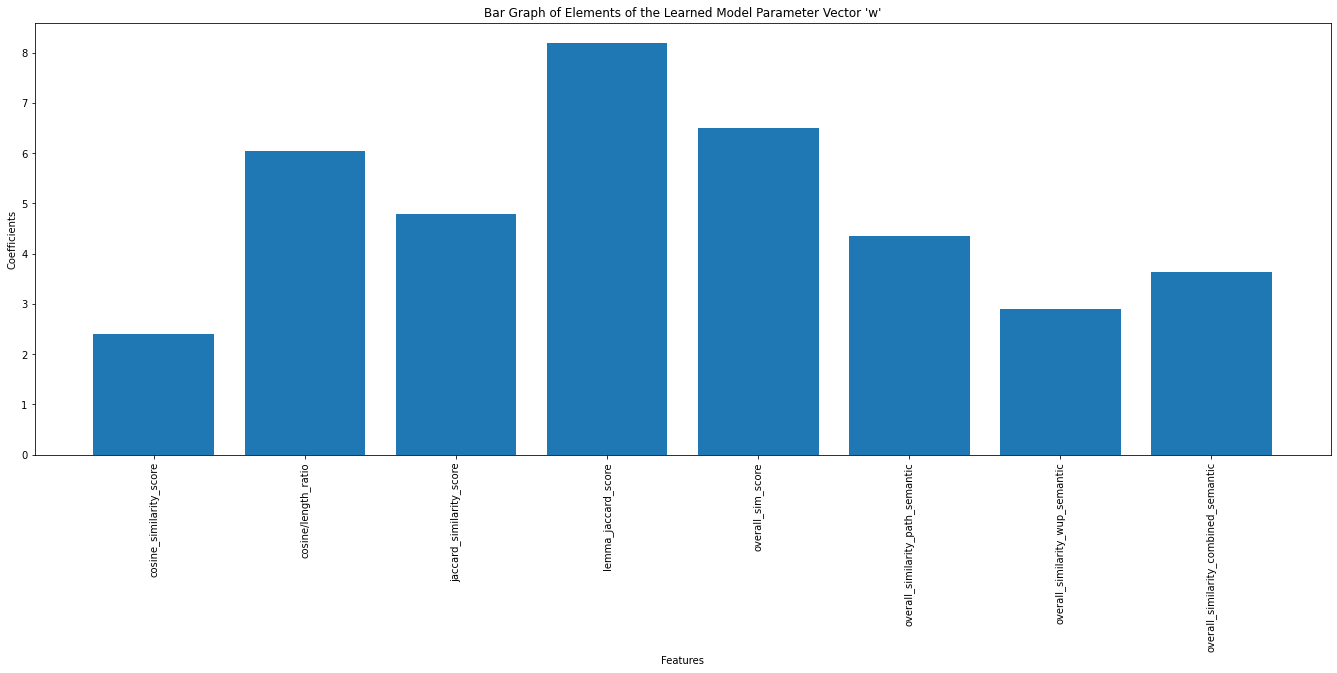

In [84]:
x_train = train_df3_no_outliers_randomUnder.drop(['classification', 'overlap_score', 'overlap2_score'], axis=1).values
y_train = train_df3_no_outliers_randomUnder['classification'].values
x_train_val = dev_df.drop(['classification', 'overlap_score', 'overlap2_score'], axis=1).values
y_train_val = dev_df['classification'].values
print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
print(x_train.shape)
print(x_train_val.shape)

print('Logistic Regression:')
model_simple = simple_logistic_classify(x_train, y_train, x_train_val, y_train_val, missing_train_df_randomUnder.drop(['classification', 'overlap_score', 'overlap2_score'], axis=1).columns, 'train_df3_no_outliers_randomUnder', _C = grid.best_params_['C'], w = grid.best_params_['class_weight'])

## Models with Over-Under:
We only have datasets available for this for those that performed the best above

In [344]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Logistic Regression:
Accuracy Score with train_df_RandomUnderSampler model/features 0.6975138121546961
Confusion Matrix: 
[[260 102]
 [117 245]]
Area Under Curve: 0.697513812154696
Recall Score: 0.6767955801104972
Precision Score: 0.7060518731988472
Our learned model parameter vector 'w':  [3.34469999 1.85519353 1.29478761 1.53681625 1.58148125 0.72817772]


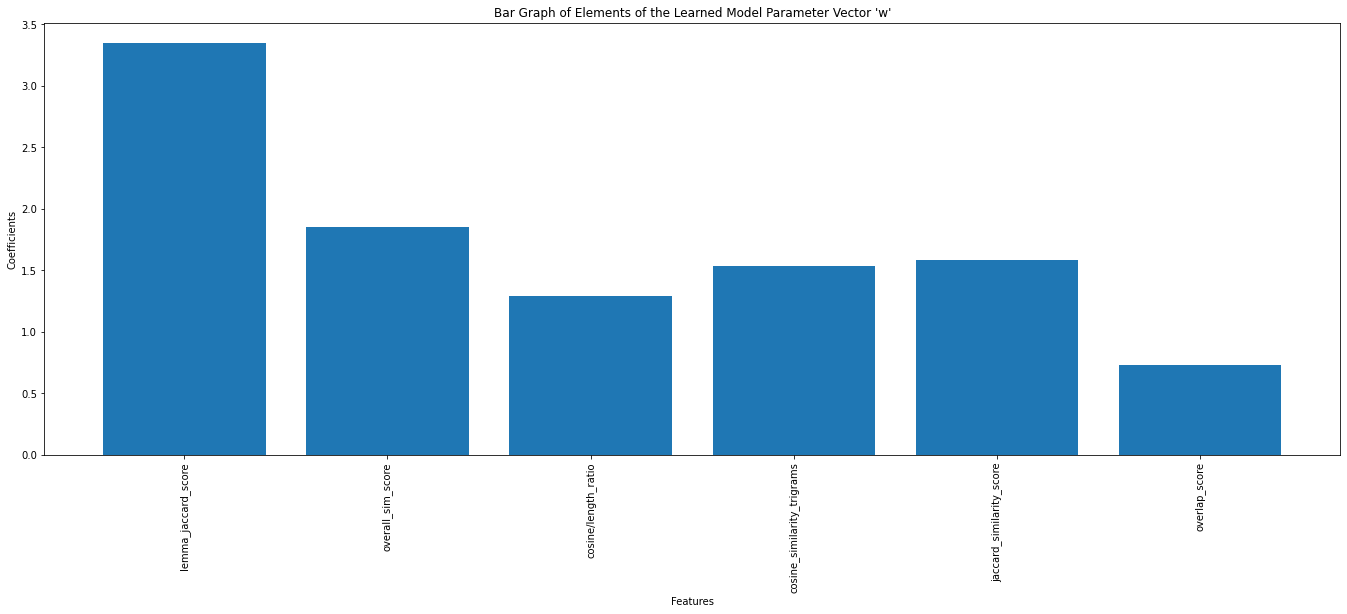

SVM:
Accuracy Score with train_df_RandomUnderSampler model/features 0.7002762430939227
Confusion Matrix: 
[[282  80]
 [137 225]]
Area Under Curve: 0.7002762430939227
Recall Score: 0.6215469613259669
Precision Score: 0.7377049180327869


In [346]:
x_train = train_df.drop(['classification'], axis=1).values
y_train = train_df['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = RandomUnderSampler(random_state=123)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, train_df.drop(['classification'], axis=1).columns,'train_df_RandomUnderSampler')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'train_df_RandomUnderSampler')

Logistic Regression:
Accuracy Score with train_df_RandomOverSampler model/features 0.6961325966850829
Confusion Matrix: 
[[261 101]
 [119 243]]
Area Under Curve: 0.696132596685083
Recall Score: 0.6712707182320442
Precision Score: 0.7063953488372093
Our learned model parameter vector 'w':  [4.47202615 1.93617982 1.34566167 1.91121193 1.12708233 0.54531118]


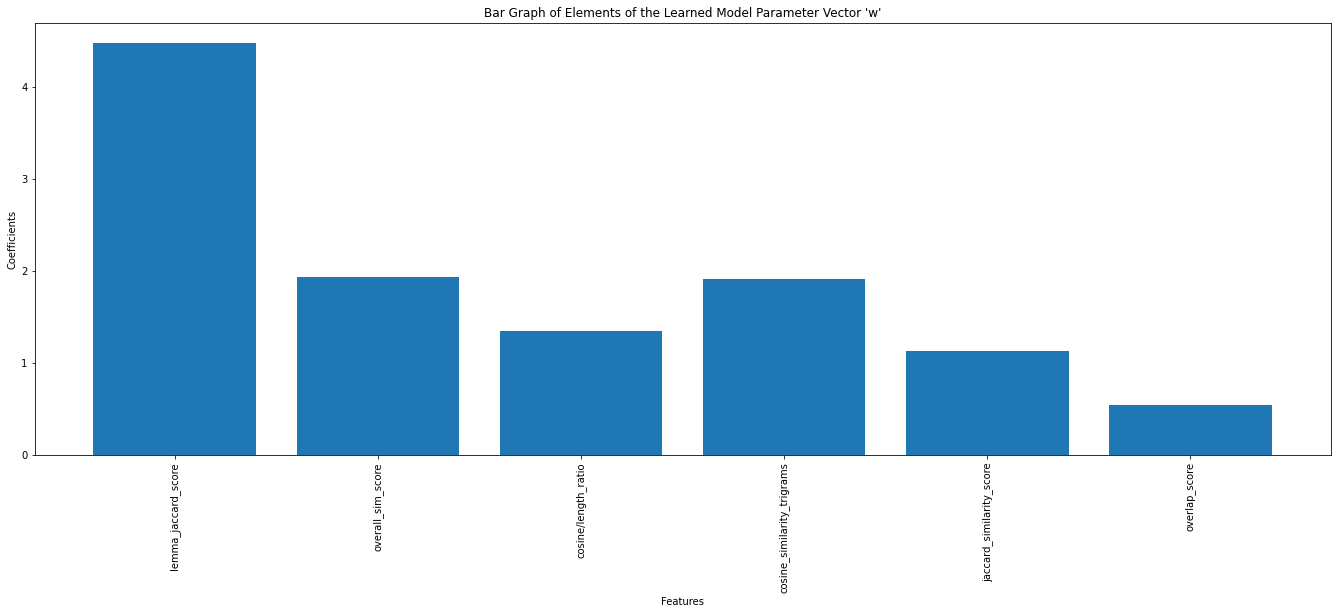

SVM:
Accuracy Score with train_df_RandomOverSampler model/features 0.6975138121546961
Confusion Matrix: 
[[279  83]
 [136 226]]
Area Under Curve: 0.6975138121546962
Recall Score: 0.6243093922651933
Precision Score: 0.7313915857605178


In [347]:
x_train = train_df.drop(['classification'], axis=1).values
y_train = train_df['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = RandomOverSampler(random_state=123)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, train_df.drop(['classification'], axis=1).columns,'train_df_RandomOverSampler')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'train_df_RandomOverSampler')

Logistic Regression:
Accuracy Score with train_df2_RandomUnderSampler model/features 0.7002762430939227
Confusion Matrix: 
[[259 103]
 [114 248]]
Area Under Curve: 0.7002762430939227
Recall Score: 0.6850828729281768
Precision Score: 0.7065527065527065
Our learned model parameter vector 'w':  [4.5337052  1.73046581 1.18321856 1.64315691 0.74479195 1.20637188]


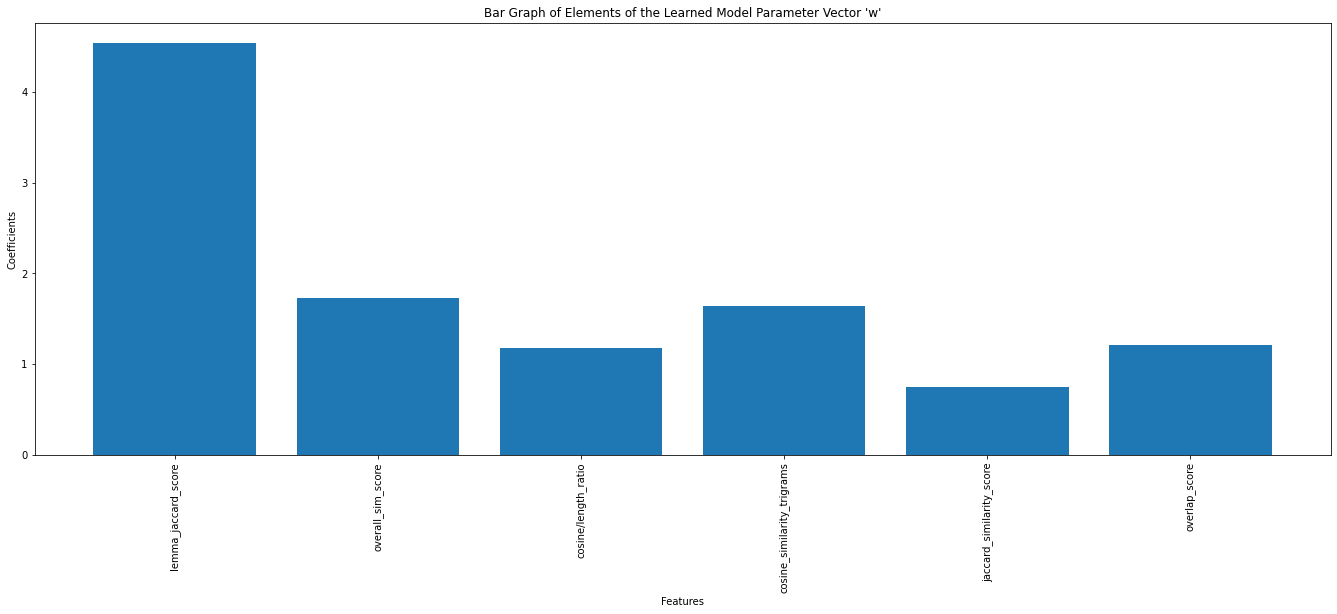

SVM:
Accuracy Score with train_df2_RandomUnderSampler model/features 0.6919889502762431
Confusion Matrix: 
[[270  92]
 [131 231]]
Area Under Curve: 0.6919889502762431
Recall Score: 0.638121546961326
Precision Score: 0.7151702786377709


In [348]:
x_train = train_df2.drop(['classification'], axis=1).values
y_train = train_df2['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = RandomUnderSampler(random_state=123)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, train_df2.drop(['classification'], axis=1).columns,'train_df2_RandomUnderSampler')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'train_df2_RandomUnderSampler')

Logistic Regression:
Accuracy Score with train_df2_RandomOverSampler model/features 0.6975138121546961
Confusion Matrix: 
[[259 103]
 [116 246]]
Area Under Curve: 0.6975138121546962
Recall Score: 0.6795580110497238
Precision Score: 0.7048710601719198
Our learned model parameter vector 'w':  [5.75214476 1.56565667 1.44501896 2.16272619 0.46657937 1.33363837]


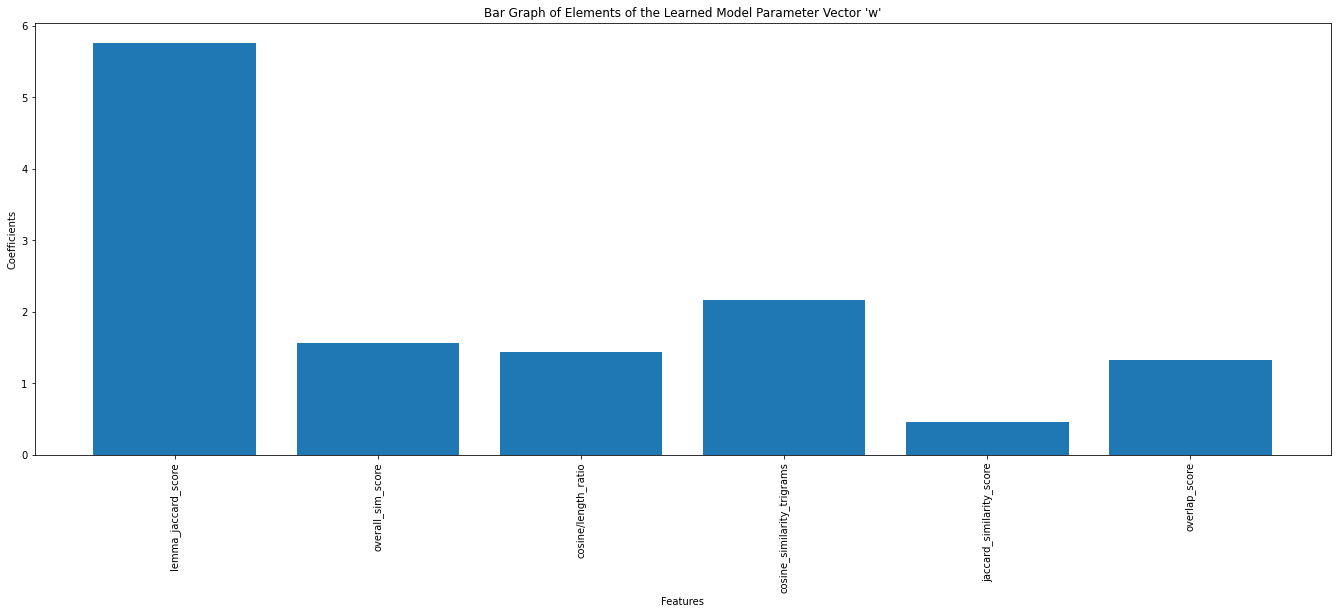

SVM:
Accuracy Score with train_df2_RandomOverSampler model/features 0.6878453038674033
Confusion Matrix: 
[[265  97]
 [129 233]]
Area Under Curve: 0.6878453038674033
Recall Score: 0.643646408839779
Precision Score: 0.706060606060606


In [349]:
x_train = train_df2.drop(['classification'], axis=1).values
y_train = train_df2['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = RandomOverSampler(random_state=123)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, train_df2.drop(['classification'], axis=1).columns,'train_df2_RandomOverSampler')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'train_df2_RandomOverSampler')

Logistic Regression:
Accuracy Score with train_df3_RandomUnderSampler model/features 0.7002762430939227
Confusion Matrix: 
[[259 103]
 [114 248]]
Area Under Curve: 0.7002762430939227
Recall Score: 0.6850828729281768
Precision Score: 0.7065527065527065
Our learned model parameter vector 'w':  [4.5337052  1.73046581 1.18321856 1.64315691 0.74479195 1.20637188]


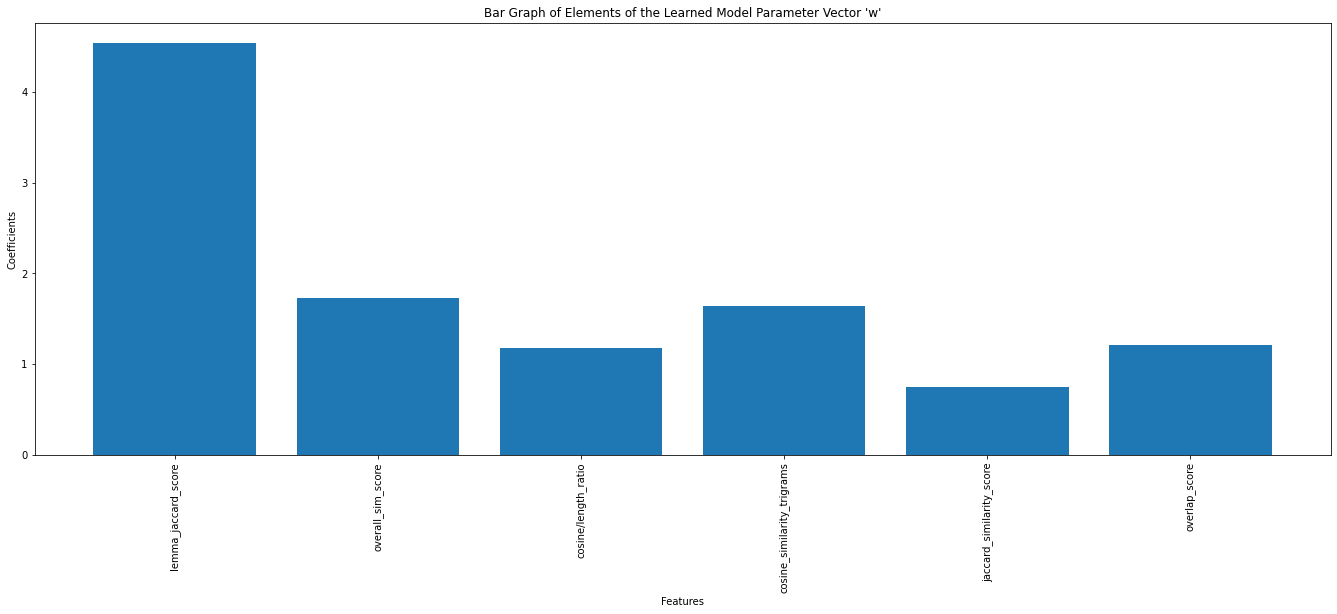

SVM:
Accuracy Score with train_df3_RandomUnderSampler model/features 0.6919889502762431
Confusion Matrix: 
[[270  92]
 [131 231]]
Area Under Curve: 0.6919889502762431
Recall Score: 0.638121546961326
Precision Score: 0.7151702786377709


In [352]:
x_train = train_df_3.drop(['classification'], axis=1).values
y_train = train_df_3['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = RandomUnderSampler(random_state=123)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, train_df_3.drop(['classification'], axis=1).columns,'train_df3_RandomUnderSampler')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'train_df3_RandomUnderSampler')

Logistic Regression:
Accuracy Score with train_df3_RandomOverSampler model/features 0.6975138121546961
Confusion Matrix: 
[[259 103]
 [116 246]]
Area Under Curve: 0.6975138121546962
Recall Score: 0.6795580110497238
Precision Score: 0.7048710601719198
Our learned model parameter vector 'w':  [5.75214476 1.56565667 1.44501896 2.16272619 0.46657937 1.33363837]


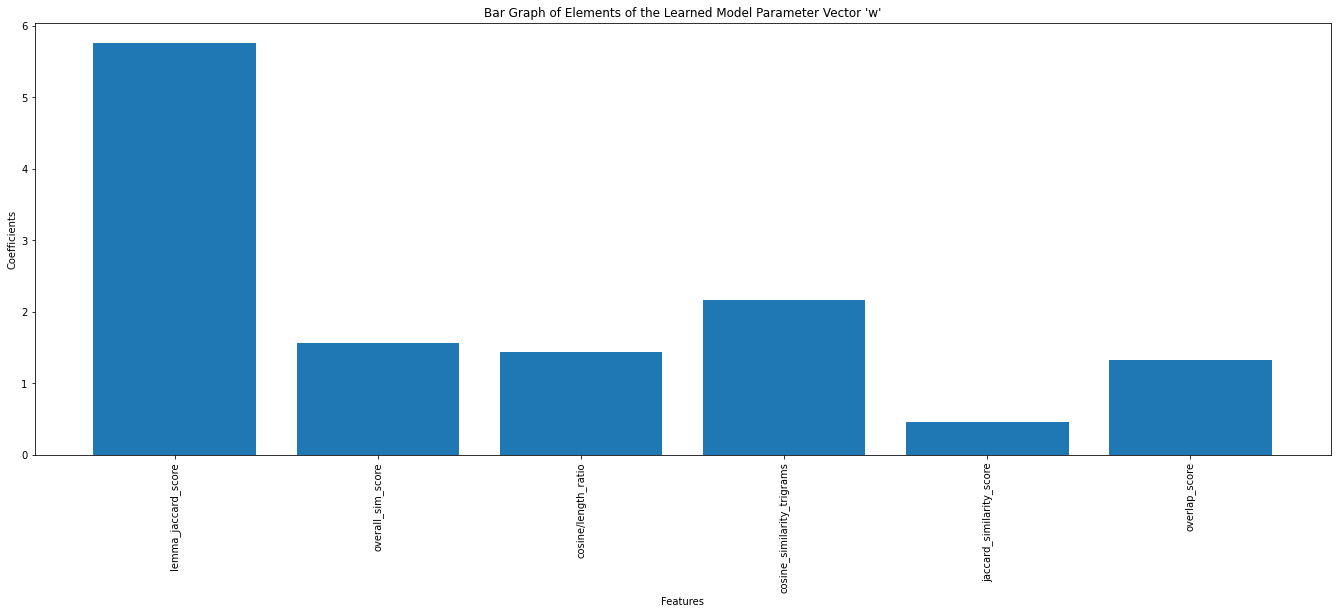

SVM:
Accuracy Score with train_df3_RandomOverSampler model/features 0.6878453038674033
Confusion Matrix: 
[[265  97]
 [129 233]]
Area Under Curve: 0.6878453038674033
Recall Score: 0.643646408839779
Precision Score: 0.706060606060606


In [353]:
x_train = train_df_3.drop(['classification'], axis=1).values
y_train = train_df_3['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = RandomOverSampler(random_state=123)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, train_df_3.drop(['classification'], axis=1).columns,'train_df3_RandomOverSampler')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'train_df3_RandomOverSampler')

Logistic Regression:
Accuracy Score with missing_train_RandomUnderSampler model/features 0.7002762430939227
Confusion Matrix: 
[[260 102]
 [115 247]]
Area Under Curve: 0.7002762430939226
Recall Score: 0.6823204419889503
Precision Score: 0.7077363896848138
Our learned model parameter vector 'w':  [3.29177227 1.90035277 1.60608032 1.58715928 1.43844841 0.87661588]


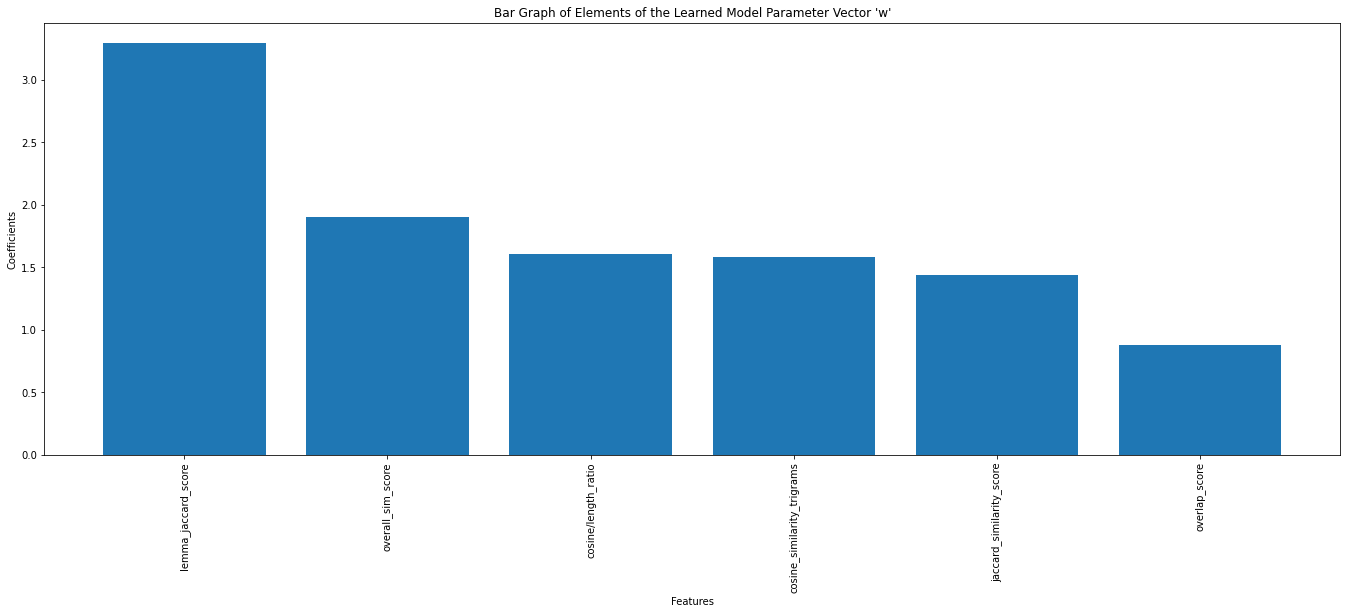

SVM:
Accuracy Score with missing_train_RandomUnderSampler model/features 0.7044198895027625
Confusion Matrix: 
[[285  77]
 [137 225]]
Area Under Curve: 0.7044198895027622
Recall Score: 0.6215469613259669
Precision Score: 0.7450331125827815


In [355]:
x_train = missing_train.drop(['classification'], axis=1).values
y_train = missing_train['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = RandomUnderSampler(random_state=123)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, missing_train.drop(['classification'], axis=1).columns,'missing_train_RandomUnderSampler')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'missing_train_RandomUnderSampler')

Logistic Regression:
Accuracy Score with missing_train_RandomOverSampler model/features 0.7016574585635359
Confusion Matrix: 
[[264  98]
 [118 244]]
Area Under Curve: 0.7016574585635359
Recall Score: 0.6740331491712708
Precision Score: 0.7134502923976608
Our learned model parameter vector 'w':  [4.13811044 1.76732769 1.4566352  1.89200762 1.19375682 1.18746459]


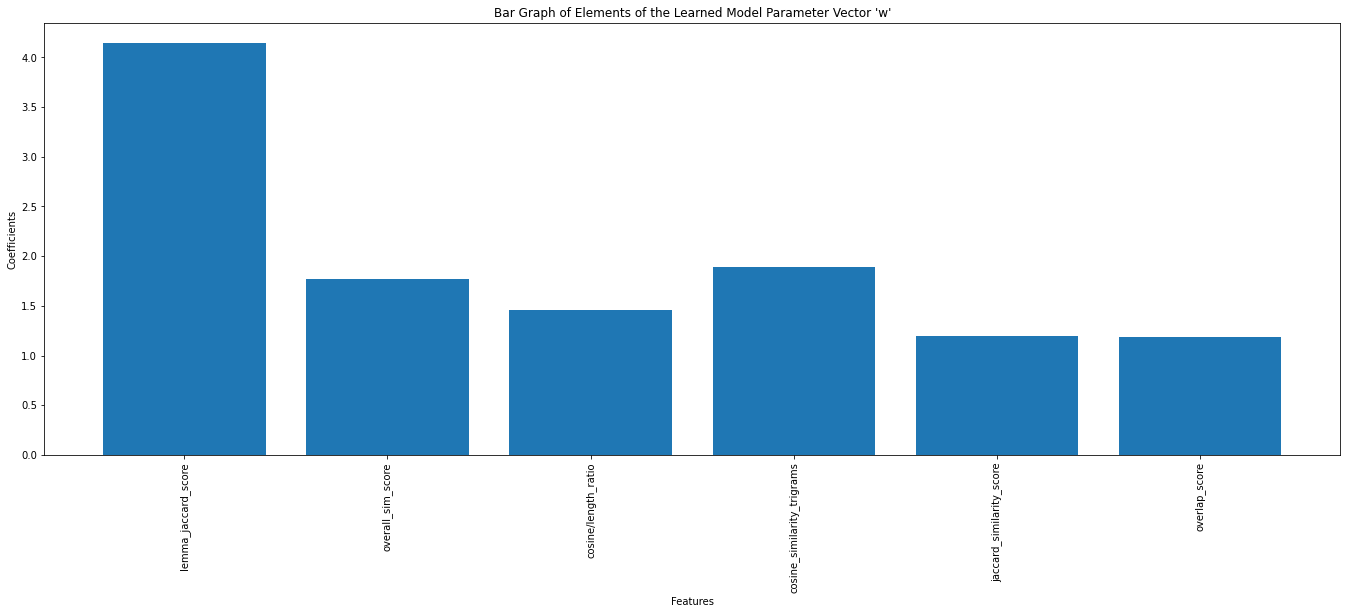

SVM:
Accuracy Score with missing_train_RandomOverSampler model/features 0.6933701657458563
Confusion Matrix: 
[[276  86]
 [136 226]]
Area Under Curve: 0.6933701657458564
Recall Score: 0.6243093922651933
Precision Score: 0.7243589743589743


In [356]:
x_train = missing_train.drop(['classification'], axis=1).values
y_train = missing_train['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = RandomOverSampler(random_state=123)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, missing_train.drop(['classification'], axis=1).columns,'missing_train_RandomOverSampler')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'missing_train_RandomOverSampler')

In [359]:
#No Outliers:

Logistic Regression:
Accuracy Score with train_df_no_outliers_RandomUnderSampler model/features 0.6823204419889503
Confusion Matrix: 
[[257 105]
 [125 237]]
Area Under Curve: 0.6823204419889503
Recall Score: 0.6546961325966851
Precision Score: 0.6929824561403509
Our learned model parameter vector 'w':  [5.98731227 4.29354184 5.04762113 4.55385082 5.7198796  0.43514862]


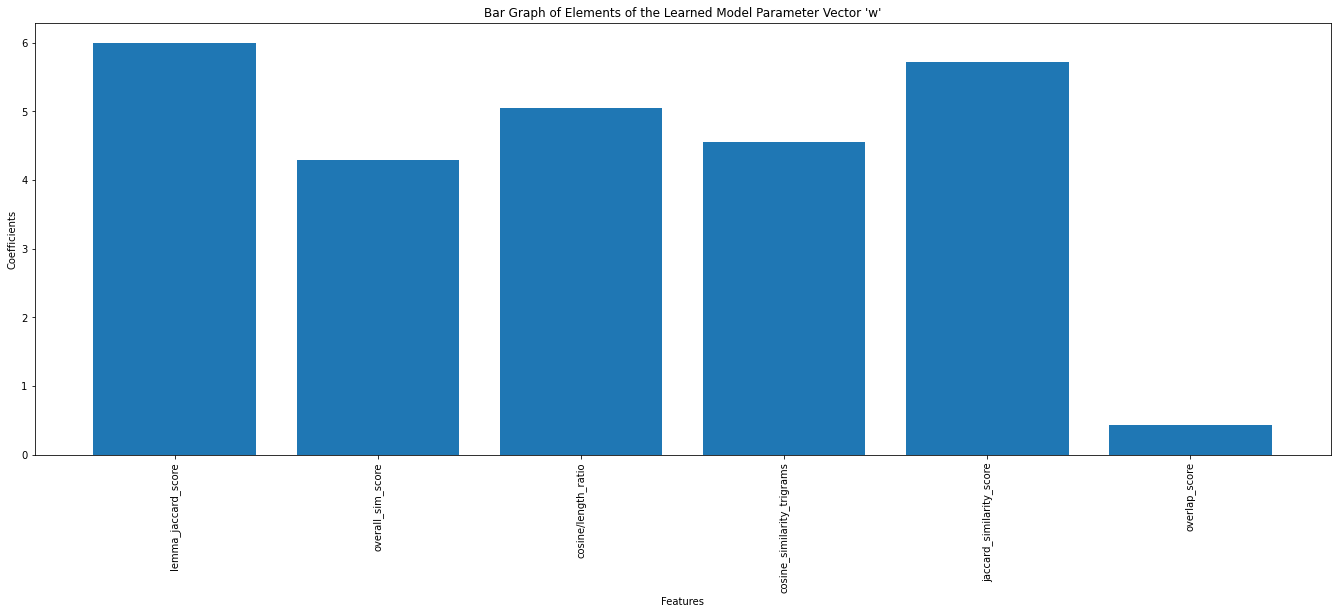

SVM:
Accuracy Score with train_df_no_outliers_RandomUnderSampler model/features 0.68646408839779
Confusion Matrix: 
[[262 100]
 [127 235]]
Area Under Curve: 0.68646408839779
Recall Score: 0.649171270718232
Precision Score: 0.7014925373134329


In [360]:
x_train = train_df_no_outliers.drop(['classification'], axis=1).values
y_train = train_df_no_outliers['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = RandomUnderSampler(random_state=123)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, train_df_no_outliers.drop(['classification'], axis=1).columns,'train_df_no_outliers_RandomUnderSampler')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'train_df_no_outliers_RandomUnderSampler')

Logistic Regression:
Accuracy Score with train_df_no_outliers_RandomOverSampler model/features 0.6837016574585635
Confusion Matrix: 
[[257 105]
 [124 238]]
Area Under Curve: 0.6837016574585635
Recall Score: 0.6574585635359116
Precision Score: 0.6938775510204082
Our learned model parameter vector 'w':  [8.37004231 6.05540046 6.52348461 5.62647667 7.32607519 0.98647551]


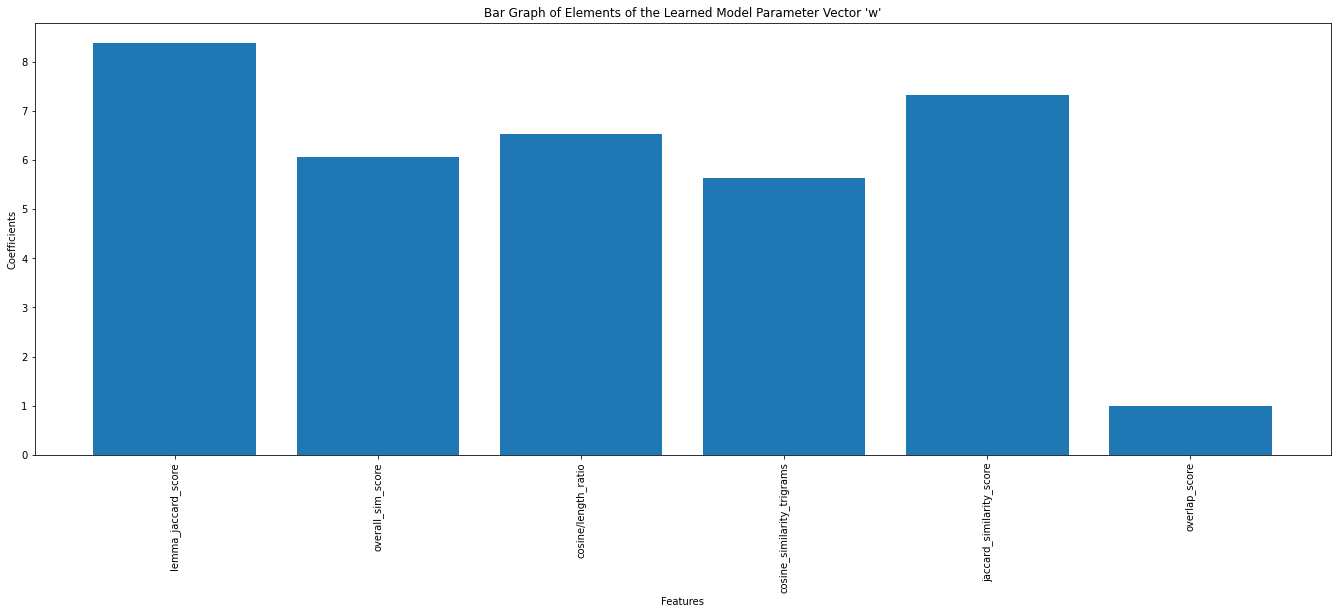

SVM:
Accuracy Score with train_df_no_outliers_RandomOverSampler model/features 0.6878453038674033
Confusion Matrix: 
[[259 103]
 [123 239]]
Area Under Curve: 0.6878453038674033
Recall Score: 0.6602209944751382
Precision Score: 0.6988304093567251


In [361]:
x_train = train_df_no_outliers.drop(['classification'], axis=1).values
y_train = train_df_no_outliers['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = RandomOverSampler(random_state=123)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, train_df_no_outliers.drop(['classification'], axis=1).columns,'train_df_no_outliers_RandomOverSampler')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'train_df_no_outliers_RandomOverSampler')

Logistic Regression:
Accuracy Score with train_df2_no_outliers_RandomUnderSampler model/features 0.68646408839779
Confusion Matrix: 
[[251 111]
 [116 246]]
Area Under Curve: 0.6864640883977902
Recall Score: 0.6795580110497238
Precision Score: 0.6890756302521008
Our learned model parameter vector 'w':  [6.48193653 4.29643751 5.14970959 4.33232957 5.16981371 0.81481694]


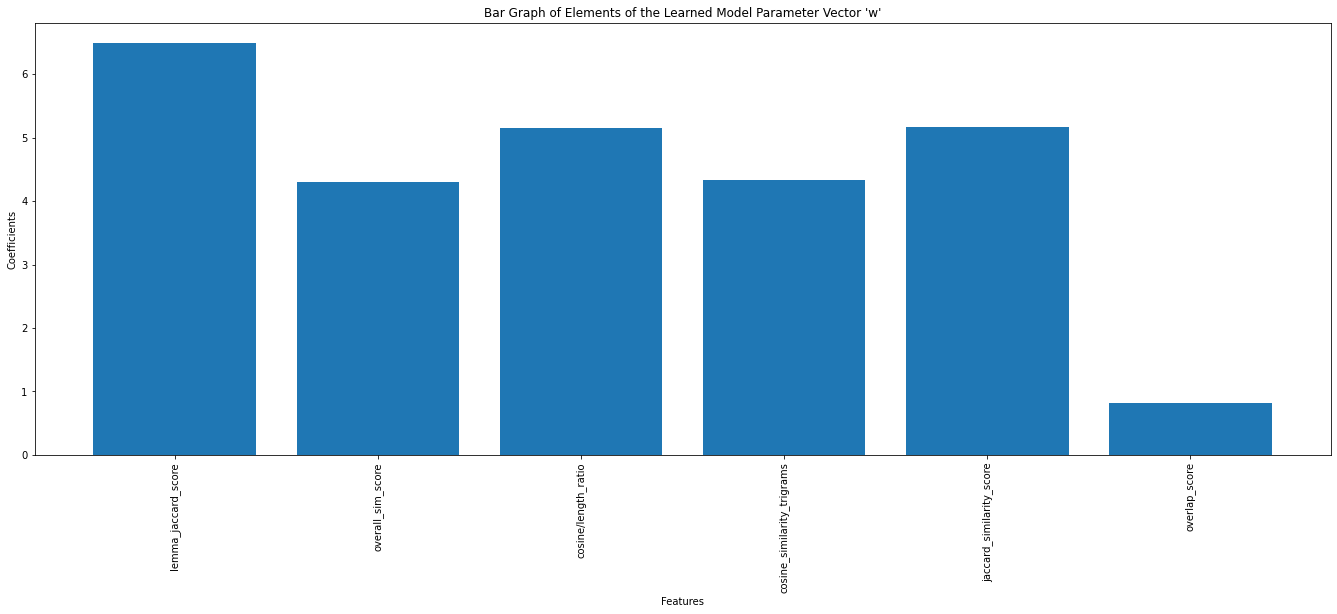

SVM:
Accuracy Score with train_df2_no_outliers_RandomUnderSampler model/features 0.68646408839779
Confusion Matrix: 
[[245 117]
 [110 252]]
Area Under Curve: 0.68646408839779
Recall Score: 0.6961325966850829
Precision Score: 0.6829268292682927


In [362]:
x_train = train_df2_no_outliers.drop(['classification'], axis=1).values
y_train = train_df2_no_outliers['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = RandomUnderSampler(random_state=123)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, train_df2_no_outliers.drop(['classification'], axis=1).columns,'train_df2_no_outliers_RandomUnderSampler')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'train_df2_no_outliers_RandomUnderSampler')

Logistic Regression:
Accuracy Score with train_df2_no_outliers_RandomOverSampler model/features 0.6850828729281768
Confusion Matrix: 
[[247 115]
 [113 249]]
Area Under Curve: 0.6850828729281768
Recall Score: 0.6878453038674033
Precision Score: 0.6840659340659341
Our learned model parameter vector 'w':  [9.30442063 6.18250433 6.88913055 5.00485376 6.88106083 1.37489726]


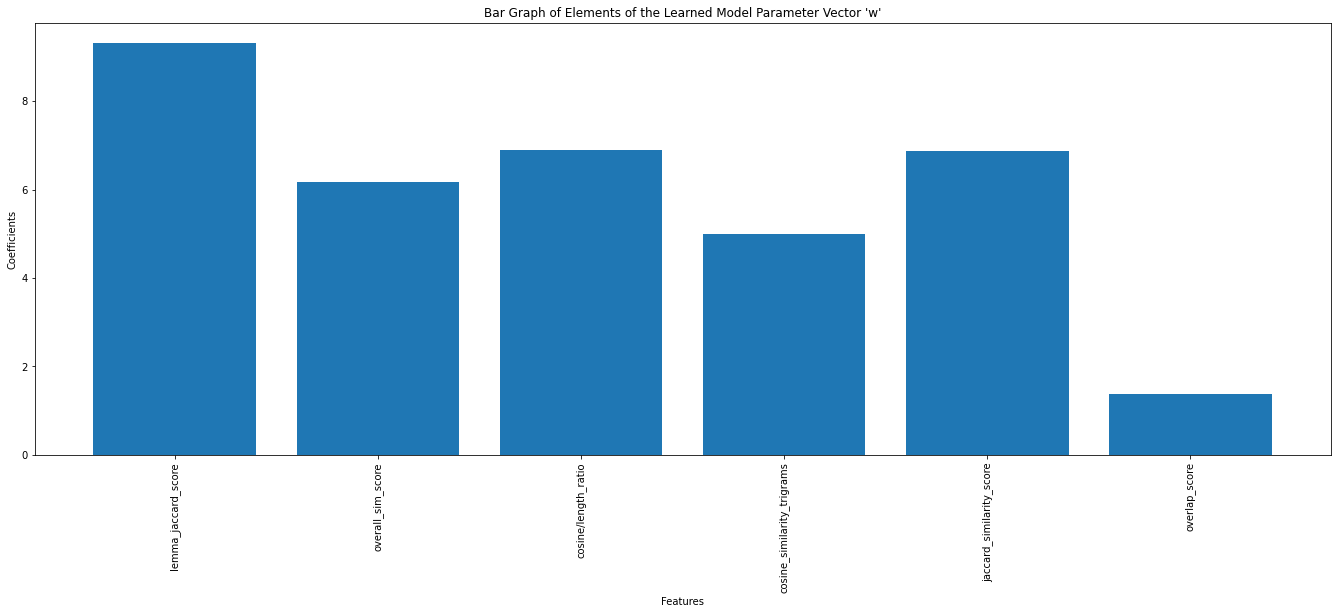

SVM:
Accuracy Score with train_df2_no_outliers_RandomOverSampler model/features 0.68646408839779
Confusion Matrix: 
[[240 122]
 [105 257]]
Area Under Curve: 0.6864640883977902
Recall Score: 0.7099447513812155
Precision Score: 0.6781002638522428


In [363]:
x_train = train_df2_no_outliers.drop(['classification'], axis=1).values
y_train = train_df2_no_outliers['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = RandomOverSampler(random_state=123)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, train_df2_no_outliers.drop(['classification'], axis=1).columns,'train_df2_no_outliers_RandomOverSampler')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'train_df2_no_outliers_RandomOverSampler')

Logistic Regression:
Accuracy Score with train_df3_no_outliers_RandomUnderSampler model/features 0.68646408839779
Confusion Matrix: 
[[251 111]
 [116 246]]
Area Under Curve: 0.6864640883977902
Recall Score: 0.6795580110497238
Precision Score: 0.6890756302521008
Our learned model parameter vector 'w':  [6.48193653 4.29643751 5.14970959 4.33232957 5.16981371 0.81481694]


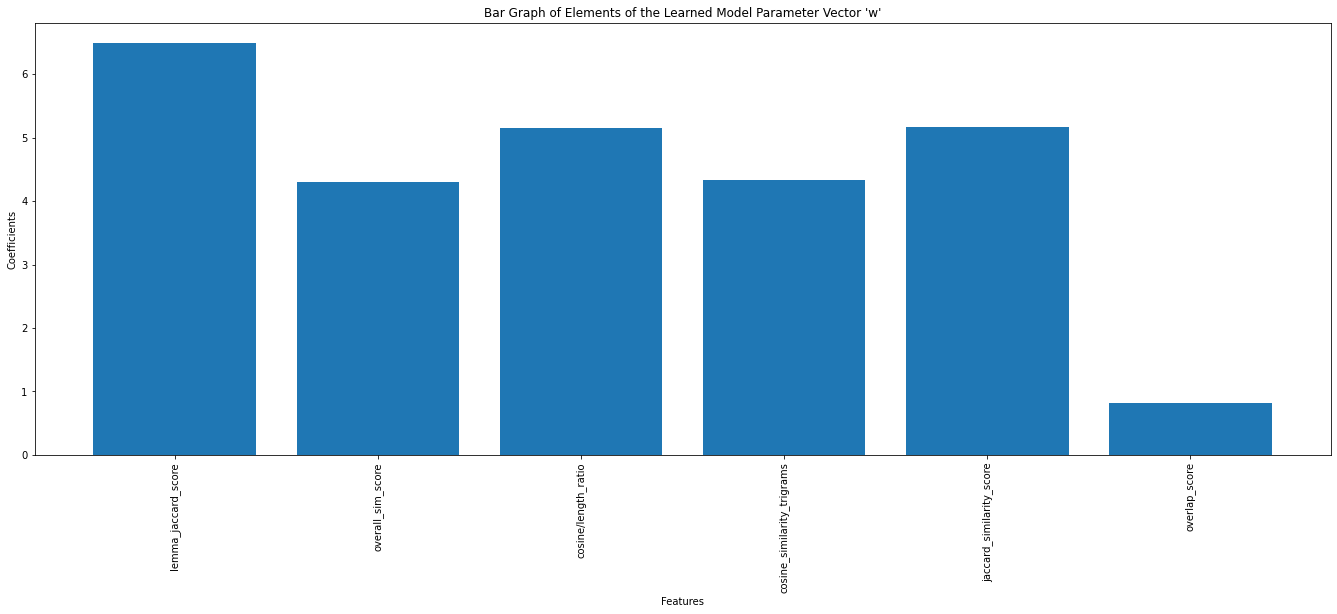

SVM:
Accuracy Score with train_df3_no_outliers_RandomUnderSampler model/features 0.68646408839779
Confusion Matrix: 
[[245 117]
 [110 252]]
Area Under Curve: 0.68646408839779
Recall Score: 0.6961325966850829
Precision Score: 0.6829268292682927


In [364]:
x_train = train_df3_no_outliers.drop(['classification'], axis=1).values
y_train = train_df3_no_outliers['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = RandomUnderSampler(random_state=123)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, train_df3_no_outliers.drop(['classification'], axis=1).columns,'train_df3_no_outliers_RandomUnderSampler')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'train_df3_no_outliers_RandomUnderSampler')

Logistic Regression:
Accuracy Score with train_df3_no_outliers_RandomOverSampler model/features 0.6850828729281768
Confusion Matrix: 
[[247 115]
 [113 249]]
Area Under Curve: 0.6850828729281768
Recall Score: 0.6878453038674033
Precision Score: 0.6840659340659341
Our learned model parameter vector 'w':  [9.30442063 6.18250433 6.88913055 5.00485376 6.88106083 1.37489726]


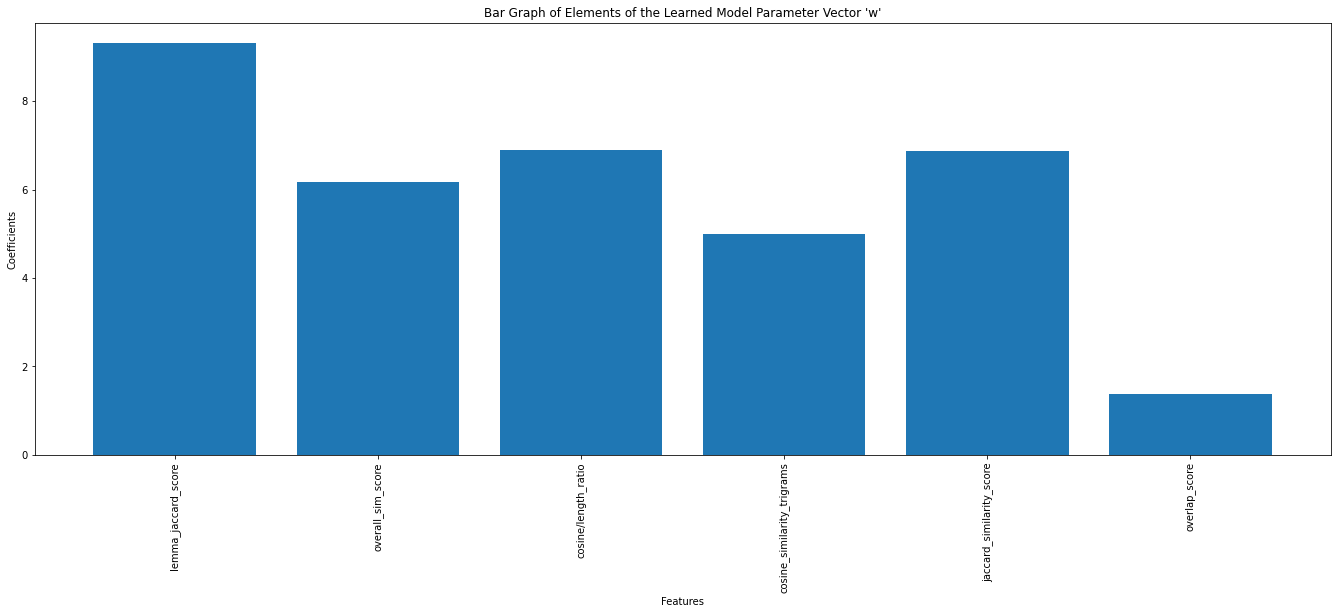

SVM:
Accuracy Score with train_df3_no_outliers_RandomOverSampler model/features 0.68646408839779
Confusion Matrix: 
[[240 122]
 [105 257]]
Area Under Curve: 0.6864640883977902
Recall Score: 0.7099447513812155
Precision Score: 0.6781002638522428


In [365]:
x_train = train_df3_no_outliers.drop(['classification'], axis=1).values
y_train = train_df3_no_outliers['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = RandomOverSampler(random_state=123)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, train_df3_no_outliers.drop(['classification'], axis=1).columns,'train_df3_no_outliers_RandomOverSampler')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'train_df3_no_outliers_RandomOverSampler')

Logistic Regression:
Accuracy Score with missing_train_df_no_outliers_RandomUnderSampler model/features 0.6850828729281768
Confusion Matrix: 
[[256 106]
 [122 240]]
Area Under Curve: 0.6850828729281768
Recall Score: 0.6629834254143646
Precision Score: 0.6936416184971098
Our learned model parameter vector 'w':  [5.69381401 4.13562274 4.98896542 4.40034181 5.07476606 1.01346876]


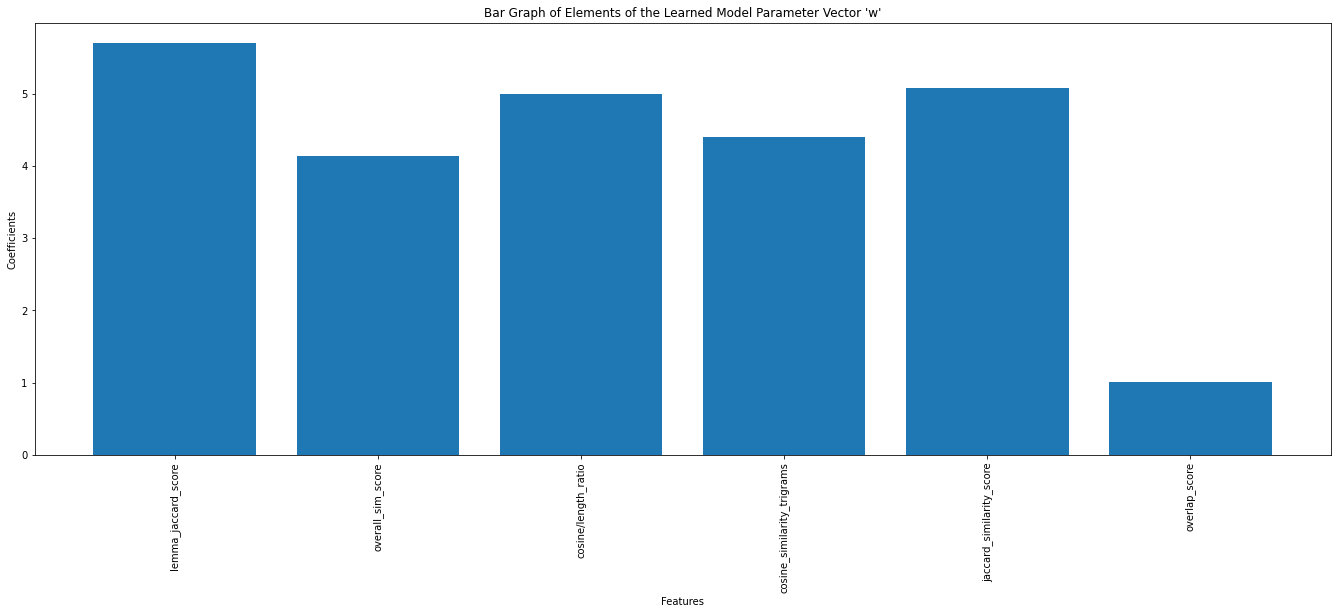

SVM:
Accuracy Score with missing_train_df_no_outliers_RandomUnderSampler model/features 0.6850828729281768
Confusion Matrix: 
[[257 105]
 [123 239]]
Area Under Curve: 0.6850828729281768
Recall Score: 0.6602209944751382
Precision Score: 0.6947674418604651


In [366]:
x_train = missing_train_df_no_outliers.drop(['classification'], axis=1).values
y_train = missing_train_df_no_outliers['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = RandomUnderSampler(random_state=123)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, missing_train_df_no_outliers.drop(['classification'], axis=1).columns,'missing_train_df_no_outliers_RandomUnderSampler')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'missing_train_df_no_outliers_RandomUnderSampler')

Logistic Regression:
Accuracy Score with missing_train_df_no_outliers_RandomOverSampler model/features 0.68646408839779
Confusion Matrix: 
[[255 107]
 [120 242]]
Area Under Curve: 0.68646408839779
Recall Score: 0.6685082872928176
Precision Score: 0.6934097421203438
Our learned model parameter vector 'w':  [7.63984161 5.76429849 6.25115453 5.62372134 6.82052217 1.29138042]


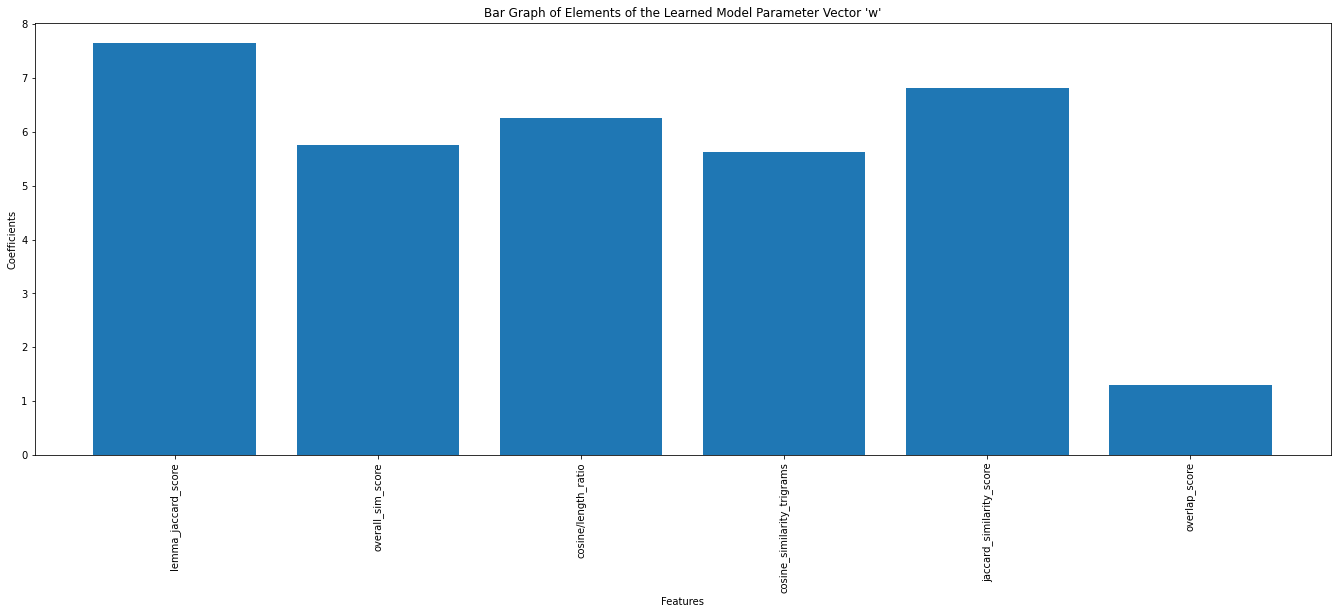

SVM:
Accuracy Score with missing_train_df_no_outliers_RandomOverSampler model/features 0.6850828729281768
Confusion Matrix: 
[[252 110]
 [118 244]]
Area Under Curve: 0.6850828729281768
Recall Score: 0.6740331491712708
Precision Score: 0.6892655367231638


In [367]:
x_train = missing_train_df_no_outliers.drop(['classification'], axis=1).values
y_train = missing_train_df_no_outliers['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = RandomOverSampler(random_state=123)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, missing_train_df_no_outliers.drop(['classification'], axis=1).columns,'missing_train_df_no_outliers_RandomOverSampler')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'missing_train_df_no_outliers_RandomOverSampler')

Logistic Regression:
Accuracy Score with missing_train_df3 model/features 0.6919889502762431
Confusion Matrix: 
[[277  85]
 [138 224]]
Area Under Curve: 0.6919889502762431
Recall Score: 0.6187845303867403
Precision Score: 0.7249190938511327
Our learned model parameter vector 'w':  [0.48509546 0.81727322 1.3455352  0.91673206 0.08714258 5.0298401
 1.08904063 0.62658161 0.32698437 0.36100152 1.22803414 0.17197943
 0.3997757  0.0918729  1.28432676 1.5600564  0.27635993 0.05313033
 0.03279299]


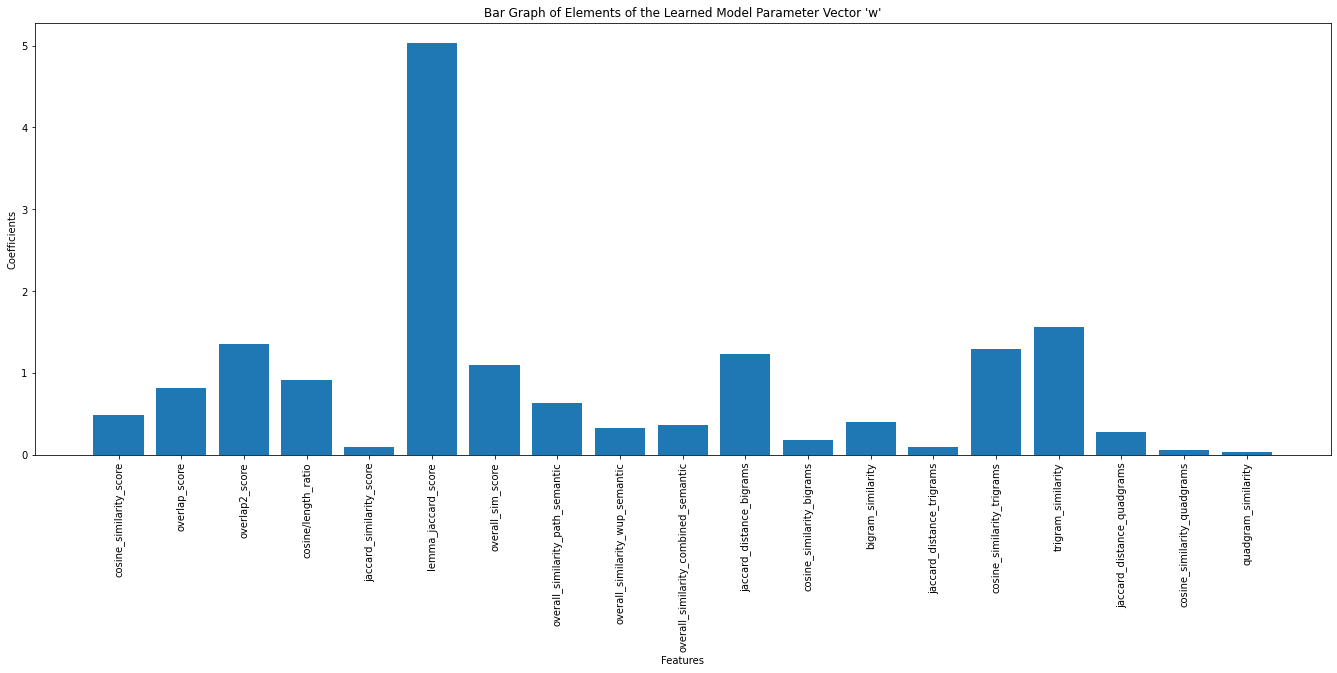

SVM:
Accuracy Score with missing_train_df3 model/features 0.6919889502762431
Confusion Matrix: 
[[284  78]
 [145 217]]
Area Under Curve: 0.6919889502762431
Recall Score: 0.5994475138121547
Precision Score: 0.735593220338983


In [412]:
#With all ngrams:
x_train = train_df_3.drop(['classification'], axis=1).values
y_train = train_df_3['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = RandomOverSampler(random_state=123)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, missing_train_df_no_outliers.drop(['classification'], axis=1).columns,'missing_train_df3')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'missing_train_df3')

Logistic Regression:
Accuracy Score with missing_train_df3 model/features 0.7030386740331491
Confusion Matrix: 
[[262 100]
 [115 247]]
Area Under Curve: 0.7030386740331491
Recall Score: 0.6823204419889503
Precision Score: 0.7118155619596542
Our learned model parameter vector 'w':  [0.43743401 1.21699647 0.8904346  1.57200419 0.39035262 5.39027391
 1.39337346 0.62652705 0.314758   0.3691918  1.18289122 0.42044025
 0.30380124 0.14942114 1.93658549 1.08742583 0.33677113 0.0921335
 0.07413362]


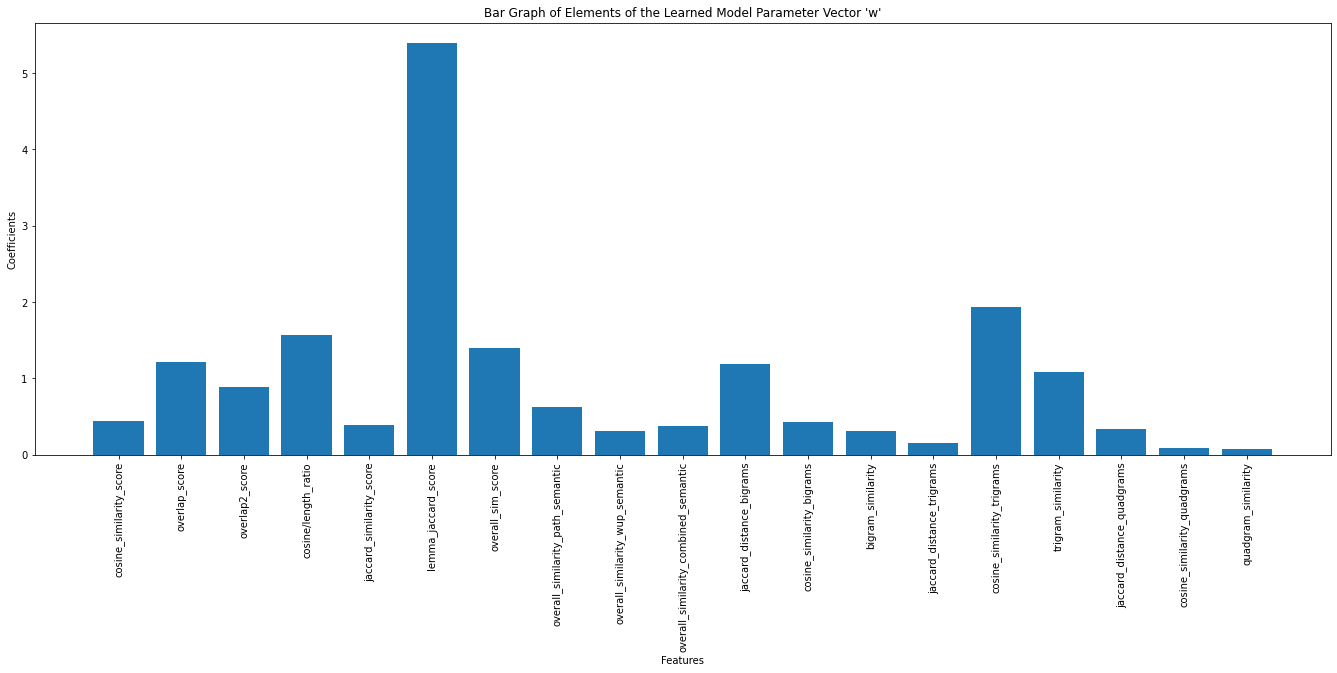

SVM:
Accuracy Score with missing_train_df3 model/features 0.6933701657458563
Confusion Matrix: 
[[268  94]
 [128 234]]
Area Under Curve: 0.6933701657458563
Recall Score: 0.6464088397790055
Precision Score: 0.7134146341463414


In [415]:
#With all ngrams no normalization:
x_train = train_df_3.drop(['classification'], axis=1).values
y_train = train_df_3['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = RandomOverSampler(random_state=123)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, missing_train_df_no_outliers.drop(['classification'], axis=1).columns,'missing_train_df3')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'missing_train_df3')

Logistic Regression:
Accuracy Score with missing_train_df3 model/features 0.6906077348066298
Confusion Matrix: 
[[273  89]
 [135 227]]
Area Under Curve: 0.6906077348066298
Recall Score: 0.6270718232044199
Precision Score: 0.7183544303797469
Our learned model parameter vector 'w':  [0.49034976 0.80415787 1.25260527 0.90806459 0.00540191 5.09866945
 1.13338372 0.60454375 0.31963104 0.36179485 2.20077261]


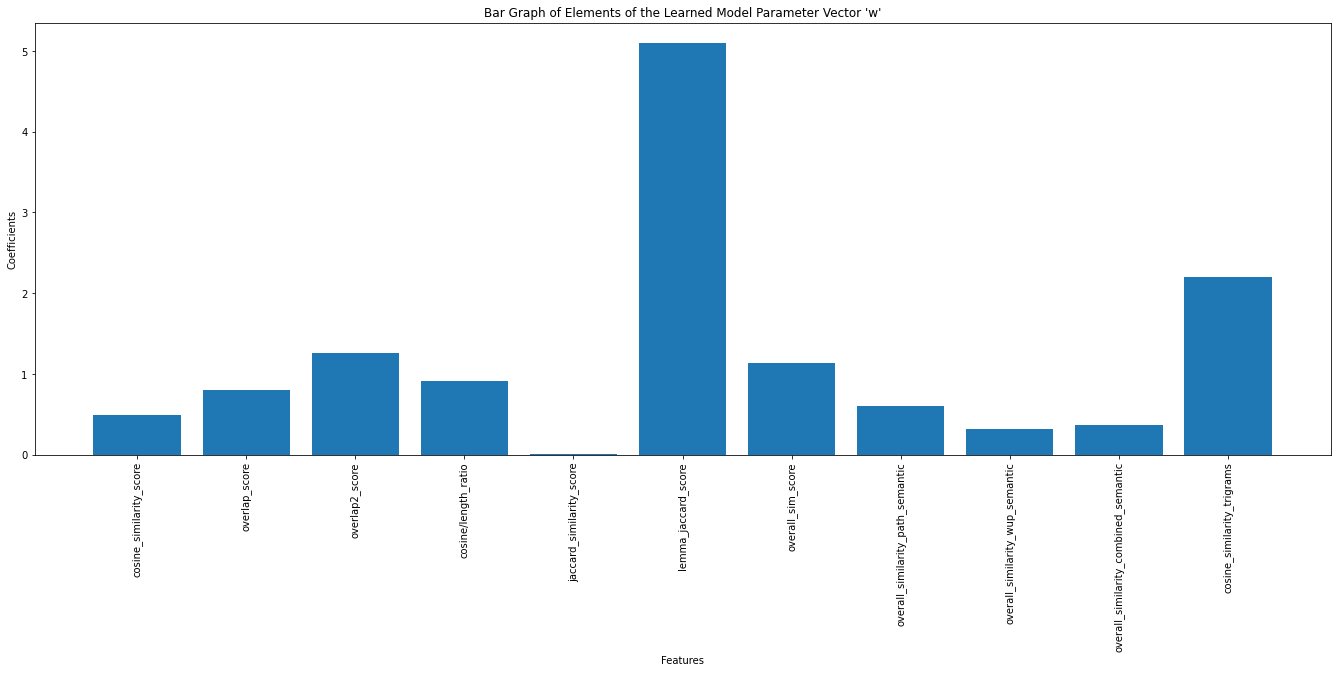

SVM:
Accuracy Score with missing_train_df3 model/features 0.6988950276243094
Confusion Matrix: 
[[287  75]
 [143 219]]
Area Under Curve: 0.6988950276243093
Recall Score: 0.6049723756906077
Precision Score: 0.7448979591836735


In [419]:
#With one ngrams normalized:
x_train = train_df_3.drop(['classification'], axis=1).values
y_train = train_df_3['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = RandomOverSampler(random_state=123)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, missing_train_df_no_outliers.drop(['classification'], axis=1).columns,'missing_train_df3')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'missing_train_df3')

Logistic Regression:
Accuracy Score with missing_train_df3 model/features 0.7044198895027625
Confusion Matrix: 
[[262 100]
 [114 248]]
Area Under Curve: 0.7044198895027625
Recall Score: 0.6850828729281768
Precision Score: 0.7126436781609196
Our learned model parameter vector 'w':  [0.46186518 1.23296328 0.85387789 1.55947271 0.44750837 5.48366197
 1.43194662 0.61333281 0.31103745 0.36991531 2.18409312]


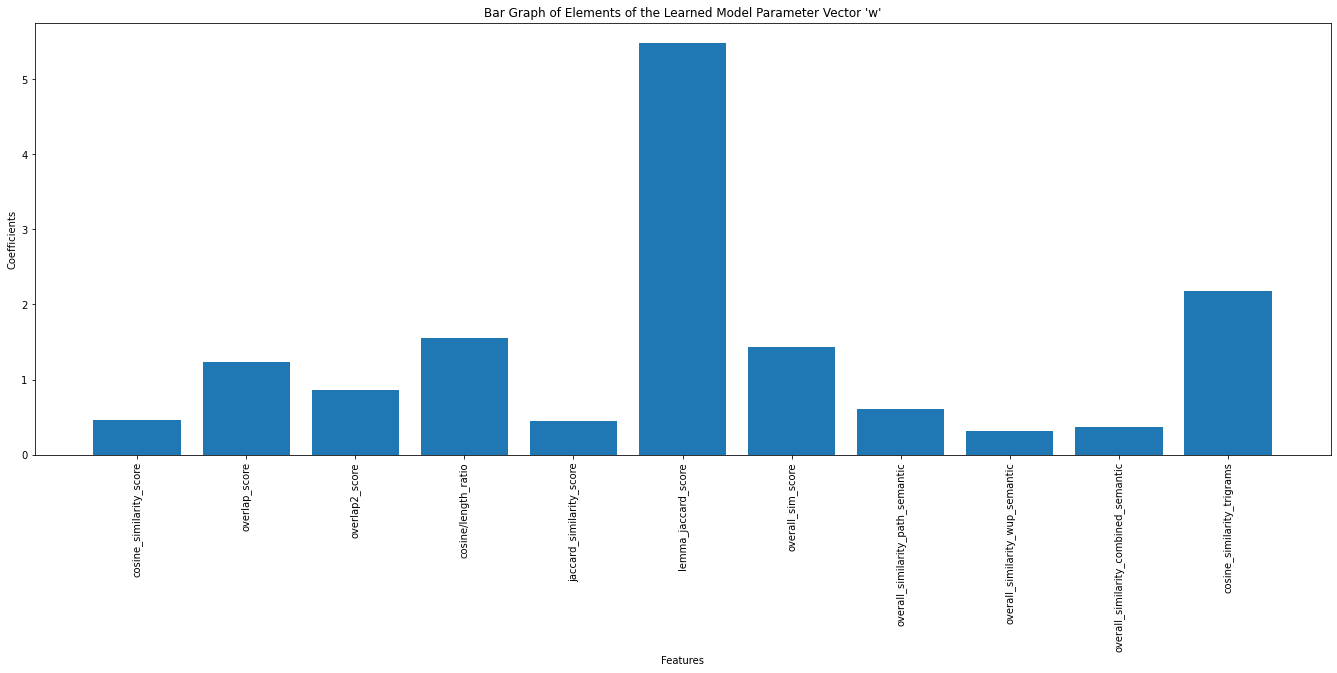

SVM:
Accuracy Score with missing_train_df3 model/features 0.6892265193370166
Confusion Matrix: 
[[264  98]
 [127 235]]
Area Under Curve: 0.6892265193370166
Recall Score: 0.649171270718232
Precision Score: 0.7057057057057057


In [422]:
#With one ngrams non-normalized:
x_train = train_df_3.drop(['classification'], axis=1).values
y_train = train_df_3['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = RandomOverSampler(random_state=123)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, missing_train_df_no_outliers.drop(['classification'], axis=1).columns,'missing_train_df3')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'missing_train_df3')

Logistic Regression:
Accuracy Score with missing_train_df3 model/features 0.68646408839779
Confusion Matrix: 
[[272  90]
 [137 225]]
Area Under Curve: 0.6864640883977899
Recall Score: 0.6215469613259669
Precision Score: 0.7142857142857143
Our learned model parameter vector 'w':  [5.31060231 1.41001405 1.11147126 2.1791463  0.32535648 0.70872476]


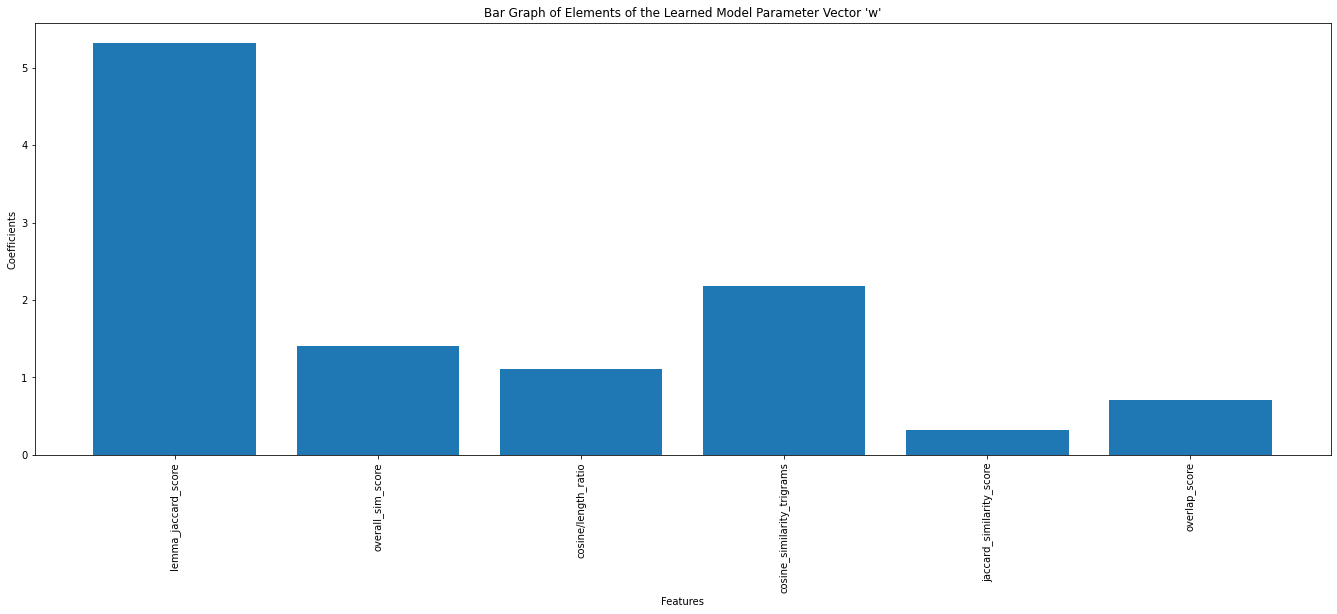

SVM:
Accuracy Score with missing_train_df3 model/features 0.7016574585635359
Confusion Matrix: 
[[287  75]
 [141 221]]
Area Under Curve: 0.701657458563536
Recall Score: 0.6104972375690608
Precision Score: 0.7466216216216216


In [425]:
#With top 6 normalized:
x_train = train_df_3.drop(['classification'], axis=1).values
y_train = train_df_3['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = RandomOverSampler(random_state=123)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, missing_train_df_no_outliers.drop(['classification'], axis=1).columns,'missing_train_df3')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'missing_train_df3')

Logistic Regression:
Accuracy Score with missing_train_df3 model/features 0.6975138121546961
Confusion Matrix: 
[[259 103]
 [116 246]]
Area Under Curve: 0.6975138121546962
Recall Score: 0.6795580110497238
Precision Score: 0.7048710601719198
Our learned model parameter vector 'w':  [5.75214476 1.56565667 1.44501896 2.16272619 0.46657937 1.33363837]


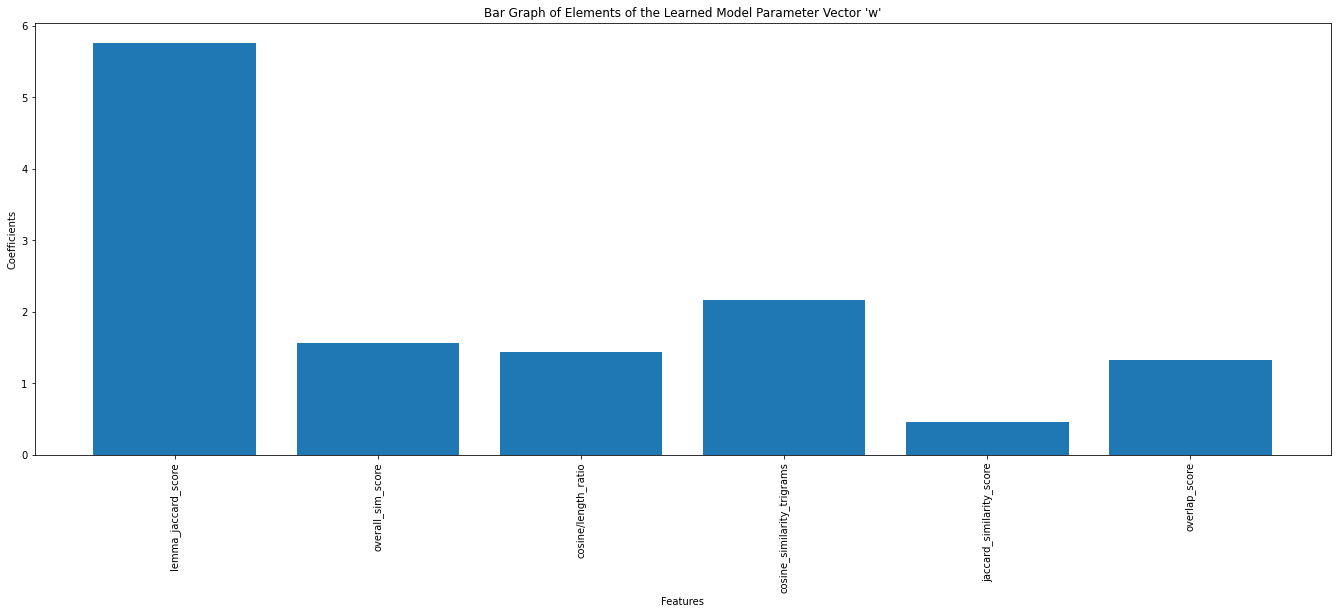

SVM:
Accuracy Score with missing_train_df3 model/features 0.6878453038674033
Confusion Matrix: 
[[265  97]
 [129 233]]
Area Under Curve: 0.6878453038674033
Recall Score: 0.643646408839779
Precision Score: 0.706060606060606


In [427]:
#With top 6 non-normalized:
x_train = train_df_3.drop(['classification'], axis=1).values
y_train = train_df_3['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = RandomOverSampler(random_state=123)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, missing_train_df_no_outliers.drop(['classification'], axis=1).columns,'missing_train_df3')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'missing_train_df3')

In [436]:
import imblearn
from imblearn.under_sampling import NearMiss

Logistic Regression:
Accuracy Score with train_df3 model/features 0.7044198895027625
Confusion Matrix: 
[[222 140]
 [ 74 288]]
Area Under Curve: 0.7044198895027625
Recall Score: 0.7955801104972375
Precision Score: 0.6728971962616822
Our learned model parameter vector 'w':  [0.68916529 0.2079422  0.6847582  0.77238118 0.06286744 3.21246904
 0.75181606 0.64307759 0.69536797 0.03262826 1.0844736 ]


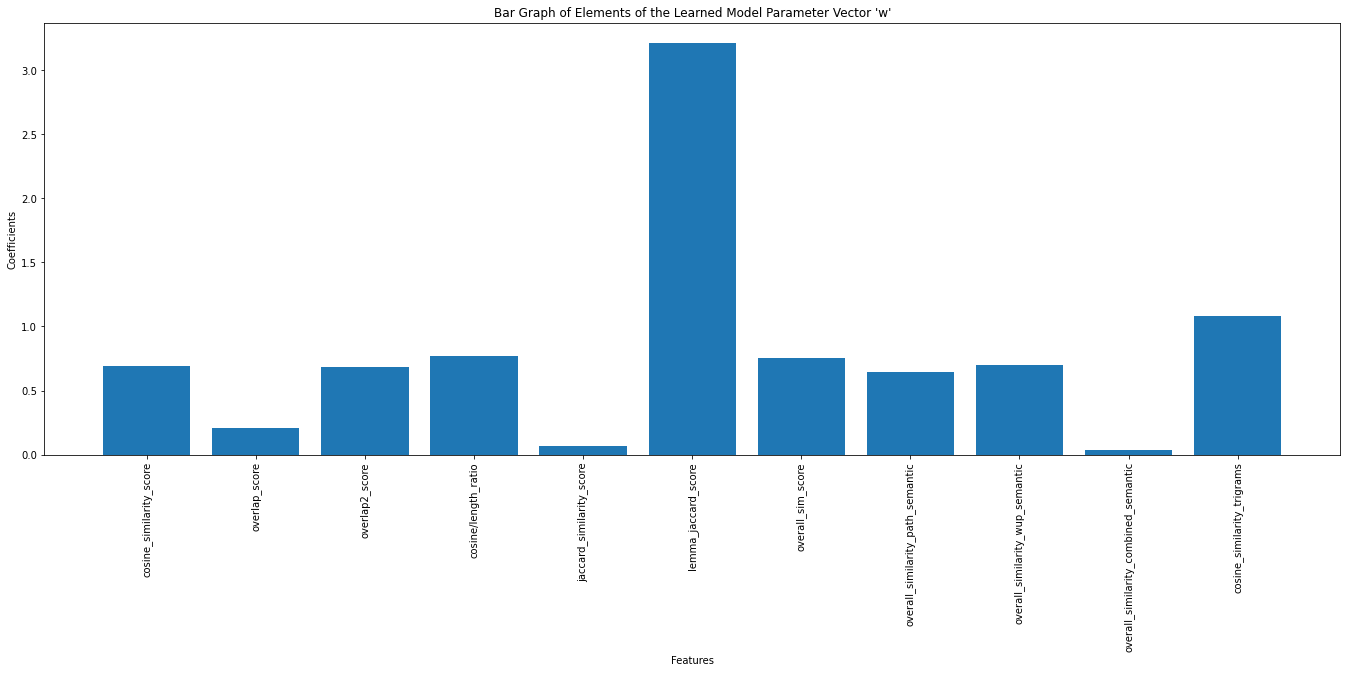

SVM:
Accuracy Score with train_df3 model/features 0.6767955801104972
Confusion Matrix: 
[[192 170]
 [ 64 298]]
Area Under Curve: 0.6767955801104972
Recall Score: 0.8232044198895028
Precision Score: 0.6367521367521367


In [442]:
#With one ngrams non-normalized:
x_train = train_df_3.drop(['classification'], axis=1).values
y_train = train_df_3['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = NearMiss(version=3,n_neighbors_ver3=3) 
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, missing_train_df_no_outliers.drop(['classification'], axis=1).columns,'train_df3')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'train_df3')

Logistic Regression:
Accuracy Score with train_df3 model/features 0.6919889502762431
Confusion Matrix: 
[[223 139]
 [ 84 278]]
Area Under Curve: 0.6919889502762431
Recall Score: 0.7679558011049724
Precision Score: 0.6666666666666666
Our learned model parameter vector 'w':  [0.15358613 0.43125271 0.58537896 0.86801246 0.6252912  2.84762293
 1.09354988 0.55074746 0.30967534 0.30581187 1.60331921]


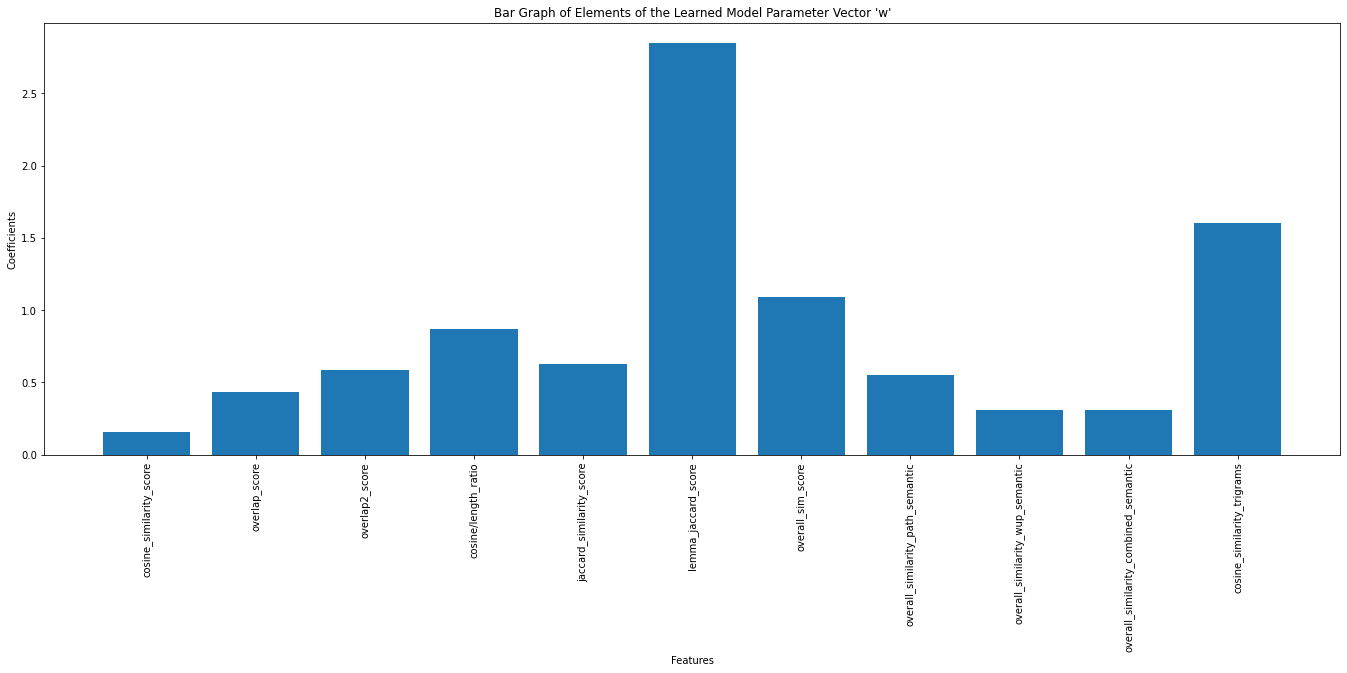

SVM:
Accuracy Score with train_df3 model/features 0.6988950276243094
Confusion Matrix: 
[[230 132]
 [ 86 276]]
Area Under Curve: 0.6988950276243094
Recall Score: 0.7624309392265194
Precision Score: 0.6764705882352942


In [443]:
from imblearn.under_sampling import CondensedNearestNeighbour
#With one ngrams non-normalized:
x_train = train_df_3.drop(['classification'], axis=1).values
y_train = train_df_3['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = CondensedNearestNeighbour(n_neighbors=1)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, missing_train_df_no_outliers.drop(['classification'], axis=1).columns,'train_df3')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'train_df3')

Logistic Regression:
Accuracy Score with train_df3 model/features 0.649171270718232
Confusion Matrix: 
[[137 225]
 [ 29 333]]
Area Under Curve: 0.649171270718232
Recall Score: 0.919889502762431
Precision Score: 0.5967741935483871
Our learned model parameter vector 'w':  [0.08231089 1.05523987 0.67978792 1.54244257 0.60023003 5.04076546
 1.45881695 0.89364702 0.58771196 0.4212065  2.08787858]


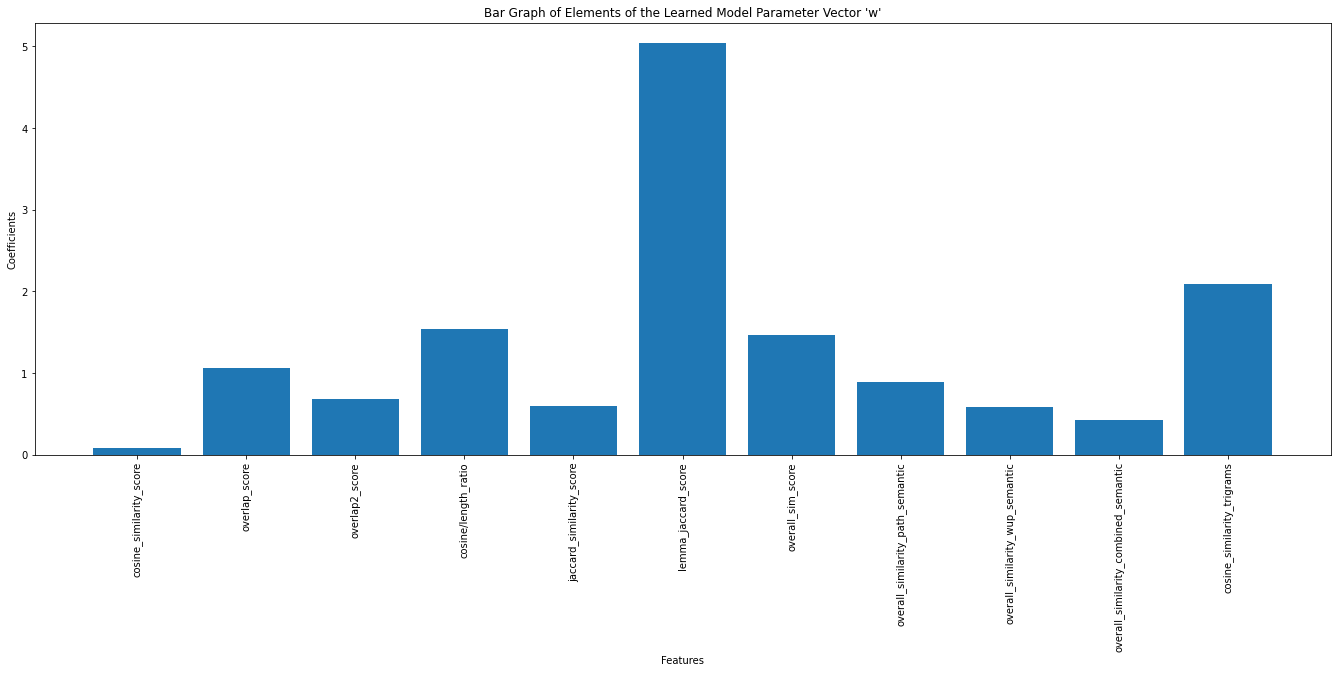

SVM:
Accuracy Score with train_df3 model/features 0.6035911602209945
Confusion Matrix: 
[[ 93 269]
 [ 18 344]]
Area Under Curve: 0.6035911602209945
Recall Score: 0.9502762430939227
Precision Score: 0.5611745513866232


In [444]:
from imblearn.under_sampling import TomekLinks
#With one ngrams non-normalized:
x_train = train_df_3.drop(['classification'], axis=1).values
y_train = train_df_3['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = TomekLinks()
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, missing_train_df_no_outliers.drop(['classification'], axis=1).columns,'train_df3')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'train_df3')

Logistic Regression:
Accuracy Score with train_df3 model/features 0.6975138121546961
Confusion Matrix: 
[[249 113]
 [106 256]]
Area Under Curve: 0.6975138121546961
Recall Score: 0.7071823204419889
Precision Score: 0.6937669376693767
Our learned model parameter vector 'w':  [0.47464428 2.17055213 0.93823805 2.46524365 1.06755355 5.67942687
 2.50268042 0.48765617 0.67032371 0.60737463 2.66369103]


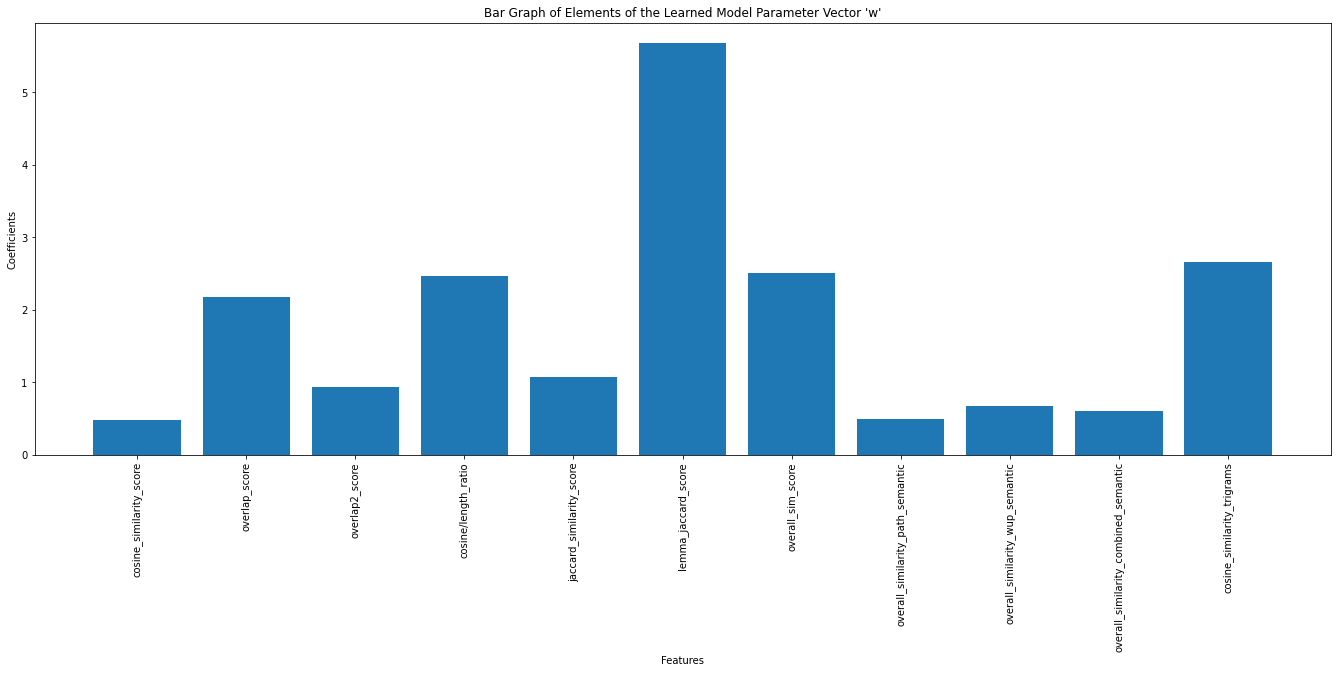

SVM:
Accuracy Score with train_df3 model/features 0.6988950276243094
Confusion Matrix: 
[[248 114]
 [104 258]]
Area Under Curve: 0.6988950276243093
Recall Score: 0.712707182320442
Precision Score: 0.6935483870967742


In [445]:
from imblearn.under_sampling import EditedNearestNeighbours
#With one ngrams non-normalized:
x_train = train_df_3.drop(['classification'], axis=1).values
y_train = train_df_3['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = EditedNearestNeighbours(n_neighbors=3)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, missing_train_df_no_outliers.drop(['classification'], axis=1).columns,'train_df3')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'train_df3')

Logistic Regression:
Accuracy Score with train_df3 model/features 0.6712707182320442
Confusion Matrix: 
[[170 192]
 [ 46 316]]
Area Under Curve: 0.6712707182320442
Recall Score: 0.8729281767955801
Precision Score: 0.6220472440944882
Our learned model parameter vector 'w':  [0.17280266 0.58696868 0.57800957 1.1481993  0.28685203 4.10894103
 0.92490689 0.84769948 0.56446972 0.42956718 1.62827477]


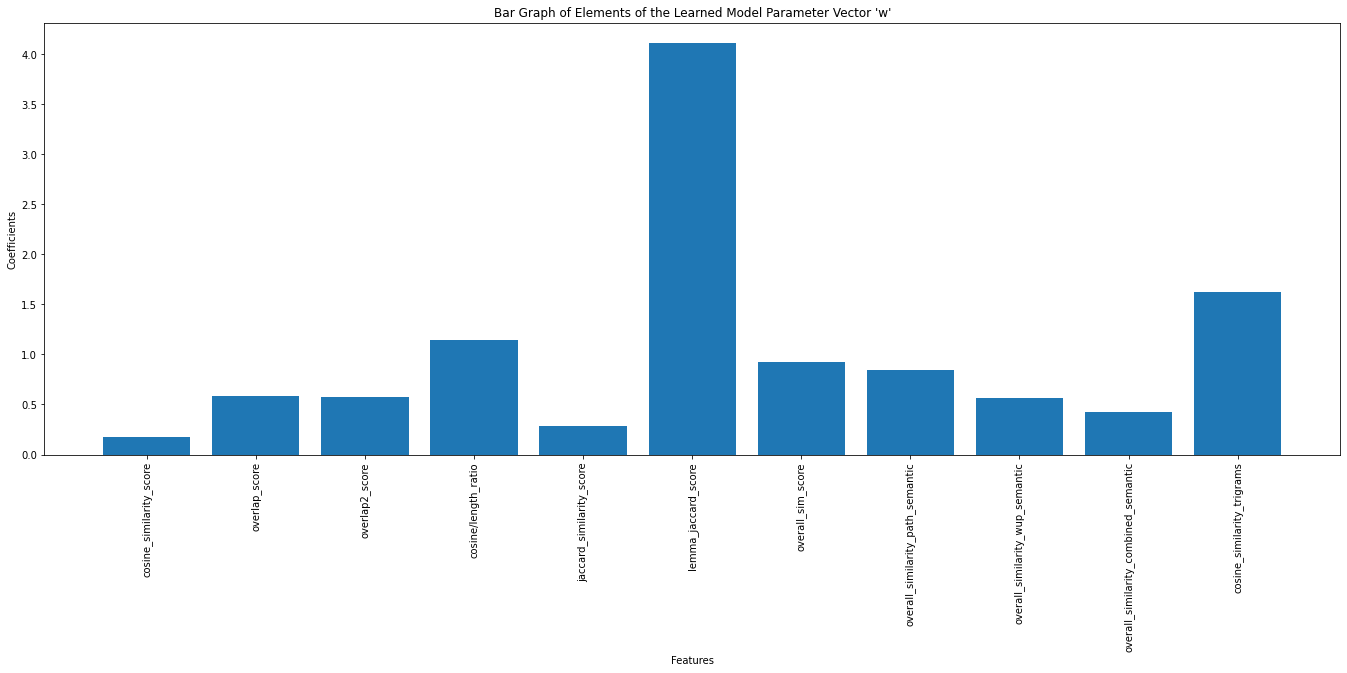

SVM:
Accuracy Score with train_df3 model/features 0.6588397790055248
Confusion Matrix: 
[[155 207]
 [ 40 322]]
Area Under Curve: 0.6588397790055248
Recall Score: 0.8895027624309392
Precision Score: 0.6086956521739131


In [460]:
from imblearn.under_sampling import OneSidedSelection
#With one ngrams non-normalized:
x_train = train_df_3.drop(['classification'], axis=1).values
y_train = train_df_3['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = OneSidedSelection(n_neighbors=1, n_seeds_S=700)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, missing_train_df_no_outliers.drop(['classification'], axis=1).columns,'train_df3')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'train_df3')

Logistic Regression:
Accuracy Score with train_df3 model/features 0.6961325966850829
Confusion Matrix: 
[[211 151]
 [ 69 293]]
Area Under Curve: 0.696132596685083
Recall Score: 0.8093922651933702
Precision Score: 0.6599099099099099
Our learned model parameter vector 'w':  [0.60519429 1.48049052 0.91786423 2.32928884 0.79240061 6.06356371
 2.04605309 0.88861278 0.14893263 0.60031762 2.97134873]


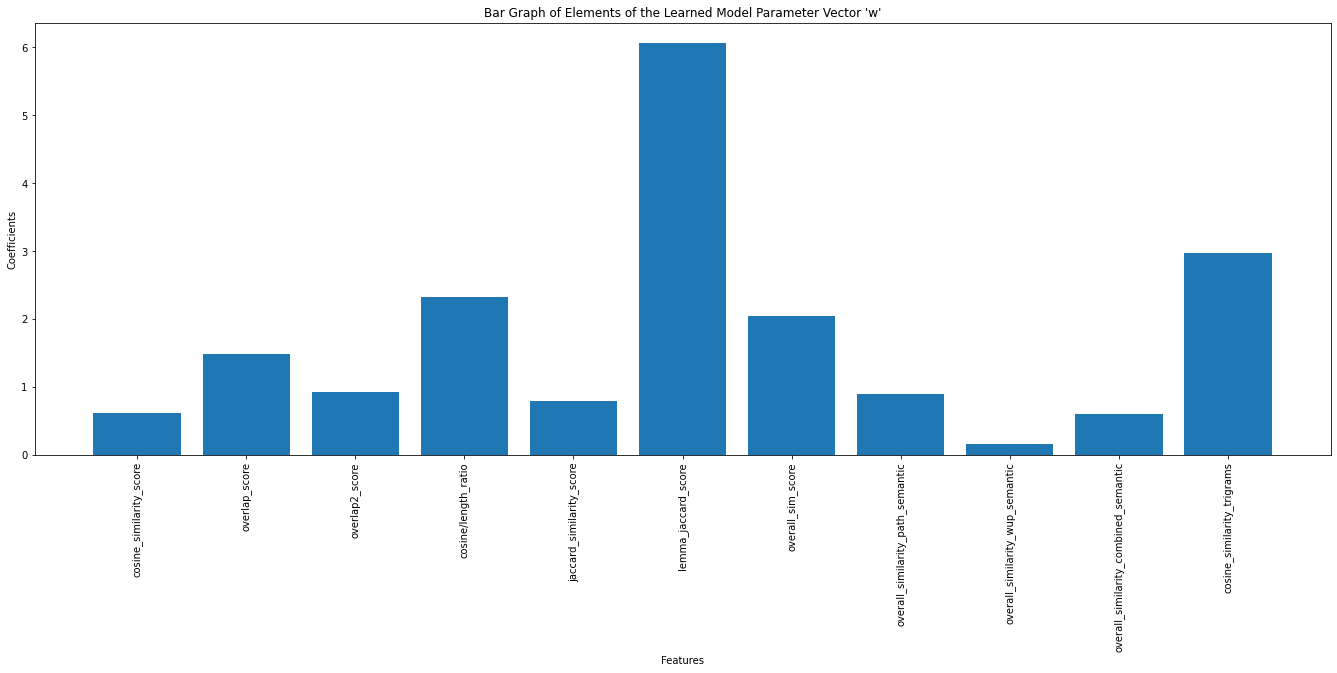

SVM:
Accuracy Score with train_df3 model/features 0.6906077348066298
Confusion Matrix: 
[[201 161]
 [ 63 299]]
Area Under Curve: 0.6906077348066298
Recall Score: 0.8259668508287292
Precision Score: 0.65


In [482]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
#With one ngrams non-normalized:
x_train = train_df_3.drop(['classification'], axis=1).values
y_train = train_df_3['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values

rus = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
rus.fit(x_train, y_train)
X_resampled, y_resampled = rus.fit_resample(x_train, y_train)

print('Logistic Regression:')
model_simple = simple_logistic_classify(X_resampled, y_resampled, x_train_val, y_train_val, missing_train_df_no_outliers.drop(['classification'], axis=1).columns,'train_df3')
print('SVM:')
model_simple2 = simple_svm_classify(X_resampled, y_resampled, x_train_val, y_train_val, 'train_df3')

Counter({1: 3038, 0: 1039})
Counter({1: 3038, 0: 1215})
Counter({1: 1350, 0: 1215})
Logistic Regression:
Accuracy Score with train_df3 model/features 0.7016574585635359
Confusion Matrix: 
[[250 112]
 [104 258]]
Area Under Curve: 0.7016574585635359
Recall Score: 0.712707182320442
Precision Score: 0.6972972972972973
Our learned model parameter vector 'w':  [0.04317673 1.2054068  0.65997991 1.46177091 0.61060294 4.77948866
 1.51236772 0.34506435 0.11060992 0.32710706 2.10540353]


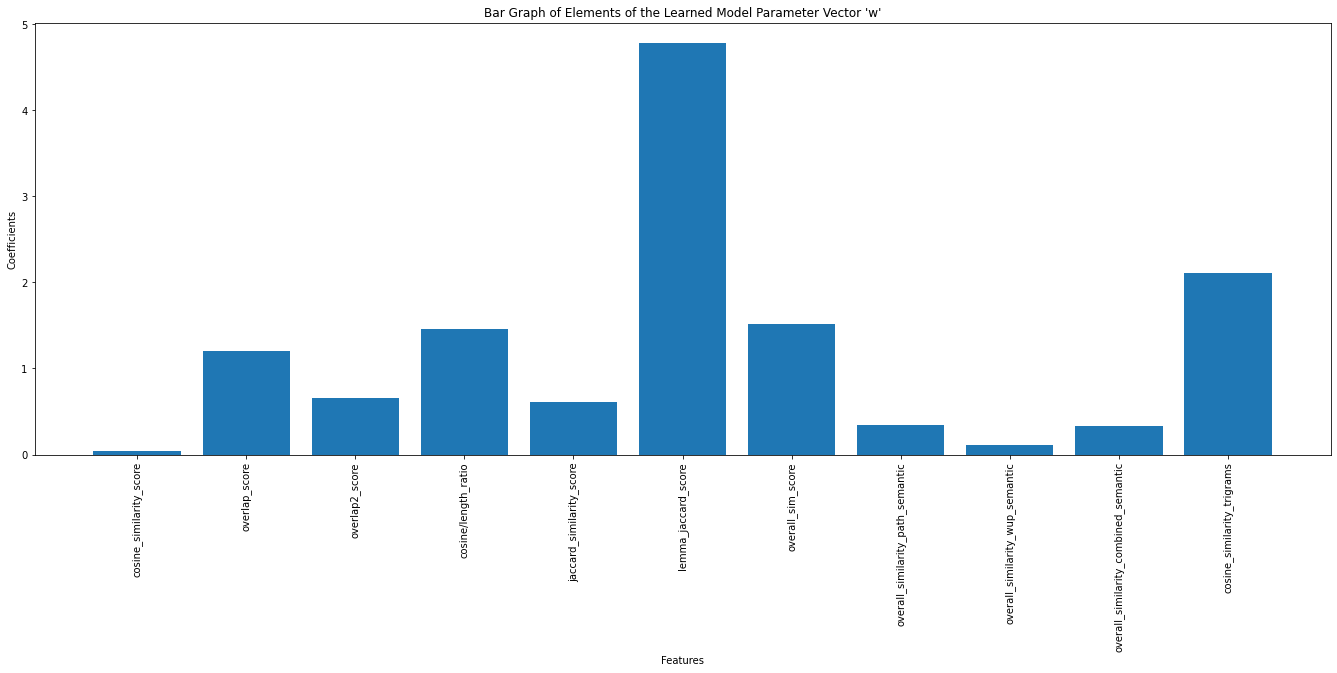

SVM:
Accuracy Score with train_df3 model/features 0.7030386740331491
Confusion Matrix: 
[[257 105]
 [110 252]]
Area Under Curve: 0.7030386740331492
Recall Score: 0.6961325966850829
Precision Score: 0.7058823529411765


In [481]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# define dataset
#With one ngrams non-normalized:
X = train_df_3.drop(['classification'], axis=1).values
y = train_df_3['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values# summarize class distribution

print(Counter(y))
# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.4)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.9)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

print('Logistic Regression:')
model_simple = simple_logistic_classify(X, y, x_train_val, y_train_val, missing_train_df_no_outliers.drop(['classification'], axis=1).columns,'train_df3')
print('SVM:')
model_simple2 = simple_svm_classify(X, y, x_train_val, y_train_val, 'train_df3')

Counter({1: 3038, 0: 1039})
Counter({1: 3038, 0: 1215})
Counter({1: 1350, 0: 1215})
Logistic Regression:
Accuracy Score with train_df3 model/features 0.7030386740331491
Confusion Matrix: 
[[253 109]
 [106 256]]
Area Under Curve: 0.7030386740331491
Recall Score: 0.7071823204419889
Precision Score: 0.7013698630136986
Our learned model parameter vector 'w':  [0.13607018 1.29130143 0.56157468 1.47972185 0.65545111 4.43652084
 1.76650926 0.12049842 0.51946632 0.49909848 2.32264627]


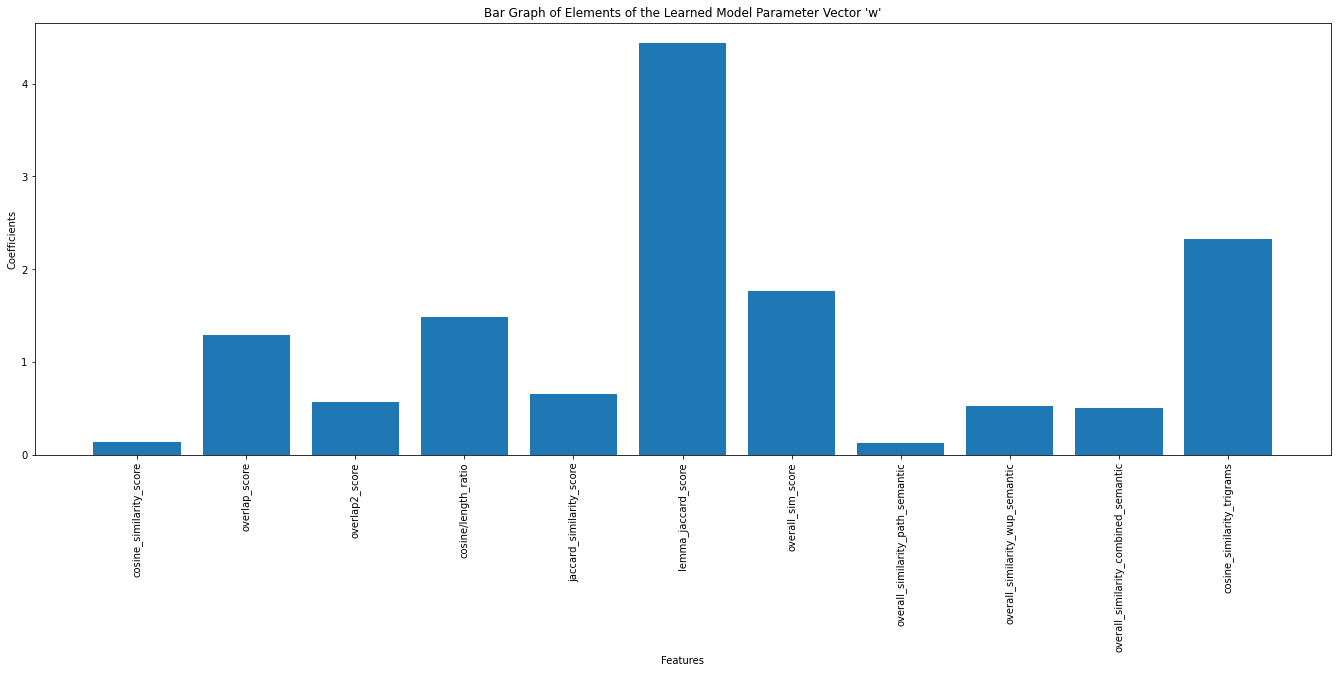

SVM:
Accuracy Score with train_df3 model/features 0.6961325966850829
Confusion Matrix: 
[[254 108]
 [112 250]]
Area Under Curve: 0.6961325966850829
Recall Score: 0.6906077348066298
Precision Score: 0.6983240223463687


In [498]:
from imblearn.over_sampling import SMOTE
# define dataset
#With one ngrams non-normalized:
X = train_df_3.drop(['classification'], axis=1).values
y = train_df_3['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values# summarize class distribution

print(Counter(y))
# define oversampling strategy
over = SMOTE(sampling_strategy=0.4)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy=0.9)
# fit and apply the transform
X, y = under.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

print('Logistic Regression:')
model_simple = simple_logistic_classify(X, y, x_train_val, y_train_val, missing_train_df_no_outliers.drop(['classification'], axis=1).columns,'train_df3')
print('SVM:')
model_simple2 = simple_svm_classify(X, y, x_train_val, y_train_val, 'train_df3')

Counter({1: 3038, 0: 1039})
Counter({1: 3038, 0: 2970})
Logistic Regression:
Accuracy Score with train_df3 model/features 0.7016574585635359
Confusion Matrix: 
[[255 107]
 [109 253]]
Area Under Curve: 0.701657458563536
Recall Score: 0.6988950276243094
Precision Score: 0.7027777777777777
Our learned model parameter vector 'w':  [0.76275958 1.42745391 0.83488399 1.57528496 0.67698013 6.11312477
 1.52265929 0.76027167 0.65358837 0.56875215 2.44777683]


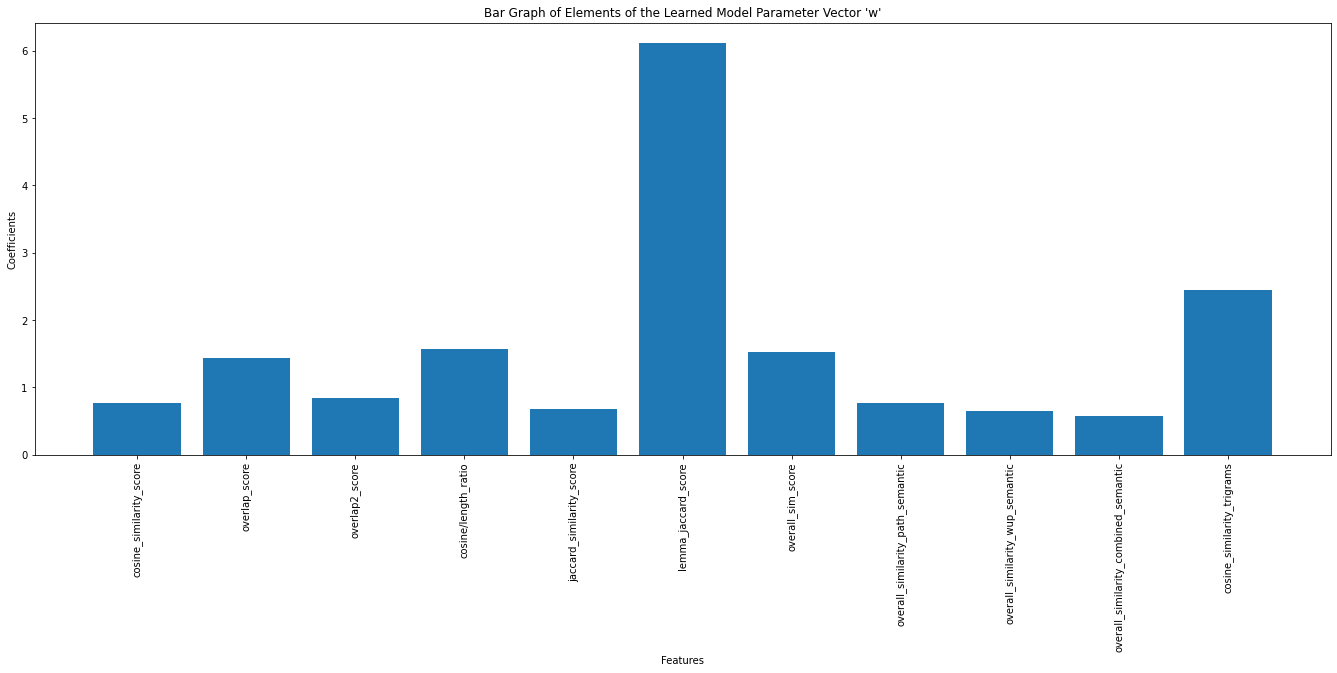

SVM:
Accuracy Score with train_df3 model/features 0.7058011049723757
Confusion Matrix: 
[[271  91]
 [122 240]]
Area Under Curve: 0.7058011049723757
Recall Score: 0.6629834254143646
Precision Score: 0.7250755287009063


In [500]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# define dataset
#With one ngrams non-normalized:
X = train_df_3.drop(['classification'], axis=1).values
y = train_df_3['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values# summarize class distribution

print(Counter(y))
# define oversampling strategy
over = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

print('Logistic Regression:')
model_simple = simple_logistic_classify(X, y, x_train_val, y_train_val, missing_train_df_no_outliers.drop(['classification'], axis=1).columns,'train_df3')
print('SVM:')
model_simple2 = simple_svm_classify(X, y, x_train_val, y_train_val, 'train_df3')

Counter({1: 3038, 0: 1039})
Counter({0: 2256, 1: 1500})
Logistic Regression:
Accuracy Score with train_df3 model/features 0.680939226519337
Confusion Matrix: 
[[305  57]
 [174 188]]
Area Under Curve: 0.680939226519337
Recall Score: 0.5193370165745856
Precision Score: 0.7673469387755102
Our learned model parameter vector 'w':  [0.24376467 3.20438282 0.82949833 2.92805636 0.34387309 7.6248724
 3.14065007 0.35989752 1.11337237 0.75413487 3.24965128]


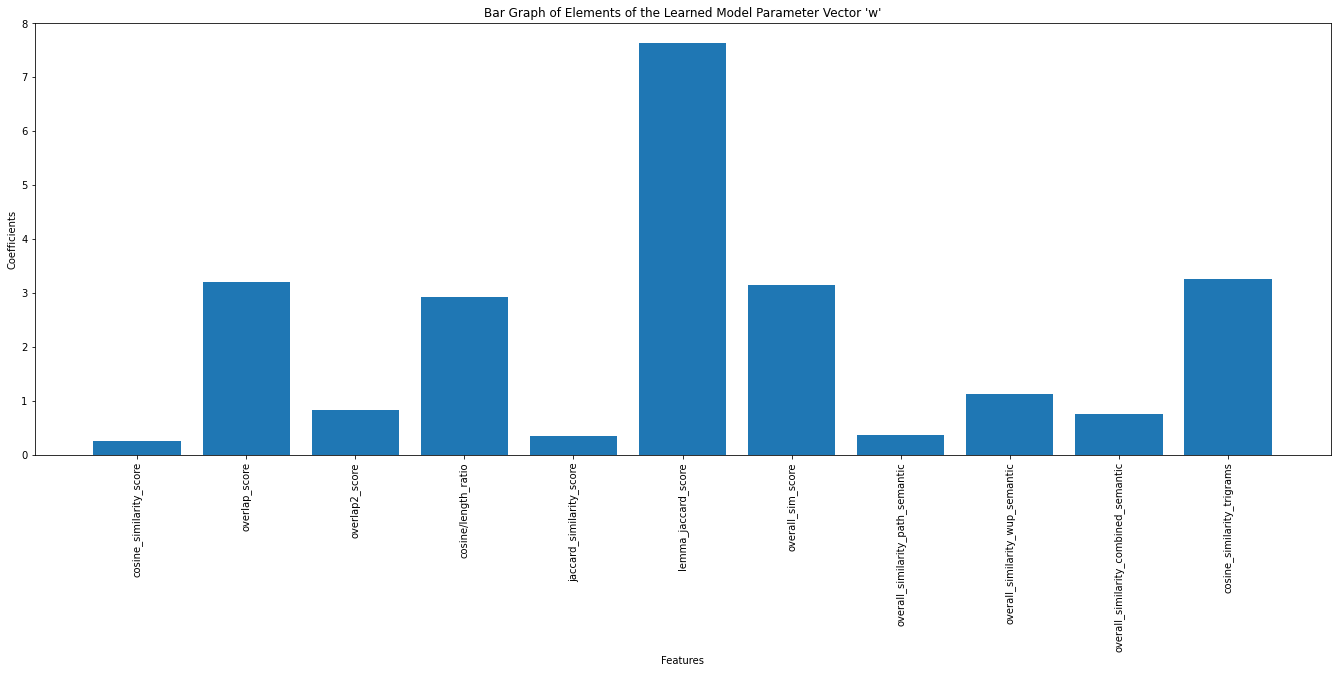

SVM:
Accuracy Score with train_df3 model/features 0.6781767955801105
Confusion Matrix: 
[[307  55]
 [178 184]]
Area Under Curve: 0.6781767955801106
Recall Score: 0.5082872928176796
Precision Score: 0.7698744769874477


In [502]:
from imblearn.combine import SMOTEENN
# define dataset
#With one ngrams non-normalized:
X = train_df_3.drop(['classification'], axis=1).values
y = train_df_3['classification'].values
x_train_val = dev_df.drop(['classification'], axis=1).values
y_train_val = dev_df['classification'].values# summarize class distribution

print(Counter(y))
# define oversampling strategy
over = SMOTEENN()
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

print('Logistic Regression:')
model_simple = simple_logistic_classify(X, y, x_train_val, y_train_val, missing_train_df_no_outliers.drop(['classification'], axis=1).columns,'train_df3')
print('SVM:')
model_simple2 = simple_svm_classify(X, y, x_train_val, y_train_val, 'train_df3')

In [550]:
dfs = [train_df,train_df_no_outliers,train_df2,train_df2_no_outliers,missing_train,missing_train_df_no_outliers,train_df_3,train_df3_no_outliers]
names = ['train_df','train_df_no_outliers','train_df2','train_df2_no_outliers','missing_train','missing_train_df_no_outliers','train_df_3','train_df3_no_outliers']
i = 0
for df in dfs:
    # define dataset
    #With one ngrams non-normalized:
    
    name = 'one_ngram_'+names[i]
    X = train_df_3.drop(['classification'], axis=1).values
    y = train_df_3['classification'].values
    x_train_val = dev_df.drop(['classification'], axis=1).values
    y_train_val = dev_df['classification'].values# summarize class distribution

    print(Counter(y))
    # define oversampling strategy
    over = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
    # fit and apply the transform
    X, y = over.fit_resample(X, y)
    # summarize class distribution
    print(Counter(y))

    print('Logistic Regression:')
    model_simple = simple_logistic_classify2(X, y, x_train_val, y_train_val, name)
    print('SVM:')
    model_simple2 = simple_svm_classify2(X, y, x_train_val, y_train_val, name)
    i = i + 1

Counter({1: 3038, 0: 1039})
Counter({1: 3038, 0: 2937})
Logistic Regression:
Accuracy Score with one_ngram_train_df model/features 0.6961325966850829
Confusion Matrix: 
[[258 104]
 [116 246]]
Area Under Curve: 0.6961325966850831
Recall Score: 0.6795580110497238
Precision Score: 0.7028571428571428
SVM:
Accuracy Score with one_ngram_train_df model/features 0.6975138121546961
Confusion Matrix: 
[[268  94]
 [125 237]]
Area Under Curve: 0.6975138121546962
Recall Score: 0.6546961325966851
Precision Score: 0.716012084592145
Counter({1: 3038, 0: 1039})
Counter({1: 3038, 0: 2940})
Logistic Regression:
Accuracy Score with one_ngram_train_df_no_outliers model/features 0.7002762430939227
Confusion Matrix: 
[[257 105]
 [112 250]]
Area Under Curve: 0.7002762430939227
Recall Score: 0.6906077348066298
Precision Score: 0.704225352112676
SVM:
Accuracy Score with one_ngram_train_df_no_outliers model/features 0.68646408839779
Confusion Matrix: 
[[266  96]
 [131 231]]
Area Under Curve: 0.68646408839779
Rec

In [551]:
dfs = [train_df,train_df_no_outliers,train_df2,train_df2_no_outliers,missing_train,missing_train_df_no_outliers,train_df_3,train_df3_no_outliers]
names = ['train_df','train_df_no_outliers','train_df2','train_df2_no_outliers','missing_train','missing_train_df_no_outliers','train_df_3','train_df3_no_outliers']
i = 0
for df in dfs:
    # define dataset
    #With one ngrams non-normalized:
    
    name = 'one_ngram_'+names[i]
    X = train_df_3.drop(['classification'], axis=1).values
    y = train_df_3['classification'].values
    x_train_val = dev_df.drop(['classification'], axis=1).values
    y_train_val = dev_df['classification'].values# summarize class distribution

    print(Counter(y))
    # define oversampling strategy
    over = SMOTE(sampling_strategy=0.4)
    # fit and apply the transform
    X, y = over.fit_resample(X, y)
    # summarize class distribution
    print(Counter(y))
    # define undersampling strategy
    under = RandomUnderSampler(sampling_strategy=0.9)
    # fit and apply the transform
    X, y = under.fit_resample(X, y)
    # summarize class distribution
    print(Counter(y))

    print('Logistic Regression:')
    model_simple = simple_logistic_classify2(X, y, x_train_val, y_train_val, name)
    print('SVM:')
    model_simple2 = simple_svm_classify2(X, y, x_train_val, y_train_val, name)
    i = i + 1

Counter({1: 3038, 0: 1039})
Counter({1: 3038, 0: 1215})
Counter({1: 1350, 0: 1215})
Logistic Regression:
Accuracy Score with one_ngram_train_df model/features 0.6947513812154696
Confusion Matrix: 
[[244 118]
 [103 259]]
Area Under Curve: 0.6947513812154696
Recall Score: 0.7154696132596685
Precision Score: 0.6870026525198939
SVM:
Accuracy Score with one_ngram_train_df model/features 0.6933701657458563
Confusion Matrix: 
[[253 109]
 [113 249]]
Area Under Curve: 0.6933701657458563
Recall Score: 0.6878453038674033
Precision Score: 0.6955307262569832
Counter({1: 3038, 0: 1039})
Counter({1: 3038, 0: 1215})
Counter({1: 1350, 0: 1215})
Logistic Regression:
Accuracy Score with one_ngram_train_df_no_outliers model/features 0.6975138121546961
Confusion Matrix: 
[[249 113]
 [106 256]]
Area Under Curve: 0.6975138121546961
Recall Score: 0.7071823204419889
Precision Score: 0.6937669376693767
SVM:
Accuracy Score with one_ngram_train_df_no_outliers model/features 0.7016574585635359
Confusion Matrix: 
[

In [552]:
dfs = [train_df,train_df_no_outliers,train_df2,train_df2_no_outliers,missing_train,missing_train_df_no_outliers,train_df_3,train_df3_no_outliers]
names = ['train_df','train_df_no_outliers','train_df2','train_df2_no_outliers','missing_train','missing_train_df_no_outliers','train_df_3','train_df3_no_outliers']
i = 0
for df in dfs:
    # define dataset
    #With one ngrams non-normalized:
    
    name = 'one_ngram_'+names[i]
    X = train_df_3.drop(['classification'], axis=1).values
    y = train_df_3['classification'].values
    x_train_val = dev_df.drop(['classification'], axis=1).values
    y_train_val = dev_df['classification'].values# summarize class distribution

    print(Counter(y))
    under = NearMiss(version=3)
    # fit and apply the transform
    X, y = under.fit_resample(X, y)
    # summarize class distribution
    print(Counter(y))

    print('Logistic Regression:')
    model_simple = simple_logistic_classify2(X, y, x_train_val, y_train_val, name)
    print('SVM:')
    model_simple2 = simple_svm_classify2(X, y, x_train_val, y_train_val, name)
    i = i + 1

Counter({1: 3038, 0: 1039})
Counter({0: 1039, 1: 1039})
Logistic Regression:
Accuracy Score with one_ngram_train_df model/features 0.6892265193370166
Confusion Matrix: 
[[230 132]
 [ 93 269]]
Area Under Curve: 0.6892265193370166
Recall Score: 0.7430939226519337
Precision Score: 0.6708229426433915
SVM:
Accuracy Score with one_ngram_train_df model/features 0.6823204419889503
Confusion Matrix: 
[[208 154]
 [ 76 286]]
Area Under Curve: 0.6823204419889501
Recall Score: 0.7900552486187845
Precision Score: 0.65
Counter({1: 3038, 0: 1039})
Counter({0: 1039, 1: 1039})
Logistic Regression:
Accuracy Score with one_ngram_train_df_no_outliers model/features 0.6892265193370166
Confusion Matrix: 
[[230 132]
 [ 93 269]]
Area Under Curve: 0.6892265193370166
Recall Score: 0.7430939226519337
Precision Score: 0.6708229426433915
SVM:
Accuracy Score with one_ngram_train_df_no_outliers model/features 0.6823204419889503
Confusion Matrix: 
[[208 154]
 [ 76 286]]
Area Under Curve: 0.6823204419889501
Recall Scor

In [553]:
dfs = [train_df,train_df_no_outliers,train_df2,train_df2_no_outliers,missing_train,missing_train_df_no_outliers,train_df_3,train_df3_no_outliers]
names = ['train_df','train_df_no_outliers','train_df2','train_df2_no_outliers','missing_train','missing_train_df_no_outliers','train_df_3','train_df3_no_outliers']
i = 0
for df in dfs:
    # define dataset
    #With one ngrams non-normalized:
    
    name = 'one_ngram_'+names[i]
    X = train_df_3.drop(['classification'], axis=1).values
    y = train_df_3['classification'].values
    x_train_val = dev_df.drop(['classification'], axis=1).values
    y_train_val = dev_df['classification'].values# summarize class distribution

    print(Counter(y))
    under = RandomUnderSampler(sampling_strategy = .9)
    # fit and apply the transform
    X, y = under.fit_resample(X, y)
    # summarize class distribution
    print(Counter(y))

    print('Logistic Regression:')
    model_simple = simple_logistic_classify2(X, y, x_train_val, y_train_val, name)
    print('SVM:')
    model_simple2 = simple_svm_classify2(X, y, x_train_val, y_train_val, name)
    i = i + 1

Counter({1: 3038, 0: 1039})
Counter({1: 1154, 0: 1039})
Logistic Regression:
Accuracy Score with one_ngram_train_df model/features 0.6947513812154696
Confusion Matrix: 
[[243 119]
 [102 260]]
Area Under Curve: 0.6947513812154696
Recall Score: 0.7182320441988951
Precision Score: 0.6860158311345647
SVM:
Accuracy Score with one_ngram_train_df model/features 0.6947513812154696
Confusion Matrix: 
[[256 106]
 [115 247]]
Area Under Curve: 0.6947513812154695
Recall Score: 0.6823204419889503
Precision Score: 0.6997167138810199
Counter({1: 3038, 0: 1039})
Counter({1: 1154, 0: 1039})
Logistic Regression:
Accuracy Score with one_ngram_train_df_no_outliers model/features 0.6988950276243094
Confusion Matrix: 
[[249 113]
 [105 257]]
Area Under Curve: 0.6988950276243094
Recall Score: 0.7099447513812155
Precision Score: 0.6945945945945946
SVM:
Accuracy Score with one_ngram_train_df_no_outliers model/features 0.6933701657458563
Confusion Matrix: 
[[257 105]
 [117 245]]
Area Under Curve: 0.69337016574585

In [556]:
w = [{0:75,1:25}, {0:76,1:24},{0:4,1:3}, {0:3,1:1.0}, {0:.75,1:.25}, {0:2,1:1}, {0:3, 1:2},
     {0:1,1:.25}, {0:10,1:1.0}, {0:1,1:1}, {0:1.0,1:0.1}, {0:.5,1:.5},{0:1.0,1:10}, {0:50, 1:50}]
Cvals = [10**(-1),.5, 1, 1.5, 2, 5, 10]
hyperparam_grid = {"class_weight": w, "C": Cvals}

In [557]:
dfs = [train_df,train_df_no_outliers,train_df2,train_df2_no_outliers,missing_train,missing_train_df_no_outliers,train_df_3,train_df3_no_outliers]
names = ['train_df','train_df_no_outliers','train_df2','train_df2_no_outliers','missing_train','missing_train_df_no_outliers','train_df_3','train_df3_no_outliers']
i = 0
for df in dfs:
    # define dataset
    #With one ngrams non-normalized:
    
    name = 'one_ngram_'+names[i]
    X = train_df_3.drop(['classification'], axis=1).values
    y = train_df_3['classification'].values
    x_train_val = dev_df.drop(['classification'], axis=1).values
    y_train_val = dev_df['classification'].values# summarize class distribution

    print(Counter(y))
    # define oversampling strategy
    over = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
    # fit and apply the transform
    X, y = over.fit_resample(X, y)
    # summarize class distribution
    print(Counter(y))
    
    lg3 = LogisticRegression(fit_intercept = True, penalty = 'l2',random_state=123)
    grid = GridSearchCV(lg3,hyperparam_grid, cv=5, n_jobs=-1, refit=True)
    grid.fit(X, y)
    print("LR " + name + " Best Score and Params: ", grid.best_score_, grid.best_params_)
    model = simple_logistic_classify2(X, y, x_train_val, y_train_val, name, _C = grid.best_params_['C'], w = grid.best_params_['class_weight'])
    i = i + 1

Counter({1.0: 3038, 0.0: 1039})
Counter({1.0: 3038, 0.0: 2956})
LR one_ngram_train_df Best Score and Params:  0.7143830209091885 {'C': 1.5, 'class_weight': {0: 1, 1: 1}}
Accuracy Score with one_ngram_train_df model/features 0.6892265193370166
Confusion Matrix: 
[[272  90]
 [135 227]]
Area Under Curve: 0.6892265193370166
Recall Score: 0.6270718232044199
Precision Score: 0.7160883280757098
Counter({1.0: 3038, 0.0: 1039})
Counter({1.0: 3038, 0.0: 2941})
LR one_ngram_train_df_no_outliers Best Score and Params:  0.7200201508515134 {'C': 1.5, 'class_weight': {0: 1, 1: 1}}
Accuracy Score with one_ngram_train_df_no_outliers model/features 0.6878453038674033
Confusion Matrix: 
[[271  91]
 [135 227]]
Area Under Curve: 0.6878453038674033
Recall Score: 0.6270718232044199
Precision Score: 0.7138364779874213
Counter({1.0: 3038, 0.0: 1039})
Counter({1.0: 3038, 0.0: 2953})
LR one_ngram_train_df2 Best Score and Params:  0.7195800340016235 {'C': 5, 'class_weight': {0: 0.5, 1: 0.5}}
Accuracy Score with o

In [558]:
dfs = [train_df,train_df_no_outliers,train_df2,train_df2_no_outliers,missing_train,missing_train_df_no_outliers,train_df_3,train_df3_no_outliers]
names = ['train_df','train_df_no_outliers','train_df2','train_df2_no_outliers','missing_train','missing_train_df_no_outliers','train_df_3','train_df3_no_outliers']
i = 0
for df in dfs:
    # define dataset
    #With one ngrams non-normalized:
    
    name = 'one_ngram_'+names[i]
    X = train_df_3.drop(['classification'], axis=1).values
    y = train_df_3['classification'].values
    x_train_val = dev_df.drop(['classification'], axis=1).values
    y_train_val = dev_df['classification'].values# summarize class distribution

    print(Counter(y))
    # define oversampling strategy
    over = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
    # fit and apply the transform
    X, y = over.fit_resample(X, y)
    # summarize class distribution
    print(Counter(y))
    
    svm3 = svm.SVC(kernel='rbf', random_state = 123)
    grid = GridSearchCV(svm3,hyperparam_grid, cv=5, n_jobs=-1, refit=True)
    grid.fit(X, y)
    print("SVM " + name + " Best Score and Params: ", grid.best_score_, grid.best_params_)

    model = simple_svm_classify2(X, y, x_train_val, y_train_val, name, _C = grid.best_params_['C'], w = grid.best_params_['class_weight'])
    i = i + 1

Counter({1.0: 3038, 0.0: 1039})
Counter({1.0: 3038, 0.0: 2947})
SVM one_ngram_train_df Best Score and Params:  0.7391812865497076 {'C': 10, 'class_weight': {0: 50, 1: 50}}
Accuracy Score with one_ngram_train_df model/features 0.6947513812154696
Confusion Matrix: 
[[278  84]
 [137 225]]
Area Under Curve: 0.6947513812154696
Recall Score: 0.6215469613259669
Precision Score: 0.7281553398058253
Counter({1.0: 3038, 0.0: 1039})
Counter({1.0: 3038, 0.0: 2943})
SVM one_ngram_train_df_no_outliers Best Score and Params:  0.7279726629841047 {'C': 10, 'class_weight': {0: 50, 1: 50}}
Accuracy Score with one_ngram_train_df_no_outliers model/features 0.7140883977900553
Confusion Matrix: 
[[288  74]
 [133 229]]
Area Under Curve: 0.7140883977900552
Recall Score: 0.6325966850828729
Precision Score: 0.7557755775577558
Counter({1.0: 3038, 0.0: 1039})
Counter({1.0: 3038, 0.0: 2942})


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [561]:
dfs = [train_df,train_df_no_outliers,train_df2,train_df2_no_outliers,missing_train,missing_train_df_no_outliers,train_df_3,train_df3_no_outliers]
names = ['train_df','train_df_no_outliers','train_df2','train_df2_no_outliers','missing_train','missing_train_df_no_outliers','train_df_3','train_df3_no_outliers']
i = 0
for df in dfs:
    # define dataset
    #With one ngrams non-normalized:
    
    name = 'one_ngram_'+names[i]
    X = train_df_3.drop(['classification'], axis=1).values
    y = train_df_3['classification'].values
    x_train_val = dev_df.drop(['classification'], axis=1).values
    y_train_val = dev_df['classification'].values# summarize class distribution

    print(Counter(y))
    # define oversampling strategy
    over = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
    # fit and apply the transform
    X, y = over.fit_resample(X, y)
    # summarize class distribution
    print(Counter(y))

    model = simple_svm_classify2(X, y, x_train_val, y_train_val, name, _C = 10, w = {0:50,1:50})
    i = i + 1

Counter({1.0: 3038, 0.0: 1039})
Counter({1.0: 3038, 0.0: 2957})
Accuracy Score with one_ngram_train_df model/features 0.6933701657458563
Confusion Matrix: 
[[285  77]
 [145 217]]
Area Under Curve: 0.6933701657458563
Recall Score: 0.5994475138121547
Precision Score: 0.7380952380952381
Counter({1.0: 3038, 0.0: 1039})
Counter({1.0: 3038, 0.0: 2955})
Accuracy Score with one_ngram_train_df_no_outliers model/features 0.6961325966850829
Confusion Matrix: 
[[284  78]
 [142 220]]
Area Under Curve: 0.6961325966850829
Recall Score: 0.6077348066298343
Precision Score: 0.738255033557047
Counter({1.0: 3038, 0.0: 1039})
Counter({1.0: 3038, 0.0: 2950})
Accuracy Score with one_ngram_train_df2 model/features 0.6933701657458563
Confusion Matrix: 
[[288  74]
 [148 214]]
Area Under Curve: 0.6933701657458563
Recall Score: 0.5911602209944752
Precision Score: 0.7430555555555556
Counter({1.0: 3038, 0.0: 1039})
Counter({1.0: 3038, 0.0: 2951})
Accuracy Score with one_ngram_train_df2_no_outliers model/features 0.

In [564]:
dfs = [train_df,train_df_no_outliers,train_df2,train_df2_no_outliers,missing_train,missing_train_df_no_outliers,train_df_3,train_df3_no_outliers]
names = ['train_df','train_df_no_outliers','train_df2','train_df2_no_outliers','missing_train','missing_train_df_no_outliers','train_df_3','train_df3_no_outliers']
i = 0
for df in dfs:
    # define dataset
    #With one ngrams non-normalized:
    
    name = 'one_ngram_'+names[i]
    X = train_df_3.drop(['classification'], axis=1).values
    y = train_df_3['classification'].values
    x_train_val = dev_df.drop(['classification'], axis=1).values
    y_train_val = dev_df['classification'].values# summarize class distribution

    print(Counter(y))
    # define oversampling strategy
    under = RandomUnderSampler(sampling_strategy = .9)
    # fit and apply the transform
    X, y = under.fit_resample(X, y)
    # summarize class distribution
    print(Counter(y))
    
    lg3 = LogisticRegression(fit_intercept = True, penalty = 'l2',random_state=123)
    grid = GridSearchCV(lg3,hyperparam_grid, cv=5, n_jobs=-1, refit=True)
    grid.fit(X, y)
    print("LR " + name + " Best Score and Params: ", grid.best_score_, grid.best_params_)
    model = simple_logistic_classify2(X, y, x_train_val, y_train_val, name, _C = grid.best_params_['C'], w = grid.best_params_['class_weight'])
    i = i + 1

Counter({1.0: 3038, 0.0: 1039})
Counter({1.0: 1154, 0.0: 1039})
LR one_ngram_train_df Best Score and Params:  0.7045194037923468 {'C': 1.5, 'class_weight': {0: 50, 1: 50}}
Accuracy Score with one_ngram_train_df model/features 0.68646408839779
Confusion Matrix: 
[[268  94]
 [133 229]]
Area Under Curve: 0.68646408839779
Recall Score: 0.6325966850828729
Precision Score: 0.7089783281733746
Counter({1.0: 3038, 0.0: 1039})
Counter({1.0: 1154, 0.0: 1039})
LR one_ngram_train_df_no_outliers Best Score and Params:  0.7209327966216288 {'C': 5, 'class_weight': {0: 50, 1: 50}}
Accuracy Score with one_ngram_train_df_no_outliers model/features 0.68646408839779
Confusion Matrix: 
[[271  91]
 [136 226]]
Area Under Curve: 0.6864640883977899
Recall Score: 0.6243093922651933
Precision Score: 0.7129337539432177
Counter({1.0: 3038, 0.0: 1039})
Counter({1.0: 1154, 0.0: 1039})
LR one_ngram_train_df2 Best Score and Params:  0.7136289408264943 {'C': 1, 'class_weight': {0: 50, 1: 50}}
Accuracy Score with one_ngr

In [ ]:
dfs = [train_df,train_df_no_outliers,train_df2,train_df2_no_outliers,missing_train,missing_train_df_no_outliers,train_df_3,train_df3_no_outliers]
names = ['train_df','train_df_no_outliers','train_df2','train_df2_no_outliers','missing_train','missing_train_df_no_outliers','train_df_3','train_df3_no_outliers']
i = 0
for df in dfs:
    # define dataset
    #With one ngrams non-normalized:
    
    name = 'one_ngram_'+names[i]
    X = train_df_3.drop(['classification'], axis=1).values
    y = train_df_3['classification'].values
    x_train_val = dev_df.drop(['classification'], axis=1).values
    y_train_val = dev_df['classification'].values# summarize class distribution

    print(Counter(y))
    # define oversampling strategy
    under = RandomUnderSampler(sampling_strategy = .9)
    # fit and apply the transform
    X, y = under.fit_resample(X, y)
    # summarize class distribution
    print(Counter(y))
    
    svm3 = svm.SVC(kernel='rbf', random_state = 123)
    grid = GridSearchCV(svm3,hyperparam_grid, cv=5, n_jobs=-1, refit=True)
    grid.fit(X, y)
    print("SVM " + name + " Best Score and Params: ", grid.best_score_, grid.best_params_)

    model = simple_svm_classify2(X, y, x_train_val, y_train_val, name, _C = grid.best_params_['C'], w = grid.best_params_['class_weight'])
    i = i + 1

In [565]:
dfs = [train_df,train_df_no_outliers,train_df2,train_df2_no_outliers,missing_train,missing_train_df_no_outliers,train_df_3,train_df3_no_outliers]
names = ['train_df','train_df_no_outliers','train_df2','train_df2_no_outliers','missing_train','missing_train_df_no_outliers','train_df_3','train_df3_no_outliers']
i = 0
for df in dfs:
    # define dataset
    #With one ngrams non-normalized:
    
    name = 'one_ngram_'+names[i]
    X = train_df_3.drop(['classification'], axis=1).values
    y = train_df_3['classification'].values
    x_train_val = dev_df.drop(['classification'], axis=1).values
    y_train_val = dev_df['classification'].values# summarize class distribution

    print(Counter(y))
    # define oversampling strategy
    over = SMOTE(sampling_strategy=0.4)
    # fit and apply the transform
    X, y = over.fit_resample(X, y)
    # summarize class distribution
    print(Counter(y))
    # define undersampling strategy
    under = RandomUnderSampler(sampling_strategy=0.9)
    # fit and apply the transform
    X, y = under.fit_resample(X, y)
    # summarize class distribution
    print(Counter(y))
    
    lg3 = LogisticRegression(fit_intercept = True, penalty = 'l2',random_state=123)
    grid = GridSearchCV(lg3,hyperparam_grid, cv=5, n_jobs=-1, refit=True)
    grid.fit(X, y)
    print("LR " + name + " Best Score and Params: ", grid.best_score_, grid.best_params_)
    model = simple_logistic_classify2(X, y, x_train_val, y_train_val, name, _C = grid.best_params_['C'], w = grid.best_params_['class_weight'])
    i = i + 1    

Counter({1.0: 3038, 0.0: 1039})
Counter({1.0: 3038, 0.0: 1215})
Counter({1.0: 1350, 0.0: 1215})
LR one_ngram_train_df Best Score and Params:  0.7091617933723197 {'C': 2, 'class_weight': {0: 50, 1: 50}}
Accuracy Score with one_ngram_train_df model/features 0.68646408839779
Confusion Matrix: 
[[270  92]
 [135 227]]
Area Under Curve: 0.68646408839779
Recall Score: 0.6270718232044199
Precision Score: 0.7115987460815048
Counter({1.0: 3038, 0.0: 1039})
Counter({1.0: 3038, 0.0: 1215})
Counter({1.0: 1350, 0.0: 1215})
LR one_ngram_train_df_no_outliers Best Score and Params:  0.7126705653021442 {'C': 0.5, 'class_weight': {0: 50, 1: 50}}
Accuracy Score with one_ngram_train_df_no_outliers model/features 0.6878453038674033
Confusion Matrix: 
[[268  94]
 [132 230]]
Area Under Curve: 0.6878453038674033
Recall Score: 0.6353591160220995
Precision Score: 0.7098765432098766
Counter({1.0: 3038, 0.0: 1039})
Counter({1.0: 3038, 0.0: 1215})
Counter({1.0: 1350, 0.0: 1215})
LR one_ngram_train_df2 Best Score an

## Models Using Bow and tf-idf Vectorizer:
We use GridSearch with this Right Away

In [379]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from ast import literal_eval

In [393]:
train_df = pd.read_csv('../Data/train_df.csv')
train_df_randomUnder = pd.read_csv('../Data/train_df_randomUnder.csv')
train_df_no_outliers = pd.read_csv('../Data/train_df_no_outliers.csv')
train_df2 = pd.read_csv('../Data/train_df2.csv')
train_df2_randomUnder = pd.read_csv('../Data/train_df2_randomUnder.csv')
train_df2_no_outliers = pd.read_csv('../Data/train_df2_no_outliers.csv')
missing_train = pd.read_csv('../Data/missing_train.csv')
missing_train_df_no_outliers = pd.read_csv('../Data/missing_train_df_no_outliers.csv')
missing_train_df_randomUnder = pd.read_csv('../Data/missing_train_df_randomUnder.csv')
dev_df = pd.read_csv('../Data/dev_df.csv')
train_df_no_outliers_randomUnder = pd.read_csv('../Data/train_df_no_outliers_randomUnder.csv')
train_df2_no_outliers_randomUnder = pd.read_csv('../Data/train_df2_no_outliers_randomUnder.csv')
missing_train_df_no_outliers_randomUnder = pd.read_csv('../Data/missing_train_df_no_outliers_randomUnder.csv')
train_df_3 = pd.read_csv('../Data/train_df_3.csv')
train_df3_randomUnder = pd.read_csv('../Data/train_df3_randomUnder.csv')
train_df3_no_outliers = pd.read_csv('../Data/train_df3_no_outliers.csv')
train_df3_no_outliers_randomUnder = pd.read_csv('../Data/train_df3_no_outliers_randomUnder.csv')

In [394]:
dfs = [train_df_randomUnder,train_df_no_outliers,train_df2,train_df2_randomUnder,train_df2_no_outliers,missing_train,missing_train_df_no_outliers,missing_train_df_randomUnder,train_df_no_outliers_randomUnder,train_df2_no_outliers_randomUnder,missing_train_df_no_outliers_randomUnder,train_df_3,train_df3_randomUnder,train_df3_no_outliers,train_df3_no_outliers_randomUnder]
for df in dfs:
    df['lemmatized_text1'] = list(map(literal_eval, df.lemmatized_text1))
    df['lemmatized_text2'] = list(map(literal_eval, df.lemmatized_text2))

In [395]:
train_df['lemmatized_text1'] = list(map(literal_eval, train_df.lemmatized_text1))
train_df['lemmatized_text2'] = list(map(literal_eval, train_df.lemmatized_text2))

In [403]:
dev_df['lemmatized_text1'] = list(map(literal_eval, dev_df.lemmatized_text1))
dev_df['lemmatized_text2'] = list(map(literal_eval, dev_df.lemmatized_text2))

In [368]:
# With whole Data (other than two removed):

In [398]:
w = [{0:75,1:25}, {0:76,1:24},{0:4,1:3}, {0:3,1:1.0}, {0:.75,1:.25}, {0:2,1:1}, {0:3, 1:2},
     {0:1,1:.25}, {0:10,1:1.0}, {0:1,1:1}, {0:1.0,1:0.1}, {0:.5,1:.5},{0:1.0,1:10}, {0:50, 1:50}]
Cvals = [10**(-1),.5, 1, 1.5, 2, 5, 10]
hyperparam_grid = {"class_weight": w, "C": Cvals}

In [399]:
def simple_logistic_classify2(X_tr, y_tr, X_test, y_test, description, w = None, _C=1.0):
    model = LogisticRegression(C=_C, class_weight = w, fit_intercept = True, penalty = 'l2', random_state = 123).fit(X_tr, y_tr)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    print('Accuracy Score with', description, 'model/features', score)
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
    print(f'Recall Score: {recall_score(y_test,y_pred)}')
    print(f'Precision Score: {precision_score(y_test,y_pred)}')
    
    file1 = open("summary.txt", "a")  # append mode
    file1.write(description+'\t LR \t'+str(score)+ '\t w='+str(w)+'\t C='+str(_C)+'\n')
    file1.close()
    
    report = classification_report(y_test, y_pred,output_dict=True)
    pd.DataFrame(report).transpose().to_csv(f'../Data/Results/LogisticRegression{description}.csv')
    return model

In [400]:
def simple_svm_classify2(X_tr, y_tr, X_test, y_test, description, w = None, _C = 1.0):
    svmClassifier = svm.SVC(kernel='rbf', class_weight = w, C = _C, random_state = 123).fit(X_tr, y_tr)
    y_pred = svmClassifier.predict(X_test)
    score = svmClassifier.score(X_test, y_test)
    print('Accuracy Score with', description, 'model/features', score)
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
    print(f'Recall Score: {recall_score(y_test,y_pred)}')
    print(f'Precision Score: {precision_score(y_test,y_pred)}')
    
    file1 = open("summary.txt", "a")  # append mode
    file1.write(description+'\t SVM \t'+str(score)+ '\t w='+str(w)+ '\t C='+str(_C)+'\n')
    file1.close()
    
    report = classification_report(y_test, y_pred,output_dict=True)
    pd.DataFrame(report).transpose().to_csv(f'../Data/Results/SupportVectorMachine{description}.csv')
    return svmClassifier

In [401]:
dfs = [train_df,train_df_randomUnder,train_df_no_outliers,train_df2,train_df2_randomUnder,train_df2_no_outliers,missing_train,missing_train_df_no_outliers,missing_train_df_randomUnder,train_df_no_outliers_randomUnder,train_df2_no_outliers_randomUnder,missing_train_df_no_outliers_randomUnder,train_df_3,train_df3_randomUnder,train_df3_no_outliers,train_df3_no_outliers_randomUnder]
names = ['train_df','train_df_randomUnder','train_df_no_outliers','train_df2','train_df2_randomUnder','train_df2_no_outliers','missing_train','missing_train_df_no_outliers','missing_train_df_randomUnder','dev_df','train_df_no_outliers_randomUnder','train_df2_no_outliers_randomUnder','missing_train_df_no_outliers_randomUnder','train_df_3','train_df3_randomUnder','train_df3_no_outliers','train_df3_no_outliers_randomUnder']

In [402]:
bowName = 'bow_' + names[0]
tfidfName = 'tfidf_' + names[0]

x_combinedCols_train = dfs[0]['lemmatized_text1'] + dfs[0]['lemmatized_text2']
x_combinedCols_val = dev_df['lemmatized_text1'] + dev_df['lemmatized_text2']

x_train = x_combinedCols_train.values
y_train = dfs[0]['classification'].values
x_train_val = x_combinedCols_val.values
y_train_val = dev_df['classification'].values

print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
print(x_train.shape)
print(x_train_val.shape)

bow_transform = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False, ngram_range=[3,3])
X_tr_bow = bow_transform.fit_transform(x_train)
X_te_bow = bow_transform.transform(x_train_val)
print("Length of Bow Transform Vocab: ", len(bow_transform.vocabulary_))

#Tf-Idf Transformation:
tfidf_transform = text.TfidfTransformer(norm=None)
X_tr_tfidf = tfidf_transform.fit_transform(X_tr_bow)
X_te_tfidf = tfidf_transform.transform(X_te_bow)

lg3 = LogisticRegression(fit_intercept = True, penalty = 'l2',random_state=123)
bow_search = GridSearchCV(lg3,hyperparam_grid, cv=5, n_jobs=-1, refit=True)
tfidf_search = GridSearchCV(lg3,hyperparam_grid, cv=5, n_jobs=-1, refit=True)
bow_search.fit(X_tr_bow, y_train)
print("LR Bow Search Best Score and Params: ", bow_search.best_score_, bow_search.best_params_)
tfidf_search.fit(X_tr_tfidf, y_train)
print("LR TFIDF Search Best Score and Params: ", tfidf_search.best_score_, tfidf_search.best_params_)

print('Logistic Regression Bow:')
model_bow = simple_logistic_classify2(X_tr_bow, y_train, X_te_bow, y_train_val, bowName, _C = bow_search.best_params_['C'], w = bow_search.best_params_['class_weight'])
print('Logistic Regression TFIDF:')
model_tfidf = simple_logistic_classify2(X_tr_tfidf, y_train, X_te_tfidf, y_train_val, tfidfName, _C = tfidf_search.best_params_['C'], w = tfidf_search.best_params_['class_weight'])

train: 4077, val: 724
(4077,)
(724,)
Length of Bow Transform Vocab:  71225
LR Bow Search Best Score and Params:  0.7606095873932396 {'C': 0.5, 'class_weight': {0: 2, 1: 1}}
LR TFIDF Search Best Score and Params:  0.7591368940214123 {'C': 0.1, 'class_weight': {0: 4, 1: 3}}
Logistic Regression Bow:
Accuracy Score with bow_train_df model/features 0.5
Confusion Matrix: 
[[  0 362]
 [  0 362]]
Area Under Curve: 0.5
Recall Score: 1.0
Precision Score: 0.5
Logistic Regression TFIDF:
Accuracy Score with tfidf_train_df model/features 0.5
Confusion Matrix: 
[[  0 362]
 [  0 362]]
Area Under Curve: 0.5
Recall Score: 1.0
Precision Score: 0.5


In [405]:
i = 0
for df in dfs:
    bowName = 'bow_' + names[i]
    tfidfName = 'tfidf_' + names[i]
    
    x_combinedCols_train = dfs[i]['lemmatized_text1'] + dfs[i]['lemmatized_text2']
    x_combinedCols_val = dev_df['lemmatized_text1'] + dev_df['lemmatized_text2']

    x_train = x_combinedCols_train.values
    y_train = dfs[i]['classification'].values
    x_train_val = x_combinedCols_val.values
    y_train_val = dev_df['classification'].values

    print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
    print(x_train.shape)
    print(x_train_val.shape)

    bow_transform = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False, ngram_range=[3,3])
    X_tr_bow = bow_transform.fit_transform(x_train)
    X_te_bow = bow_transform.transform(x_train_val)
    print("Length of Bow Transform Vocab: ", len(bow_transform.vocabulary_))

    #Tf-Idf Transformation:
    tfidf_transform = text.TfidfTransformer(norm=None)
    X_tr_tfidf = tfidf_transform.fit_transform(X_tr_bow)
    X_te_tfidf = tfidf_transform.transform(X_te_bow)
    model_bow = simple_logistic_classify2(X_tr_bow, y_train, X_te_bow, y_train_val, bowName)
    model_tfidf = simple_logistic_classify2(X_tr_tfidf, y_train, X_te_tfidf, y_train_val, tfidfName)
    i = i +1

train: 4077, val: 724
(4077,)
(724,)
Length of Bow Transform Vocab:  71225
Accuracy Score with bow_train_df model/features 0.5814917127071824
Confusion Matrix: 
[[ 64 298]
 [  5 357]]
Area Under Curve: 0.5814917127071823
Recall Score: 0.9861878453038674
Precision Score: 0.5450381679389313
Accuracy Score with tfidf_train_df model/features 0.5814917127071824
Confusion Matrix: 
[[ 66 296]
 [  7 355]]
Area Under Curve: 0.5814917127071824
Recall Score: 0.9806629834254144
Precision Score: 0.5453149001536098
train: 2078, val: 724
(2078,)
(724,)
Length of Bow Transform Vocab:  37330
Accuracy Score with bow_train_df_randomUnder model/features 0.5124309392265194
Confusion Matrix: 
[[320  42]
 [311  51]]
Area Under Curve: 0.5124309392265193
Recall Score: 0.1408839779005525
Precision Score: 0.5483870967741935
Accuracy Score with tfidf_train_df_randomUnder model/features 0.5165745856353591
Confusion Matrix: 
[[325  37]
 [313  49]]
Area Under Curve: 0.5165745856353591
Recall Score: 0.135359116022099

In [380]:
bowName = 'bow_' + names[0]
tfidfName = 'tfidf_' + names[0]

x_combinedCols_train = dfs[0]['lemmatized_text1'] + dfs[0]['lemmatized_text2']
x_combinedCols_val = dev_df['lemmatized_text1'] + dev_df['lemmatized_text2']

x_train = x_combinedCols_train.values
y_train = dfs[0]['classification'].values
x_train_val = x_combinedCols_val.values
y_train_val = dev_df['classification'].values

print("train: {}, val: {}".format(x_train.shape[0], x_train_val.shape[0]))
print(x_train.shape)
print(x_train_val.shape)

bow_transform = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False, ngram_range=[1,1])
X_tr_bow = bow_transform.fit_transform(x_train)
X_te_bow = bow_transform.transform(x_train_val)
print("Length of Bow Transform Vocab: ", len(bow_transform.vocabulary_))

#Tf-Idf Transformation:
tfidf_transform = text.TfidfTransformer(norm=None)
X_tr_tfidf = tfidf_transform.fit_transform(X_tr_bow)
X_te_tfidf = tfidf_transform.transform(X_te_bow)

lg3 = LogisticRegression(fit_intercept = True, penalty = 'l2',random_state=123)
bow_search = GridSearchCV(lg3,hyperparam_grid, cv=5, n_jobs=-1, refit=True)
tfidf_search = GridSearchCV(lg3,hyperparam_grid, cv=5, n_jobs=-1, refit=True)
bow_search.fit(X_tr_bow, y_train)
print("LR Bow Search Best Score and Params: ", bow_search.best_score_, bow_search.best_params_)
tfidf_search.fit(X_tr_tfidf, y_train)
print("LR TFIDF Search Best Score and Params: ", tfidf_search.best_score_, tfidf_search.best_params_)

print('Logistic Regression Bow:')
model_bow = simple_logistic_classify2(X_tr_bow, y_train, X_te_bow, y_train_val, bowName, _C = bow_search.best_params_['C'], w = bow_search.best_params_['class_weight'])
print('Logistic Regression TFIDF:')
model_tfidf = simple_logistic_classify2(X_tr_tfidf, y_train, X_te_tfidf, y_train_val, tfidfName, _C = tfidf_search.best_params_['C'], w = tfidf_search.best_params_['class_weight'])


svm3 = svm.SVC(kernel='rbf', random_state = 123)
bow_search = GridSearchCV(svm3,hyperparam_grid, cv=5, n_jobs=-1, refit=True)
tfidf_search = GridSearchCV(svm3,hyperparam_grid, cv=5, n_jobs=-1, refit=True)
bow_search.fit(X_tr_bow, y_train)
print("SVM Bow Search Best Score and Params: ", bow_search.best_score_, bow_search.best_params_)
tfidf_search.fit(X_tr_tfidf, y_train)
print("SVM TFIDF Search Best Score and Params: ", tfidf_search.best_score_, tfidf_search.best_params_)

print('SVM Bow:')
model_bow = simple_svm_classify2(X_tr_bow, y_train, X_te_bow, y_train_val, bowName, _C = bow_search.best_params_['C'], w = bow_search.best_params_['class_weight'])
print('SVM TFIDF:')
model_tfidf = simple_svm_classify2(X_tr_tfidf, y_train, X_te_tfidf, y_train_val, tfidfName, _C = tfidf_search.best_params_['C'], w = tfidf_search.best_params_['class_weight'])

train: 4077, val: 724
(4077,)
(724,)
Length of Bow Transform Vocab:  59
LR Bow Search Best Score and Params:  0.7503073499338386 {'C': 0.5, 'class_weight': {0: 0.5, 1: 0.5}}
LR TFIDF Search Best Score and Params:  0.7503076506676291 {'C': 10, 'class_weight': {0: 1, 1: 1}}
Logistic Regression Bow:
Accuracy Score with bow_train_df model/features 0.5400552486187845
Confusion Matrix: 
[[ 34 328]
 [  5 357]]
Area Under Curve: 0.5400552486187845
Recall Score: 0.9861878453038674
Precision Score: 0.5211678832116788
Logistic Regression TFIDF:
Accuracy Score with tfidf_train_df model/features 0.5428176795580111
Confusion Matrix: 
[[ 35 327]
 [  4 358]]
Area Under Curve: 0.5428176795580111
Recall Score: 0.988950276243094
Precision Score: 0.5226277372262774
SVM Bow Search Best Score and Params:  0.7564399133886683 {'C': 1, 'class_weight': {0: 3, 1: 2}}


KeyboardInterrupt: 

## Models with Adjustments:

Adjustments to Make:
- Add models for undersampler (random and NearMiss), overlampler, both
    - Need Variations of these: OG Processor, Second Processor, Missing Training Dataset, Outliers Removed

Other Things You Can Do:
- Edit overall_sim_score to include other syntactic features and delete combined function (unnecessary)
- Normalize ALL columns in the dataset
- Add small portion of dev data to training datasets